In [5]:
import import_ipynb
from dataprocess import dataprocess, port_period
import pandas_datareader.data as reader
from cvxopt import matrix, solvers
import pandas as pd
import numpy as np
from pandas.tseries.offsets import BusinessDay as Bday
import datetime as dt
import yfinance as yf
import statsmodels.api as sm
import performanceanalytics.statistics as pas
import performanceanalytics.table.table as pat
import matplotlib.pyplot as plt
import seaborn as sns
import quantstats as qs

importing Jupyter notebook from dataprocess.ipynb


In [6]:
#Impact of Target Beta
tickers = ['DBA', 'EPP', 'EWJ', 'FEZ', 'FXE', 'GLD', 'ILF', 'QQQ','SHV', 'SPY','USO', 'XBI']
start = dt.date(2007,7,2)
backtest_start = start-120*Bday()
end = dt.date(2021,10,31)
backtest_data = yf.download(tickers,start,end)['Adj Close'].resample('B').interpolate(method='linear')

betas = [-.5,0,.5,1.5]
# betas=[0]
returns = []
weights = []
pnl = []

for b in betas:
    #clean data
    value = 100
    p = pd.DataFrame(index=pd.date_range('10/26/2021','10/29/2021'),columns = tickers)
    temp = port_period(120,40,b,1).unstack().unstack()
    for i in temp.index:
        temp.loc[i]=value*temp.loc[i]/backtest_data.loc[i]
        value = (temp.loc[i]*backtest_data.loc[i+4*Bday()]).sum()
    temp = temp.resample('B').ffill()
    
    w = pd.merge(temp,p,how='outer').fillna(method = 'ffill')
    w.index = backtest_data.index
    weights.append([w])

    #calculate daily returns
    p1 = pd.DataFrame()
    p1 = w*backtest_data
    p1['return'] = p1.DBA+p1.EPP+p1.EWJ+p1.FEZ+p1.FXE+p1.GLD+p1.ILF+p1.SHV+p1.SPY+p1.USO+p1.XBI+p1.QQQ
    ret_vec = p1['return'].pct_change()[1:].values
    returns.append(ret_vec)
    
    #daily P&L
    pnl_vec = (p1['return']-p1['return'].shift(1)).fillna(0).values
    pnl.append(pnl_vec)
    
return_df = pd.DataFrame(backtest_data['SPY'].pct_change()[1:].values)
return_df.columns = ['SPY']
counter = 0
for arr in returns:
    return_df.insert(counter+1,'Beta: {}'.format(betas[counter]),arr)
    counter+=1
    
spy_pos = 100/backtest_data['SPY'][0]
pnl_df = pd.DataFrame((spy_pos*(backtest_data['SPY']-backtest_data['SPY'].shift(1))).fillna(0).values)
pnl_df.columns = ['SPY']
counter1 = 0
for i in pnl:
    pnl_df.insert(counter1+1,'P&L Betas: {}'.format(betas[counter1]),i)
    counter1+=1

[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  12 of 12 completed


<string>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


     pcost       dcost       gap    pres   dres
 0: -8.9001e-06 -6.1282e+01  6e+01  9e-16  7e-16
 1: -1.4899e-05 -6.4052e-01  6e-01  6e-16  1e-15
 2: -5.3951e-04 -3.0435e-02  3e-02  2e-15  5e-17
 3: -5.3556e-03 -1.0133e-02  5e-03  7e-16  5e-18
 4: -7.7831e-03 -8.2518e-03  5e-04  9e-16  8e-19
 5: -8.0078e-03 -8.0335e-03  3e-05  1e-15  1e-18
 6: -8.0185e-03 -8.0191e-03  6e-07  4e-16  7e-19
 7: -8.0187e-03 -8.0187e-03  6e-09  2e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.5615e-05 -6.1227e+01  6e+01  2e-16  8e-16
 1:  8.7249e-05 -6.4895e-01  6e-01  1e-15  9e-16
 2: -6.2074e-04 -3.7352e-02  4e-02  5e-16  6e-17
 3: -5.8806e-03 -1.1634e-02  6e-03  6e-16  7e-18
 4: -8.7668e-03 -9.6724e-03  9e-04  8e-16  1e-18
 5: -9.2916e-03 -9.3810e-03  9e-05  4e-16  7e-19
 6: -9.3384e-03 -9.3440e-03  6e-06  1e-15  1e-18
 7: -9.3420e-03 -9.3422e-03  2e-07  4e-16  7e-19
 8: -9.3422e-03 -9.3422e-03  4e-09  8e-16  7e-19
Optimal solution found.
     pcost       dcost 

     pcost       dcost       gap    pres   dres
 0: -1.3909e-03 -6.1980e+01  6e+01  7e-16  4e-16
 1: -1.4366e-03 -7.0574e-01  7e-01  3e-16  1e-15
 2: -4.7318e-03 -6.8502e-02  6e-02  1e-15  1e-16
 3: -1.7890e-02 -2.6901e-02  9e-03  7e-16  9e-18
 4: -2.2887e-02 -2.3916e-02  1e-03  2e-15  3e-18
 5: -2.3405e-02 -2.3492e-02  9e-05  3e-16  2e-18
 6: -2.3448e-02 -2.3450e-02  1e-06  4e-16  1e-18
 7: -2.3449e-02 -2.3449e-02  1e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.8792e-03 -6.0659e+01  6e+01  5e-16  7e-16
 1: -1.9132e-03 -6.7466e-01  7e-01  8e-16  7e-16
 2: -4.4641e-03 -5.7288e-02  5e-02  8e-16  5e-17
 3: -1.6149e-02 -2.4058e-02  8e-03  1e-15  4e-18
 4: -2.0133e-02 -2.1428e-02  1e-03  7e-16  2e-18
 5: -2.0666e-02 -2.0794e-02  1e-04  6e-16  1e-18
 6: -2.0726e-02 -2.0732e-02  6e-06  4e-16  1e-18
 7: -2.0729e-02 -2.0729e-02  1e-07  8e-16  2e-18
 8: -2.0729e-02 -2.0729e-02  1e-09  4e-16  1e-18
Optimal solution found.
     pcost       dcost 

 3: -2.5319e-02 -3.5049e-02  1e-02  2e-16  5e-18
 4: -2.9152e-02 -3.0333e-02  1e-03  2e-16  2e-18
 5: -2.9525e-02 -2.9665e-02  1e-04  2e-16  2e-18
 6: -2.9590e-02 -2.9596e-02  5e-06  8e-16  3e-18
 7: -2.9594e-02 -2.9594e-02  7e-08  4e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.7637e-03 -6.4751e+01  6e+01  1e-15  9e-16
 1: -2.8091e-03 -7.2296e-01  7e-01  1e-15  8e-16
 2: -6.1915e-03 -6.4691e-02  6e-02  6e-16  6e-17
 3: -2.0034e-02 -2.8499e-02  8e-03  8e-16  4e-18
 4: -2.2036e-02 -2.3554e-02  2e-03  3e-16  2e-18
 5: -2.2485e-02 -2.2596e-02  1e-04  4e-16  8e-19
 6: -2.2513e-02 -2.2519e-02  5e-06  1e-15  1e-18
 7: -2.2515e-02 -2.2515e-02  1e-07  6e-16  2e-18
 8: -2.2515e-02 -2.2515e-02  1e-09  4e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6718e-03 -6.5285e+01  7e+01  5e-16  5e-16
 1: -2.7143e-03 -7.2401e-01  7e-01  1e-15  9e-16
 2: -5.9202e-03 -6.2331e-02  6e-02  7e-16  7e-17
 3: -1.8910e-02 -2.7336

 1:  6.9690e-04 -6.9062e-01  7e-01  5e-16  8e-16
 2: -2.4084e-03 -6.6505e-02  6e-02  2e-16  8e-17
 3: -1.4436e-02 -2.5750e-02  1e-02  4e-16  9e-18
 4: -2.0068e-02 -2.1135e-02  1e-03  1e-15  2e-18
 5: -2.0520e-02 -2.0629e-02  1e-04  1e-15  8e-19
 6: -2.0562e-02 -2.0566e-02  5e-06  4e-16  1e-18
 7: -2.0564e-02 -2.0564e-02  8e-08  6e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.3388e-04 -6.2965e+01  6e+01  5e-16  5e-16
 1:  5.9342e-04 -7.0724e-01  7e-01  6e-16  7e-16
 2: -2.4080e-03 -6.6614e-02  6e-02  4e-16  6e-17
 3: -1.4429e-02 -2.5324e-02  1e-02  4e-16  7e-18
 4: -1.9683e-02 -2.1263e-02  2e-03  2e-15  2e-18
 5: -2.0267e-02 -2.0454e-02  2e-04  1e-15  1e-18
 6: -2.0352e-02 -2.0363e-02  1e-05  1e-15  1e-18
 7: -2.0358e-02 -2.0359e-02  6e-07  1e-15  2e-18
 8: -2.0359e-02 -2.0359e-02  3e-08  2e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.9800e-04 -6.2517e+01  6e+01  4e-16  5e-16
 1:  9.3378e-04 -7.0676

 2: -1.4397e-02 -1.4311e-01  1e-01  1e-15  1e-16
 3: -3.1703e-02 -5.1624e-02  2e-02  4e-16  1e-17
 4: -4.1340e-02 -4.3222e-02  2e-03  1e-15  6e-18
 5: -4.2335e-02 -4.2480e-02  1e-04  3e-16  2e-18
 6: -4.2418e-02 -4.2420e-02  2e-06  8e-16  3e-18
 7: -4.2420e-02 -4.2420e-02  2e-08  4e-16  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5068e-03 -6.9162e+01  7e+01  1e-15  7e-16
 1: -1.7662e-03 -9.7591e-01  1e+00  6e-16  5e-16
 2: -1.3791e-02 -1.4215e-01  1e-01  1e-15  6e-17
 3: -3.2001e-02 -4.9223e-02  2e-02  2e-15  6e-18
 4: -4.0431e-02 -4.2937e-02  3e-03  4e-16  4e-18
 5: -4.1676e-02 -4.1822e-02  1e-04  6e-16  8e-18
 6: -4.1731e-02 -4.1742e-02  1e-05  1e-15  6e-18
 7: -4.1735e-02 -4.1736e-02  8e-07  1e-15  3e-18
 8: -4.1735e-02 -4.1735e-02  9e-08  2e-16  5e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5729e-03 -6.8672e+01  7e+01  5e-16  7e-16
 1: -2.8112e-03 -9.5659e-01  1e+00  6e-16  9e-16
 2: -1.4070e-02 -1.3862

 2: -4.1301e-04 -4.1346e-02  4e-02  1e-15  4e-17
 3: -1.1450e-02 -1.7880e-02  6e-03  4e-16  3e-18
 4: -1.4043e-02 -1.4704e-02  7e-04  2e-16  2e-18
 5: -1.4334e-02 -1.4359e-02  3e-05  4e-16  1e-18
 6: -1.4343e-02 -1.4343e-02  3e-07  4e-16  2e-18
 7: -1.4343e-02 -1.4343e-02  3e-09  6e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.5630e-04 -6.8695e+01  7e+01  1e-15  7e-16
 1:  9.3791e-04 -7.3232e-01  7e-01  2e-15  1e-15
 2: -6.2700e-04 -4.8325e-02  5e-02  2e-15  7e-17
 3: -1.2500e-02 -2.1307e-02  9e-03  6e-16  7e-18
 4: -1.6478e-02 -1.7526e-02  1e-03  2e-16  2e-18
 5: -1.6767e-02 -1.6887e-02  1e-04  6e-16  2e-18
 6: -1.6819e-02 -1.6825e-02  6e-06  4e-16  2e-18
 7: -1.6820e-02 -1.6820e-02  2e-07  1e-15  2e-18
 8: -1.6820e-02 -1.6820e-02  2e-09  6e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6082e-03 -7.0532e+01  7e+01  9e-16  1e-15
 1:  1.5927e-03 -7.5053e-01  8e-01  2e-15  5e-16
 2:  2.5238e-04 -4.7649

 2:  2.6761e-04 -5.2851e-02  5e-02  2e-15  8e-17
 3: -8.4596e-03 -1.8703e-02  1e-02  2e-15  9e-18
 4: -1.1889e-02 -1.3271e-02  1e-03  8e-16  2e-18
 5: -1.2406e-02 -1.2553e-02  1e-04  4e-16  1e-18
 6: -1.2467e-02 -1.2472e-02  5e-06  1e-15  2e-18
 7: -1.2469e-02 -1.2469e-02  7e-08  3e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2054e-03 -7.2538e+01  7e+01  1e-15  6e-16
 1:  1.1925e-03 -7.6452e-01  8e-01  3e-16  1e-15
 2:  6.2922e-05 -4.3691e-02  4e-02  2e-15  7e-17
 3: -1.0526e-02 -1.7274e-02  7e-03  7e-16  4e-18
 4: -1.3180e-02 -1.4173e-02  1e-03  1e-15  1e-18
 5: -1.3668e-02 -1.3768e-02  1e-04  8e-16  1e-18
 6: -1.3715e-02 -1.3718e-02  3e-06  1e-15  1e-18
 7: -1.3716e-02 -1.3716e-02  6e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0639e-03 -7.1239e+01  7e+01  6e-16  5e-16
 1:  1.0468e-03 -7.5617e-01  8e-01  1e-15  1e-15
 2: -4.2020e-04 -4.5843e-02  5e-02  2e-15  6e-17
 3: -1.1871e-02 -1.9519

     pcost       dcost       gap    pres   dres
 0:  1.7179e-04 -6.7558e+01  7e+01  1e-15  8e-16
 1:  1.5707e-04 -7.1730e-01  7e-01  8e-16  1e-15
 2: -1.1288e-03 -4.4945e-02  4e-02  2e-15  7e-17
 3: -1.3084e-02 -2.0449e-02  7e-03  6e-16  5e-18
 4: -1.6224e-02 -1.7369e-02  1e-03  1e-15  1e-18
 5: -1.6875e-02 -1.6906e-02  3e-05  4e-16  1e-18
 6: -1.6890e-02 -1.6891e-02  3e-07  8e-16  1e-18
 7: -1.6891e-02 -1.6891e-02  3e-09  7e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.9526e-04 -6.8634e+01  7e+01  1e-15  7e-16
 1:  2.8113e-04 -7.2426e-01  7e-01  1e-15  9e-16
 2: -9.6521e-04 -4.1710e-02  4e-02  6e-16  5e-17
 3: -1.3507e-02 -1.9266e-02  6e-03  1e-15  3e-18
 4: -1.5329e-02 -1.6731e-02  1e-03  4e-16  1e-18
 5: -1.6054e-02 -1.6111e-02  6e-05  8e-16  1e-18
 6: -1.6085e-02 -1.6086e-02  2e-06  2e-15  7e-19
 7: -1.6086e-02 -1.6086e-02  2e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.8288e-04 -6.8801e

 1: -9.4998e-04 -7.1806e-01  7e-01  8e-16  6e-16
 2: -1.6536e-03 -3.6520e-02  3e-02  1e-15  3e-17
 3: -9.1108e-03 -1.4058e-02  5e-03  2e-15  2e-18
 4: -1.1659e-02 -1.2061e-02  4e-04  6e-16  1e-18
 5: -1.1865e-02 -1.1883e-02  2e-05  2e-15  2e-18
 6: -1.1873e-02 -1.1873e-02  4e-07  8e-16  1e-18
 7: -1.1873e-02 -1.1873e-02  4e-09  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0790e-03 -6.7591e+01  7e+01  4e-16  9e-16
 1: -1.0880e-03 -7.0919e-01  7e-01  1e-15  1e-15
 2: -1.8813e-03 -3.7168e-02  4e-02  1e-15  5e-17
 3: -1.0119e-02 -1.4989e-02  5e-03  3e-16  4e-18
 4: -1.2603e-02 -1.3327e-02  7e-04  4e-16  1e-18
 5: -1.2942e-02 -1.2974e-02  3e-05  4e-16  1e-18
 6: -1.2955e-02 -1.2955e-02  5e-07  8e-16  1e-18
 7: -1.2955e-02 -1.2955e-02  5e-09  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0346e-03 -6.8808e+01  7e+01  9e-16  1e-15
 1: -1.0460e-03 -7.3705e-01  7e-01  2e-15  7e-16
 2: -2.0163e-03 -4.9667

 5: -1.3365e-02 -1.3449e-02  8e-05  6e-16  1e-18
 6: -1.3386e-02 -1.3407e-02  2e-05  1e-15  9e-19
 7: -1.3395e-02 -1.3396e-02  9e-07  9e-16  1e-18
 8: -1.3396e-02 -1.3396e-02  6e-08  4e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.7092e-04 -6.4753e+01  6e+01  8e-16  7e-16
 1: -6.7919e-04 -6.8443e-01  7e-01  3e-16  7e-16
 2: -1.4059e-03 -3.9322e-02  4e-02  5e-16  4e-17
 3: -8.5602e-03 -1.4332e-02  6e-03  3e-16  4e-18
 4: -1.1776e-02 -1.2369e-02  6e-04  6e-16  8e-19
 5: -1.2032e-02 -1.2063e-02  3e-05  9e-16  1e-18
 6: -1.2047e-02 -1.2049e-02  2e-06  3e-16  1e-18
 7: -1.2047e-02 -1.2047e-02  2e-08  4e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.0079e-04 -6.4888e+01  6e+01  6e-16  5e-16
 1: -9.1001e-04 -6.8347e-01  7e-01  3e-16  7e-16
 2: -1.7343e-03 -3.7830e-02  4e-02  6e-16  4e-17
 3: -1.0687e-02 -1.7820e-02  7e-03  8e-16  4e-18
 4: -1.3346e-02 -1.4050e-02  7e-04  2e-16  1e-18
 5: -1.3674e-02 -1.3703

 0: -5.9926e-04 -7.5223e+01  8e+01  9e-16  6e-16
 1: -6.1015e-04 -7.9665e-01  8e-01  2e-15  1e-15
 2: -1.5465e-03 -4.8167e-02  5e-02  7e-16  6e-17
 3: -1.0203e-02 -1.7134e-02  7e-03  9e-16  3e-18
 4: -1.2985e-02 -1.4479e-02  1e-03  6e-16  7e-19
 5: -1.3803e-02 -1.3891e-02  9e-05  6e-16  7e-19
 6: -1.3842e-02 -1.3853e-02  1e-05  4e-16  6e-19
 7: -1.3847e-02 -1.3848e-02  8e-07  3e-16  1e-18
 8: -1.3847e-02 -1.3847e-02  9e-08  4e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5656e-04 -7.2215e+01  7e+01  2e-15  1e-15
 1: -2.6356e-04 -7.5170e-01  8e-01  5e-16  1e-15
 2: -8.9501e-04 -3.4182e-02  3e-02  9e-16  6e-17
 3: -8.3892e-03 -1.3340e-02  5e-03  6e-16  4e-18
 4: -1.0462e-02 -1.1302e-02  8e-04  4e-16  5e-19
 5: -1.0754e-02 -1.0857e-02  1e-04  7e-16  1e-18
 6: -1.0803e-02 -1.0805e-02  2e-06  4e-16  4e-19
 7: -1.0804e-02 -1.0804e-02  2e-08  9e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.2038e-04 -6.9064

 1: -1.4900e-03 -7.3716e-01  7e-01  2e-15  1e-15
 2: -2.3919e-03 -3.7439e-02  4e-02  1e-15  7e-17
 3: -9.4439e-03 -1.5642e-02  6e-03  6e-16  8e-18
 4: -1.1707e-02 -1.2640e-02  9e-04  1e-15  3e-18
 5: -1.2183e-02 -1.2224e-02  4e-05  1e-15  1e-18
 6: -1.2206e-02 -1.2208e-02  1e-06  3e-16  2e-18
 7: -1.2207e-02 -1.2207e-02  2e-08  2e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2079e-03 -7.0121e+01  7e+01  7e-16  1e-15
 1: -1.2173e-03 -7.3196e-01  7e-01  4e-16  1e-15
 2: -2.0460e-03 -3.6358e-02  3e-02  1e-16  4e-17
 3: -9.8105e-03 -1.5639e-02  6e-03  2e-15  4e-18
 4: -1.2075e-02 -1.2512e-02  4e-04  1e-15  1e-18
 5: -1.2264e-02 -1.2298e-02  3e-05  4e-16  1e-18
 6: -1.2278e-02 -1.2281e-02  3e-06  3e-16  1e-18
 7: -1.2280e-02 -1.2280e-02  1e-07  4e-16  1e-18
 8: -1.2280e-02 -1.2280e-02  2e-09  6e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.3945e-04 -6.9503e+01  7e+01  6e-16  6e-16
 1: -8.4899e-04 -7.2636

 3: -1.2934e-02 -1.8312e-02  5e-03  6e-16  3e-18
 4: -1.5467e-02 -1.6002e-02  5e-04  1e-15  2e-18
 5: -1.5654e-02 -1.5754e-02  1e-04  4e-16  1e-18
 6: -1.5682e-02 -1.5686e-02  3e-06  4e-16  1e-18
 7: -1.5684e-02 -1.5684e-02  3e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.0251e-04 -7.1996e+01  7e+01  6e-16  7e-16
 1:  3.9111e-04 -7.5404e-01  8e-01  3e-15  1e-15
 2: -6.3214e-04 -4.0037e-02  4e-02  6e-16  7e-17
 3: -1.1655e-02 -2.0148e-02  8e-03  2e-15  8e-18
 4: -1.5338e-02 -1.6219e-02  9e-04  8e-16  1e-18
 5: -1.5651e-02 -1.5740e-02  9e-05  2e-15  8e-19
 6: -1.5690e-02 -1.5696e-02  5e-06  1e-15  1e-18
 7: -1.5692e-02 -1.5692e-02  7e-08  6e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.7467e-04 -7.0088e+01  7e+01  8e-16  7e-16
 1:  8.5931e-04 -7.5545e-01  8e-01  3e-15  7e-16
 2: -4.4405e-04 -5.5275e-02  5e-02  1e-15  6e-17
 3: -1.0554e-02 -1.9307e-02  9e-03  6e-16  5e-18
 4: -1.4699e-02 -1.6137

     pcost       dcost       gap    pres   dres
 0: -2.1332e-04 -6.6221e+01  7e+01  4e-16  7e-16
 1: -2.2497e-04 -7.0172e-01  7e-01  1e-15  9e-16
 2: -1.2402e-03 -4.2231e-02  4e-02  7e-16  5e-17
 3: -9.6018e-03 -1.6941e-02  7e-03  7e-16  6e-18
 4: -1.2457e-02 -1.4166e-02  2e-03  3e-16  1e-18
 5: -1.3403e-02 -1.3508e-02  1e-04  4e-16  1e-18
 6: -1.3457e-02 -1.3461e-02  4e-06  7e-16  7e-19
 7: -1.3458e-02 -1.3458e-02  5e-08  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5463e-04 -6.6789e+01  7e+01  1e-15  6e-16
 1: -1.6485e-04 -7.0436e-01  7e-01  3e-16  8e-16
 2: -1.0613e-03 -4.0089e-02  4e-02  4e-16  4e-17
 3: -8.8778e-03 -1.5229e-02  6e-03  2e-15  4e-18
 4: -1.1726e-02 -1.2621e-02  9e-04  1e-15  9e-19
 5: -1.2177e-02 -1.2212e-02  3e-05  4e-16  6e-19
 6: -1.2192e-02 -1.2192e-02  4e-07  7e-16  9e-19
 7: -1.2192e-02 -1.2192e-02  4e-09  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7894e-04 -6.8036e

 2: -4.6380e-04 -4.1180e-02  4e-02  9e-16  6e-17
 3: -7.7685e-03 -1.4516e-02  7e-03  8e-16  5e-18
 4: -1.0605e-02 -1.1505e-02  9e-04  4e-16  9e-19
 5: -1.0999e-02 -1.1136e-02  1e-04  1e-15  6e-19
 6: -1.1040e-02 -1.1058e-02  2e-05  4e-16  9e-19
 7: -1.1049e-02 -1.1049e-02  3e-07  2e-15  6e-19
 8: -1.1049e-02 -1.1049e-02  3e-09  2e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4737e-04 -6.4753e+01  6e+01  3e-16  6e-16
 1:  1.4130e-04 -6.7740e-01  7e-01  5e-16  1e-15
 2: -4.1064e-04 -3.4330e-02  3e-02  4e-16  5e-17
 3: -7.3987e-03 -1.3592e-02  6e-03  4e-16  5e-18
 4: -9.3791e-03 -1.0132e-02  8e-04  7e-16  5e-19
 5: -9.7371e-03 -9.7946e-03  6e-05  2e-15  6e-19
 6: -9.7599e-03 -9.7641e-03  4e-06  2e-15  5e-19
 7: -9.7624e-03 -9.7626e-03  2e-07  1e-15  6e-19
 8: -9.7625e-03 -9.7626e-03  7e-09  2e-15  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5692e-04 -6.5255e+01  7e+01  3e-16  5e-16
 1:  1.4944e-04 -6.8653

 1:  2.2426e-03 -7.1441e-01  7e-01  8e-16  1e-15
 2:  4.6889e-04 -4.6354e-02  5e-02  1e-15  8e-17
 3: -1.3334e-02 -2.0671e-02  7e-03  1e-15  3e-18
 4: -1.6744e-02 -1.7597e-02  9e-04  6e-16  1e-18
 5: -1.7083e-02 -1.7147e-02  6e-05  8e-16  2e-18
 6: -1.7117e-02 -1.7118e-02  8e-07  6e-16  2e-18
 7: -1.7118e-02 -1.7118e-02  8e-09  6e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6470e-03 -6.4785e+01  6e+01  7e-16  7e-16
 1:  1.6272e-03 -6.8880e-01  7e-01  1e-15  5e-16
 2: -8.1133e-05 -4.3906e-02  4e-02  8e-16  3e-17
 3: -1.3526e-02 -2.1045e-02  8e-03  1e-15  3e-18
 4: -1.6908e-02 -1.7487e-02  6e-04  9e-16  1e-18
 5: -1.7136e-02 -1.7162e-02  3e-05  7e-16  1e-18
 6: -1.7144e-02 -1.7145e-02  1e-06  6e-16  7e-19
 7: -1.7144e-02 -1.7144e-02  2e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2663e-03 -6.8617e+01  7e+01  2e-15  1e-15
 1:  1.2408e-03 -7.4615e-01  7e-01  9e-16  1e-15
 2: -8.7864e-04 -6.0480

 1:  3.8472e-04 -6.4601e-01  6e-01  2e-15  6e-16
 2: -4.9514e-04 -3.4110e-02  3e-02  8e-16  3e-17
 3: -8.3511e-03 -1.4177e-02  6e-03  8e-16  4e-18
 4: -1.0832e-02 -1.1504e-02  7e-04  8e-16  1e-18
 5: -1.1187e-02 -1.1214e-02  3e-05  1e-15  1e-18
 6: -1.1200e-02 -1.1201e-02  2e-06  7e-16  1e-18
 7: -1.1201e-02 -1.1201e-02  2e-08  5e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.0836e-04 -6.2476e+01  6e+01  1e-15  6e-16
 1:  4.9922e-04 -6.5663e-01  7e-01  8e-16  7e-16
 2: -3.0412e-04 -3.4996e-02  3e-02  2e-15  4e-17
 3: -7.3172e-03 -1.3133e-02  6e-03  4e-16  4e-18
 4: -9.6592e-03 -1.0383e-02  7e-04  2e-16  1e-18
 5: -1.0013e-02 -1.0055e-02  4e-05  1e-15  1e-18
 6: -1.0034e-02 -1.0037e-02  3e-06  7e-16  7e-19
 7: -1.0036e-02 -1.0036e-02  1e-07  1e-15  8e-19
 8: -1.0036e-02 -1.0036e-02  1e-09  8e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.0596e-04 -6.2535e+01  6e+01  7e-16  6e-16
 1:  5.9960e-04 -6.5515

 4: -1.7457e-02 -1.9243e-02  2e-03  4e-16  1e-18
 5: -1.8405e-02 -1.8651e-02  2e-04  8e-16  2e-18
 6: -1.8514e-02 -1.8538e-02  2e-05  4e-16  1e-18
 7: -1.8527e-02 -1.8528e-02  8e-07  9e-16  9e-19
 8: -1.8528e-02 -1.8528e-02  1e-08  2e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.7466e-04 -6.2352e+01  6e+01  7e-16  5e-16
 1:  4.4706e-04 -6.9026e-01  7e-01  6e-16  7e-16
 2: -1.6590e-03 -6.0143e-02  6e-02  6e-16  6e-17
 3: -1.0325e-02 -1.9886e-02  1e-02  4e-16  5e-18
 4: -1.4360e-02 -1.5512e-02  1e-03  6e-16  1e-18
 5: -1.4908e-02 -1.5022e-02  1e-04  9e-16  2e-18
 6: -1.4974e-02 -1.4981e-02  7e-06  8e-16  2e-18
 7: -1.4977e-02 -1.4977e-02  5e-07  7e-16  2e-18
 8: -1.4977e-02 -1.4977e-02  5e-09  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.2001e-04 -6.0799e+01  6e+01  4e-16  7e-16
 1:  3.0106e-04 -6.5985e-01  7e-01  6e-16  7e-16
 2: -1.2050e-03 -4.9612e-02  5e-02  4e-16  5e-17
 3: -8.2525e-03 -1.4751

 1: -4.6273e-05 -6.4867e-01  6e-01  4e-16  8e-16
 2: -1.0760e-03 -4.3864e-02  4e-02  8e-16  6e-17
 3: -7.6866e-03 -1.5124e-02  7e-03  6e-16  7e-18
 4: -1.0583e-02 -1.2019e-02  1e-03  6e-16  1e-18
 5: -1.0904e-02 -1.1141e-02  2e-04  9e-16  9e-19
 6: -1.1002e-02 -1.1014e-02  1e-05  2e-15  9e-19
 7: -1.1006e-02 -1.1006e-02  2e-07  1e-15  1e-18
 8: -1.1006e-02 -1.1006e-02  3e-09  4e-16  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7809e-04 -6.0511e+01  6e+01  4e-16  6e-16
 1:  1.6269e-04 -6.5298e-01  7e-01  4e-16  7e-16
 2: -1.1070e-03 -4.7517e-02  5e-02  4e-16  5e-17
 3: -9.1445e-03 -1.6571e-02  7e-03  2e-15  5e-18
 4: -1.2433e-02 -1.3606e-02  1e-03  3e-16  1e-18
 5: -1.2834e-02 -1.2931e-02  1e-04  1e-15  7e-19
 6: -1.2878e-02 -1.2879e-02  1e-06  1e-15  4e-19
 7: -1.2878e-02 -1.2878e-02  1e-08  2e-15  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.5139e-04 -6.0929e+01  6e+01  7e-17  5e-16
 1:  2.3675e-04 -6.5835

     pcost       dcost       gap    pres   dres
 0:  1.1011e-03 -6.4115e+01  6e+01  6e-16  6e-16
 1:  9.3948e-04 -8.4297e-01  8e-01  1e-15  1e-15
 2: -8.1572e-03 -1.2312e-01  1e-01  1e-15  1e-16
 3: -2.5033e-02 -4.1471e-02  2e-02  4e-16  1e-17
 4: -3.4244e-02 -3.5906e-02  2e-03  6e-16  2e-18
 5: -3.4674e-02 -3.4786e-02  1e-04  8e-16  6e-18
 6: -3.4717e-02 -3.4720e-02  3e-06  6e-16  2e-18
 7: -3.4719e-02 -3.4719e-02  3e-08  8e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.3387e-04 -6.4258e+01  6e+01  3e-16  8e-16
 1:  1.7694e-04 -8.3070e-01  8e-01  2e-15  9e-16
 2: -8.8510e-03 -1.1750e-01  1e-01  8e-16  1e-16
 3: -2.6033e-02 -4.4079e-02  2e-02  2e-16  2e-17
 4: -3.5336e-02 -3.7601e-02  2e-03  6e-16  2e-18
 5: -3.6363e-02 -3.6634e-02  3e-04  3e-16  3e-18
 6: -3.6491e-02 -3.6500e-02  8e-06  6e-16  2e-18
 7: -3.6496e-02 -3.6496e-02  8e-08  7e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2591e-03 -6.3450e

     pcost       dcost       gap    pres   dres
 0:  2.3837e-03 -6.0399e+01  6e+01  2e-16  5e-16
 1:  2.3520e-03 -6.7881e-01  7e-01  1e-15  7e-16
 2: -3.0375e-06 -6.4693e-02  6e-02  8e-16  7e-17
 3: -9.4886e-03 -1.9270e-02  1e-02  2e-16  5e-18
 4: -1.4876e-02 -1.5972e-02  1e-03  9e-16  1e-18
 5: -1.5248e-02 -1.5402e-02  2e-04  2e-16  1e-18
 6: -1.5310e-02 -1.5320e-02  1e-05  7e-16  2e-18
 7: -1.5314e-02 -1.5315e-02  7e-07  8e-16  2e-18
 8: -1.5315e-02 -1.5315e-02  7e-08  4e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2984e-03 -6.2762e+01  6e+01  2e-16  7e-16
 1:  2.2779e-03 -6.8071e-01  7e-01  2e-15  7e-16
 2:  6.3560e-04 -5.0387e-02  5e-02  5e-16  5e-17
 3: -7.7815e-03 -1.8587e-02  1e-02  7e-16  9e-18
 4: -1.2631e-02 -1.4364e-02  2e-03  9e-16  2e-18
 5: -1.3138e-02 -1.3489e-02  4e-04  7e-16  1e-18
 6: -1.3317e-02 -1.3331e-02  1e-05  4e-16  1e-18
 7: -1.3326e-02 -1.3326e-02  2e-07  6e-16  1e-18
 8: -1.3326e-02 -1.3326e-02  2e-09  8e-16  1e-1

 1: -2.5037e-04 -7.8558e-01  8e-01  3e-16  9e-16
 2: -4.9613e-03 -8.2564e-02  8e-02  5e-16  9e-17
 3: -1.5282e-02 -2.6908e-02  1e-02  2e-16  1e-17
 4: -2.0280e-02 -2.1833e-02  2e-03  4e-16  3e-18
 5: -2.0997e-02 -2.1157e-02  2e-04  1e-15  4e-18
 6: -2.1065e-02 -2.1075e-02  1e-05  7e-16  1e-18
 7: -2.1069e-02 -2.1069e-02  5e-07  1e-15  1e-18
 8: -2.1069e-02 -2.1069e-02  3e-08  4e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.6285e-04 -6.4682e+01  6e+01  2e-15  9e-16
 1:  4.6413e-04 -7.8824e-01  8e-01  7e-16  8e-16
 2: -5.2773e-03 -9.3164e-02  9e-02  1e-15  9e-17
 3: -1.6336e-02 -3.0673e-02  1e-02  7e-16  9e-18
 4: -2.1306e-02 -2.3461e-02  2e-03  4e-16  3e-18
 5: -2.2427e-02 -2.2565e-02  1e-04  9e-16  4e-18
 6: -2.2491e-02 -2.2493e-02  2e-06  4e-16  2e-18
 7: -2.2492e-02 -2.2492e-02  2e-08  2e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.8615e-04 -6.5038e+01  7e+01  6e-16  7e-16
 1:  2.0640e-04 -7.6988

 1: -1.7205e-03 -7.4283e-01  7e-01  8e-16  7e-16
 2: -5.9871e-03 -7.6090e-02  7e-02  1e-15  6e-17
 3: -1.9215e-02 -3.0935e-02  1e-02  9e-16  7e-18
 4: -2.4455e-02 -2.6891e-02  2e-03  4e-16  2e-18
 5: -2.4811e-02 -2.5482e-02  7e-04  7e-16  4e-18
 6: -2.5060e-02 -2.5111e-02  5e-05  7e-16  4e-18
 7: -2.5082e-02 -2.5083e-02  5e-07  2e-15  2e-18
 8: -2.5082e-02 -2.5082e-02  5e-09  2e-15  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6026e-03 -6.4117e+01  6e+01  9e-16  6e-16
 1: -1.6643e-03 -7.3874e-01  7e-01  8e-16  9e-16
 2: -5.8149e-03 -7.3967e-02  7e-02  1e-15  8e-17
 3: -1.8170e-02 -2.9720e-02  1e-02  8e-16  1e-17
 4: -2.3179e-02 -2.5532e-02  2e-03  1e-15  2e-18
 5: -2.3962e-02 -2.4486e-02  5e-04  4e-16  2e-18
 6: -2.4202e-02 -2.4241e-02  4e-05  1e-15  2e-18
 7: -2.4222e-02 -2.4224e-02  2e-06  4e-16  2e-18
 8: -2.4223e-02 -2.4223e-02  1e-07  9e-16  1e-18
 9: -2.4223e-02 -2.4223e-02  6e-09  4e-16  3e-18
Optimal solution found.
     pcost       dcost

 1: -1.0480e-03 -7.3324e-01  7e-01  8e-16  1e-15
 2: -3.8064e-03 -6.4275e-02  6e-02  1e-15  9e-17
 3: -1.6779e-02 -2.8476e-02  1e-02  8e-16  1e-17
 4: -2.1681e-02 -2.3633e-02  2e-03  6e-16  2e-18
 5: -2.2059e-02 -2.2288e-02  2e-04  9e-16  2e-18
 6: -2.2146e-02 -2.2154e-02  8e-06  9e-16  1e-18
 7: -2.2150e-02 -2.2151e-02  3e-07  4e-16  1e-18
 8: -2.2151e-02 -2.2151e-02  4e-09  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.0826e-04 -6.6464e+01  7e+01  5e-16  7e-16
 1: -9.3245e-04 -7.2780e-01  7e-01  9e-16  1e-15
 2: -2.8749e-03 -6.1146e-02  6e-02  4e-16  1e-16
 3: -1.3288e-02 -2.4056e-02  1e-02  2e-15  1e-17
 4: -1.7750e-02 -1.9710e-02  2e-03  8e-16  2e-18
 5: -1.8495e-02 -1.8678e-02  2e-04  3e-16  1e-18
 6: -1.8583e-02 -1.8590e-02  7e-06  6e-16  2e-18
 7: -1.8586e-02 -1.8586e-02  9e-08  5e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.4640e-04 -6.6471e+01  7e+01  6e-16  6e-16
 1: -6.6901e-04 -7.1602

 1:  2.5608e-04 -6.5341e-01  7e-01  9e-16  8e-16
 2: -1.4704e-03 -5.6746e-02  6e-02  1e-15  7e-17
 3: -8.0450e-03 -1.7463e-02  9e-03  3e-16  8e-18
 4: -1.1371e-02 -1.2646e-02  1e-03  1e-15  1e-18
 5: -1.1867e-02 -1.1967e-02  1e-04  3e-16  1e-18
 6: -1.1906e-02 -1.1910e-02  4e-06  3e-16  2e-18
 7: -1.1907e-02 -1.1907e-02  2e-07  4e-16  1e-18
 8: -1.1907e-02 -1.1907e-02  2e-09  1e-15  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.8157e-04 -5.8533e+01  6e+01  2e-16  5e-16
 1:  3.5429e-04 -6.5509e-01  7e-01  7e-16  1e-15
 2: -1.5735e-03 -5.7403e-02  6e-02  4e-16  9e-17
 3: -7.9793e-03 -1.8031e-02  1e-02  8e-16  1e-17
 4: -1.1702e-02 -1.3588e-02  2e-03  1e-15  1e-18
 5: -1.2422e-02 -1.2575e-02  2e-04  8e-16  1e-18
 6: -1.2507e-02 -1.2513e-02  6e-06  8e-16  1e-18
 7: -1.2509e-02 -1.2509e-02  6e-08  9e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.4408e-04 -6.0277e+01  6e+01  4e-16  6e-16
 1:  4.1102e-04 -6.7078

 1:  2.0587e-04 -6.4118e-01  6e-01  9e-16  8e-16
 2: -5.9040e-04 -3.0431e-02  3e-02  5e-16  3e-17
 3: -7.6990e-03 -1.2820e-02  5e-03  1e-15  3e-18
 4: -9.6128e-03 -1.0831e-02  1e-03  1e-15  1e-18
 5: -1.0069e-02 -1.0242e-02  2e-04  1e-15  1e-18
 6: -1.0131e-02 -1.0142e-02  1e-05  1e-15  7e-19
 7: -1.0136e-02 -1.0136e-02  4e-07  2e-15  6e-19
 8: -1.0136e-02 -1.0136e-02  5e-09  1e-15  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1422e-04 -6.4047e+01  6e+01  1e-15  7e-16
 1:  2.0904e-04 -6.6882e-01  7e-01  1e-15  9e-16
 2: -2.5208e-04 -3.1944e-02  3e-02  1e-15  4e-17
 3: -4.9941e-03 -9.7868e-03  5e-03  3e-16  4e-18
 4: -7.1157e-03 -7.9707e-03  9e-04  6e-16  7e-19
 5: -7.3925e-03 -7.5050e-03  1e-04  9e-16  6e-19
 6: -7.4445e-03 -7.4523e-03  8e-06  4e-16  4e-19
 7: -7.4496e-03 -7.4499e-03  3e-07  2e-15  6e-19
 8: -7.4497e-03 -7.4497e-03  3e-09  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4878e-04 -6.3898

 1:  1.9042e-04 -6.8283e-01  7e-01  7e-16  6e-16
 2: -7.6488e-04 -4.5577e-02  4e-02  6e-16  4e-17
 3: -7.8196e-03 -1.4697e-02  7e-03  7e-16  4e-18
 4: -1.1800e-02 -1.2855e-02  1e-03  4e-16  9e-19
 5: -1.2292e-02 -1.2500e-02  2e-04  1e-15  4e-19
 6: -1.2370e-02 -1.2400e-02  3e-05  7e-16  9e-19
 7: -1.2388e-02 -1.2388e-02  3e-07  8e-16  2e-18
 8: -1.2388e-02 -1.2388e-02  3e-09  6e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.6083e-04 -6.3489e+01  6e+01  1e-15  7e-16
 1:  2.4985e-04 -6.7693e-01  7e-01  1e-15  9e-16
 2: -6.9182e-04 -4.3582e-02  4e-02  1e-15  6e-17
 3: -8.5701e-03 -1.5251e-02  7e-03  1e-15  4e-18
 4: -1.2896e-02 -1.3826e-02  9e-04  6e-16  2e-18
 5: -1.3186e-02 -1.3317e-02  1e-04  6e-16  1e-18
 6: -1.3233e-02 -1.3252e-02  2e-05  4e-16  1e-18
 7: -1.3242e-02 -1.3243e-02  6e-07  6e-16  1e-18
 8: -1.3242e-02 -1.3243e-02  1e-08  6e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.4393e-04 -6.3732

 1: -2.2571e-04 -7.0064e-01  7e-01  8e-16  2e-15
 2: -7.8510e-04 -4.2121e-02  4e-02  2e-15  9e-17
 3: -4.6201e-03 -1.0317e-02  6e-03  7e-16  9e-18
 4: -6.9405e-03 -7.6205e-03  7e-04  1e-15  2e-18
 5: -7.2163e-03 -7.2694e-03  5e-05  5e-16  8e-19
 6: -7.2367e-03 -7.2424e-03  6e-06  1e-15  8e-19
 7: -7.2397e-03 -7.2401e-03  3e-07  6e-16  5e-19
 8: -7.2399e-03 -7.2399e-03  4e-08  1e-15  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5064e-04 -6.5896e+01  7e+01  2e-15  7e-16
 1: -2.5785e-04 -7.0162e-01  7e-01  2e-15  1e-15
 2: -8.6655e-04 -4.3251e-02  4e-02  8e-16  8e-17
 3: -4.7194e-03 -1.0428e-02  6e-03  3e-16  7e-18
 4: -6.9000e-03 -7.6071e-03  7e-04  6e-16  1e-18
 5: -7.2156e-03 -7.2802e-03  6e-05  7e-16  8e-19
 6: -7.2553e-03 -7.2584e-03  3e-06  6e-16  8e-19
 7: -7.2574e-03 -7.2575e-03  9e-08  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.0159e-05 -6.7184e+01  7e+01  1e-15  8e-16
 1:  1.4030e-05 -7.0945

 1: -2.6500e-05 -7.6055e-01  8e-01  7e-16  1e-15
 2: -1.9262e-03 -5.5097e-02  5e-02  1e-15  9e-17
 3: -1.2062e-02 -2.1487e-02  9e-03  2e-15  1e-17
 4: -1.6160e-02 -1.8069e-02  2e-03  3e-15  2e-18
 5: -1.7161e-02 -1.7329e-02  2e-04  9e-16  1e-18
 6: -1.7231e-02 -1.7238e-02  8e-06  2e-15  1e-18
 7: -1.7234e-02 -1.7234e-02  2e-07  8e-16  8e-19
 8: -1.7234e-02 -1.7234e-02  2e-09  6e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.6453e-05 -6.8306e+01  7e+01  1e-15  1e-15
 1:  6.6801e-05 -7.3574e-01  7e-01  7e-16  1e-15
 2: -1.5245e-03 -5.0419e-02  5e-02  8e-16  7e-17
 3: -1.0508e-02 -1.8352e-02  8e-03  2e-16  8e-18
 4: -1.4478e-02 -1.5524e-02  1e-03  4e-16  9e-19
 5: -1.4984e-02 -1.5074e-02  9e-05  2e-15  7e-19
 6: -1.5032e-02 -1.5038e-02  5e-06  4e-16  7e-19
 7: -1.5035e-02 -1.5036e-02  6e-07  4e-16  6e-19
 8: -1.5035e-02 -1.5035e-02  7e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.2422e-04 -6.9983

 1:  4.2336e-05 -6.8317e-01  7e-01  7e-16  1e-15
 2: -1.1501e-03 -5.3355e-02  5e-02  5e-16  8e-17
 3: -7.2870e-03 -1.5940e-02  9e-03  4e-16  1e-17
 4: -1.1710e-02 -1.2502e-02  8e-04  1e-15  1e-18
 5: -1.1967e-02 -1.2153e-02  2e-04  8e-16  8e-19
 6: -1.2032e-02 -1.2050e-02  2e-05  8e-16  1e-18
 7: -1.2041e-02 -1.2042e-02  4e-07  1e-15  2e-18
 8: -1.2042e-02 -1.2042e-02  4e-09  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4685e-04 -6.2514e+01  6e+01  4e-16  9e-16
 1:  1.2631e-04 -6.8947e-01  7e-01  8e-16  1e-15
 2: -1.4429e-03 -5.7238e-02  6e-02  4e-16  8e-17
 3: -8.1458e-03 -1.7147e-02  9e-03  4e-16  8e-18
 4: -1.2275e-02 -1.3285e-02  1e-03  2e-16  1e-18
 5: -1.2673e-02 -1.2734e-02  6e-05  1e-15  1e-18
 6: -1.2703e-02 -1.2706e-02  3e-06  1e-15  2e-18
 7: -1.2704e-02 -1.2704e-02  4e-08  4e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.0903e-04 -6.1272e+01  6e+01  4e-16  6e-16
 1:  1.7758e-04 -6.9200

 1: -1.8678e-04 -6.4302e-01  6e-01  8e-16  8e-16
 2: -6.8647e-04 -2.6340e-02  3e-02  2e-15  4e-17
 3: -7.1826e-03 -1.2004e-02  5e-03  1e-15  3e-18
 4: -9.0263e-03 -9.6233e-03  6e-04  1e-15  8e-19
 5: -9.2229e-03 -9.2573e-03  3e-05  1e-15  6e-19
 6: -9.2359e-03 -9.2394e-03  3e-06  8e-16  7e-19
 7: -9.2375e-03 -9.2377e-03  2e-07  8e-16  7e-19
 8: -9.2376e-03 -9.2376e-03  3e-09  7e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.9439e-05 -6.2603e+01  6e+01  1e-15  7e-16
 1: -8.3872e-05 -6.4942e-01  6e-01  1e-15  7e-16
 2: -4.9086e-04 -2.8792e-02  3e-02  3e-16  3e-17
 3: -6.1794e-03 -1.1308e-02  5e-03  6e-16  3e-18
 4: -8.1196e-03 -8.8566e-03  7e-04  2e-16  6e-19
 5: -8.4639e-03 -8.4930e-03  3e-05  6e-16  6e-19
 6: -8.4785e-03 -8.4789e-03  3e-07  7e-16  5e-19
 7: -8.4787e-03 -8.4787e-03  3e-09  4e-16  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.4053e-05 -6.1416e+01  6e+01  1e-15  6e-16
 1: -9.9590e-05 -6.3991

     pcost       dcost       gap    pres   dres
 0: -4.0608e-04 -6.7282e+01  7e+01  5e-16  7e-16
 1: -4.1887e-04 -7.1504e-01  7e-01  1e-15  1e-15
 2: -1.4962e-03 -4.2496e-02  4e-02  7e-16  6e-17
 3: -9.6430e-03 -1.6516e-02  7e-03  6e-16  3e-18
 4: -1.2619e-02 -1.3490e-02  9e-04  4e-16  1e-18
 5: -1.2976e-02 -1.3100e-02  1e-04  4e-16  8e-19
 6: -1.3030e-02 -1.3036e-02  5e-06  4e-16  1e-18
 7: -1.3033e-02 -1.3033e-02  3e-07  4e-16  9e-19
 8: -1.3033e-02 -1.3033e-02  4e-08  4e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.1784e-04 -6.7398e+01  7e+01  1e-15  6e-16
 1: -4.4976e-04 -7.6730e-01  8e-01  9e-16  1e-15
 2: -2.6264e-03 -7.2234e-02  7e-02  9e-16  8e-17
 3: -1.0015e-02 -2.1553e-02  1e-02  8e-16  1e-17
 4: -1.4867e-02 -1.6743e-02  2e-03  9e-16  2e-18
 5: -1.5913e-02 -1.6176e-02  3e-04  9e-16  2e-18
 6: -1.6029e-02 -1.6060e-02  3e-05  6e-16  1e-18
 7: -1.6045e-02 -1.6046e-02  1e-06  6e-16  1e-18
 8: -1.6046e-02 -1.6046e-02  5e-08  4e-16  7e-1

 0:  4.2607e-05 -6.6585e+01  7e+01  3e-16  7e-16
 1:  3.5583e-05 -7.0287e-01  7e-01  2e-15  9e-16
 2: -5.7627e-04 -4.0016e-02  4e-02  2e-15  5e-17
 3: -5.8519e-03 -1.2750e-02  7e-03  2e-16  4e-18
 4: -9.0150e-03 -1.0153e-02  1e-03  6e-16  9e-19
 5: -9.6239e-03 -9.6748e-03  5e-05  4e-16  9e-19
 6: -9.6462e-03 -9.6626e-03  2e-05  1e-15  6e-19
 7: -9.6503e-03 -9.6540e-03  4e-06  1e-15  7e-19
 8: -9.6520e-03 -9.6527e-03  7e-07  1e-15  7e-19
 9: -9.6522e-03 -9.6522e-03  4e-08  9e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.5726e-04 -6.6390e+01  7e+01  1e-15  7e-16
 1:  4.4510e-04 -7.1522e-01  7e-01  5e-16  7e-16
 2: -5.7617e-04 -5.1531e-02  5e-02  4e-16  6e-17
 3: -7.5904e-03 -1.6125e-02  9e-03  1e-15  5e-18
 4: -1.1845e-02 -1.2813e-02  1e-03  6e-16  8e-19
 5: -1.2224e-02 -1.2307e-02  8e-05  4e-16  2e-18
 6: -1.2256e-02 -1.2257e-02  9e-07  4e-16  8e-19
 7: -1.2257e-02 -1.2257e-02  9e-09  8e-16  2e-18
Optimal solution found.
     pcost       dcost

 6: -4.4887e-02 -4.4890e-02  4e-06  6e-16  5e-18
 7: -4.4889e-02 -4.4889e-02  4e-08  6e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8486e-03 -6.5781e+01  7e+01  6e-17  9e-16
 1: -2.9955e-03 -8.2484e-01  8e-01  2e-15  1e-15
 2: -1.2196e-02 -1.1486e-01  1e-01  1e-15  1e-16
 3: -3.4124e-02 -4.8887e-02  1e-02  6e-16  1e-17
 4: -4.0161e-02 -4.2174e-02  2e-03  3e-16  5e-18
 5: -4.0963e-02 -4.1203e-02  2e-04  2e-16  6e-18
 6: -4.1082e-02 -4.1088e-02  6e-06  4e-16  4e-18
 7: -4.1084e-02 -4.1084e-02  6e-08  9e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.2579e-03 -6.5736e+01  7e+01  2e-15  5e-16
 1: -2.3980e-03 -8.2536e-01  8e-01  1e-15  9e-16
 2: -1.1275e-02 -1.1710e-01  1e-01  4e-16  1e-16
 3: -3.3028e-02 -4.7609e-02  1e-02  4e-16  1e-17
 4: -3.9924e-02 -4.1174e-02  1e-03  6e-16  3e-18
 5: -4.0563e-02 -4.0659e-02  1e-04  6e-16  6e-18
 6: -4.0607e-02 -4.0609e-02  2e-06  6e-16  4e-18
 7: -4.0607e-02 -4.0608

     pcost       dcost       gap    pres   dres
 0:  2.8064e-05 -6.7776e+01  7e+01  3e-16  9e-16
 1:  1.6551e-05 -7.1693e-01  7e-01  6e-16  8e-16
 2: -8.8524e-04 -3.7983e-02  4e-02  3e-15  4e-17
 3: -5.0694e-03 -1.1741e-02  7e-03  1e-15  4e-18
 4: -6.7545e-03 -8.1512e-03  1e-03  8e-16  2e-18
 5: -7.1751e-03 -7.2680e-03  9e-05  9e-16  1e-18
 6: -7.2190e-03 -7.2233e-03  4e-06  9e-16  2e-18
 7: -7.2212e-03 -7.2214e-03  1e-07  7e-16  8e-19
 8: -7.2213e-03 -7.2213e-03  1e-09  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1658e-04 -6.7956e+01  7e+01  2e-15  8e-16
 1: -1.2478e-04 -7.0879e-01  7e-01  7e-16  9e-16
 2: -7.9288e-04 -3.1913e-02  3e-02  1e-15  4e-17
 3: -4.8102e-03 -9.5424e-03  5e-03  7e-16  3e-18
 4: -6.5245e-03 -6.9669e-03  4e-04  1e-15  1e-18
 5: -6.7167e-03 -6.7562e-03  4e-05  1e-15  1e-18
 6: -6.7404e-03 -6.7420e-03  2e-06  6e-16  1e-18
 7: -6.7412e-03 -6.7413e-03  1e-07  7e-16  6e-19
 8: -6.7412e-03 -6.7412e-03  1e-09  6e-16  1e-1

     pcost       dcost       gap    pres   dres
 0: -1.9959e-03 -6.3457e+01  6e+01  1e-15  7e-16
 1: -2.0627e-03 -7.4248e-01  7e-01  5e-16  8e-16
 2: -6.4392e-03 -7.6879e-02  7e-02  8e-16  7e-17
 3: -2.1175e-02 -3.1485e-02  1e-02  4e-16  4e-18
 4: -2.6167e-02 -2.8430e-02  2e-03  4e-16  2e-18
 5: -2.6900e-02 -2.7275e-02  4e-04  2e-15  2e-18
 6: -2.7083e-02 -2.7092e-02  9e-06  9e-16  8e-19
 7: -2.7086e-02 -2.7087e-02  1e-07  6e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.4088e-03 -6.3523e+01  6e+01  1e-16  5e-16
 1: -2.4858e-03 -7.4589e-01  7e-01  6e-16  8e-16
 2: -7.6077e-03 -7.9606e-02  7e-02  2e-16  7e-17
 3: -2.5632e-02 -3.6166e-02  1e-02  4e-16  5e-18
 4: -3.0752e-02 -3.2760e-02  2e-03  3e-16  3e-18
 5: -3.1715e-02 -3.1820e-02  1e-04  8e-16  4e-18
 6: -3.1770e-02 -3.1775e-02  6e-06  1e-15  2e-18
 7: -3.1773e-02 -3.1773e-02  2e-07  6e-16  2e-18
 8: -3.1773e-02 -3.1773e-02  2e-09  4e-16  2e-18
Optimal solution found.
     pcost       dcost 

     pcost       dcost       gap    pres   dres
 0: -3.9317e-04 -6.6565e+01  7e+01  9e-16  8e-16
 1: -4.0854e-04 -7.2210e-01  7e-01  1e-15  9e-16
 2: -1.6503e-03 -5.3185e-02  5e-02  7e-16  6e-17
 3: -9.0020e-03 -1.7653e-02  9e-03  9e-16  7e-18
 4: -1.3605e-02 -1.4366e-02  8e-04  4e-16  1e-18
 5: -1.3930e-02 -1.4008e-02  8e-05  3e-16  1e-18
 6: -1.3963e-02 -1.3965e-02  2e-06  6e-16  1e-18
 7: -1.3964e-02 -1.3964e-02  2e-08  4e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5296e-05 -6.5778e+01  7e+01  3e-16  9e-16
 1: -4.2087e-05 -7.1080e-01  7e-01  2e-15  9e-16
 2: -1.4019e-03 -5.0355e-02  5e-02  1e-15  7e-17
 3: -9.4535e-03 -1.7555e-02  8e-03  1e-15  8e-18
 4: -1.4019e-02 -1.4638e-02  6e-04  6e-16  1e-18
 5: -1.4318e-02 -1.4336e-02  2e-05  2e-16  9e-19
 6: -1.4328e-02 -1.4328e-02  2e-07  4e-16  6e-19
 7: -1.4328e-02 -1.4328e-02  2e-09  8e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.3473e-04 -6.8779e

<string>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


     pcost       dcost       gap    pres   dres
 0: -3.7221e-04 -5.7762e+01  6e+01  6e-16  6e-16
 1: -3.7874e-04 -6.0745e-01  6e-01  2e-16  6e-16
 2: -9.4337e-04 -3.1781e-02  3e-02  1e-15  3e-17
 3: -5.6725e-03 -1.0649e-02  5e-03  5e-16  3e-18
 4: -8.1646e-03 -8.7117e-03  5e-04  6e-16  6e-19
 5: -8.4287e-03 -8.4589e-03  3e-05  6e-16  7e-19
 6: -8.4420e-03 -8.4424e-03  4e-07  3e-16  1e-18
 7: -8.4422e-03 -8.4422e-03  4e-09  9e-16  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.3637e-04 -5.7625e+01  6e+01  5e-16  7e-16
 1: -3.4544e-04 -6.1509e-01  6e-01  2e-16  1e-15
 2: -1.1045e-03 -3.8627e-02  4e-02  3e-16  6e-17
 3: -6.3640e-03 -1.2357e-02  6e-03  7e-16  7e-18
 4: -9.2446e-03 -1.0248e-02  1e-03  5e-16  1e-18
 5: -9.8309e-03 -9.9224e-03  9e-05  9e-16  2e-18
 6: -9.8756e-03 -9.8815e-03  6e-06  8e-16  7e-19
 7: -9.8792e-03 -9.8792e-03  6e-08  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.2086e-04 -5.7502e

 2: -4.9875e-03 -7.0068e-02  7e-02  4e-16  5e-17
 3: -1.8074e-02 -2.7178e-02  9e-03  1e-15  4e-18
 4: -2.3123e-02 -2.4181e-02  1e-03  6e-16  2e-18
 5: -2.3671e-02 -2.3718e-02  5e-05  7e-16  2e-18
 6: -2.3697e-02 -2.3698e-02  8e-07  2e-16  2e-18
 7: -2.3698e-02 -2.3698e-02  8e-09  5e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5537e-03 -5.7286e+01  6e+01  5e-16  5e-16
 1: -1.5912e-03 -6.4548e-01  6e-01  9e-16  1e-15
 2: -4.3342e-03 -5.9350e-02  6e-02  7e-16  9e-17
 3: -1.5918e-02 -2.4016e-02  8e-03  2e-16  7e-18
 4: -2.0031e-02 -2.1337e-02  1e-03  4e-16  2e-18
 5: -2.0511e-02 -2.0659e-02  1e-04  6e-16  1e-18
 6: -2.0577e-02 -2.0583e-02  6e-06  3e-16  1e-18
 7: -2.0579e-02 -2.0580e-02  2e-07  3e-16  2e-18
 8: -2.0580e-02 -2.0580e-02  3e-09  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4922e-03 -5.6736e+01  6e+01  3e-16  4e-16
 1: -1.5267e-03 -6.3183e-01  6e-01  5e-16  9e-16
 2: -4.1181e-03 -5.4636

     pcost       dcost       gap    pres   dres
 0: -2.3806e-03 -5.9373e+01  6e+01  5e-16  5e-16
 1: -2.4556e-03 -6.9262e-01  7e-01  8e-16  5e-16
 2: -7.6121e-03 -7.7297e-02  7e-02  3e-16  5e-17
 3: -2.4139e-02 -3.4102e-02  1e-02  5e-16  4e-18
 4: -2.8384e-02 -2.9508e-02  1e-03  3e-16  1e-18
 5: -2.8770e-02 -2.8881e-02  1e-04  3e-16  2e-18
 6: -2.8826e-02 -2.8830e-02  4e-06  9e-16  1e-18
 7: -2.8829e-02 -2.8829e-02  6e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9019e-03 -5.9235e+01  6e+01  8e-16  5e-16
 1: -1.9531e-03 -6.6969e-01  7e-01  8e-16  5e-16
 2: -5.6536e-03 -6.4012e-02  6e-02  2e-16  4e-17
 3: -1.8960e-02 -2.7666e-02  9e-03  5e-16  3e-18
 4: -2.1329e-02 -2.2865e-02  2e-03  5e-16  2e-18
 5: -2.1830e-02 -2.1952e-02  1e-04  3e-16  1e-18
 6: -2.1862e-02 -2.1868e-02  6e-06  1e-15  3e-18
 7: -2.1864e-02 -2.1864e-02  1e-07  5e-16  1e-18
 8: -2.1864e-02 -2.1864e-02  1e-09  8e-16  1e-18
Optimal solution found.
     pcost       dcost 

 5: -2.0253e-02 -2.0348e-02  9e-05  2e-15  2e-18
 6: -2.0293e-02 -2.0300e-02  6e-06  3e-15  1e-18
 7: -2.0297e-02 -2.0297e-02  4e-07  2e-15  1e-18
 8: -2.0297e-02 -2.0297e-02  2e-08  3e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.3091e-04 -5.7501e+01  6e+01  4e-16  5e-16
 1:  8.8695e-04 -6.5147e-01  7e-01  7e-16  7e-16
 2: -2.2939e-03 -6.3627e-02  6e-02  2e-16  6e-17
 3: -1.4045e-02 -2.4458e-02  1e-02  2e-15  7e-18
 4: -1.9010e-02 -2.0366e-02  1e-03  1e-15  2e-18
 5: -1.9549e-02 -1.9659e-02  1e-04  1e-15  1e-18
 6: -1.9607e-02 -1.9614e-02  7e-06  9e-16  2e-18
 7: -1.9612e-02 -1.9612e-02  4e-07  2e-15  2e-18
 8: -1.9612e-02 -1.9612e-02  2e-08  2e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1505e-03 -5.7269e+01  6e+01  4e-16  6e-16
 1:  1.0808e-03 -6.5287e-01  7e-01  2e-16  7e-16
 2: -3.7156e-03 -6.6824e-02  6e-02  2e-16  7e-17
 3: -1.7233e-02 -2.7612e-02  1e-02  1e-15  7e-18
 4: -2.1825e-02 -2.2802

     pcost       dcost       gap    pres   dres
 0:  3.2652e-04 -6.2990e+01  6e+01  9e-16  5e-16
 1:  7.5672e-06 -9.3708e-01  9e-01  9e-16  9e-16
 2: -1.3351e-02 -1.3637e-01  1e-01  9e-16  1e-16
 3: -3.0847e-02 -4.9882e-02  2e-02  8e-16  1e-17
 4: -4.0318e-02 -4.2176e-02  2e-03  1e-15  4e-18
 5: -4.1360e-02 -4.1443e-02  8e-05  2e-15  3e-18
 6: -4.1404e-02 -4.1417e-02  1e-05  2e-15  4e-18
 7: -4.1410e-02 -4.1410e-02  3e-07  2e-15  2e-18
 8: -4.1410e-02 -4.1410e-02  3e-09  4e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.2600e-04 -6.2768e+01  6e+01  1e-15  7e-16
 1:  3.2062e-05 -9.2046e-01  9e-01  7e-16  9e-16
 2: -1.2933e-02 -1.3701e-01  1e-01  6e-16  1e-16
 3: -3.0870e-02 -4.7447e-02  2e-02  8e-16  2e-17
 4: -3.9498e-02 -4.1580e-02  2e-03  2e-16  5e-18
 5: -4.0474e-02 -4.0593e-02  1e-04  8e-16  4e-18
 6: -4.0528e-02 -4.0543e-02  1e-05  5e-16  2e-18
 7: -4.0533e-02 -4.0534e-02  9e-07  6e-16  4e-18
 8: -4.0534e-02 -4.0534e-02  2e-08  5e-16  7e-1

 2: -1.2348e-03 -4.1156e-02  4e-02  8e-16  5e-17
 3: -1.2581e-02 -1.8775e-02  6e-03  1e-15  3e-18
 4: -1.5158e-02 -1.5938e-02  8e-04  5e-16  2e-18
 5: -1.5506e-02 -1.5558e-02  5e-05  2e-16  2e-18
 6: -1.5527e-02 -1.5530e-02  2e-06  2e-16  2e-18
 7: -1.5528e-02 -1.5528e-02  7e-08  4e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.0355e-05 -6.2335e+01  6e+01  7e-16  4e-16
 1:  6.8540e-05 -6.7008e-01  7e-01  1e-15  1e-15
 2: -1.7525e-03 -4.8468e-02  5e-02  7e-16  7e-17
 3: -1.3928e-02 -2.2475e-02  9e-03  7e-16  6e-18
 4: -1.7911e-02 -1.8888e-02  1e-03  4e-16  1e-18
 5: -1.8187e-02 -1.8332e-02  1e-04  8e-16  2e-18
 6: -1.8263e-02 -1.8267e-02  4e-06  4e-16  1e-18
 7: -1.8266e-02 -1.8266e-02  5e-08  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.4695e-04 -6.3645e+01  6e+01  8e-16  8e-16
 1:  5.2945e-04 -6.8329e-01  7e-01  1e-15  8e-16
 2: -9.6070e-04 -4.7980e-02  5e-02  2e-16  6e-17
 3: -1.1374e-02 -2.0861

 1:  4.4456e-04 -7.0045e-01  7e-01  3e-15  1e-15
 2: -7.0638e-04 -5.1909e-02  5e-02  1e-15  8e-17
 3: -9.2853e-03 -1.8830e-02  1e-02  1e-15  7e-18
 4: -1.2562e-02 -1.3531e-02  1e-03  2e-16  2e-18
 5: -1.3035e-02 -1.3099e-02  6e-05  9e-16  2e-18
 6: -1.3057e-02 -1.3060e-02  3e-06  9e-16  2e-18
 7: -1.3058e-02 -1.3058e-02  5e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.7705e-04 -6.5167e+01  7e+01  7e-16  5e-16
 1:  3.6287e-04 -6.9171e-01  7e-01  1e-15  1e-15
 2: -8.6435e-04 -4.3317e-02  4e-02  2e-15  6e-17
 3: -1.1165e-02 -1.7718e-02  7e-03  2e-15  4e-18
 4: -1.3677e-02 -1.4442e-02  8e-04  2e-16  2e-18
 5: -1.4096e-02 -1.4133e-02  4e-05  7e-16  1e-18
 6: -1.4111e-02 -1.4111e-02  4e-07  9e-16  2e-18
 7: -1.4111e-02 -1.4111e-02  4e-09  4e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4644e-04 -6.4502e+01  6e+01  6e-16  6e-16
 1:  2.2812e-04 -6.8795e-01  7e-01  3e-16  8e-16
 2: -1.3324e-03 -4.4416

     pcost       dcost       gap    pres   dres
 0: -1.0116e-04 -6.2414e+01  6e+01  1e-15  7e-16
 1: -1.1736e-04 -6.6497e-01  7e-01  7e-16  7e-16
 2: -1.5202e-03 -4.3228e-02  4e-02  7e-16  4e-17
 3: -1.3603e-02 -2.0351e-02  7e-03  7e-16  3e-18
 4: -1.6950e-02 -1.7406e-02  5e-04  2e-15  1e-18
 5: -1.7182e-02 -1.7209e-02  3e-05  5e-16  1e-18
 6: -1.7193e-02 -1.7193e-02  3e-07  3e-16  7e-19
 7: -1.7193e-02 -1.7193e-02  3e-09  9e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.2210e-06 -6.3063e+01  6e+01  9e-16  6e-16
 1: -1.8969e-05 -6.6828e-01  7e-01  3e-15  6e-16
 2: -1.3951e-03 -4.0597e-02  4e-02  7e-16  4e-17
 3: -1.4075e-02 -1.9348e-02  5e-03  2e-16  2e-18
 4: -1.5866e-02 -1.6954e-02  1e-03  1e-15  1e-18
 5: -1.6434e-02 -1.6474e-02  4e-05  3e-15  1e-18
 6: -1.6457e-02 -1.6458e-02  1e-06  1e-15  1e-18
 7: -1.6458e-02 -1.6458e-02  1e-08  9e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3295e-04 -6.3113e

 1: -4.1345e-04 -6.5522e-01  7e-01  9e-16  7e-16
 2: -1.2062e-03 -3.6666e-02  4e-02  2e-16  4e-17
 3: -8.6830e-03 -1.3761e-02  5e-03  7e-16  2e-18
 4: -1.1254e-02 -1.1776e-02  5e-04  1e-15  1e-18
 5: -1.1531e-02 -1.1558e-02  3e-05  5e-16  7e-19
 6: -1.1543e-02 -1.1544e-02  6e-07  8e-16  1e-18
 7: -1.1543e-02 -1.1543e-02  6e-09  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.5734e-04 -6.1585e+01  6e+01  2e-16  7e-16
 1: -5.6750e-04 -6.5033e-01  6e-01  2e-15  9e-16
 2: -1.4578e-03 -3.7365e-02  4e-02  1e-15  5e-17
 3: -9.7826e-03 -1.4896e-02  5e-03  2e-16  4e-18
 4: -1.2413e-02 -1.3003e-02  6e-04  8e-16  1e-18
 5: -1.2693e-02 -1.2721e-02  3e-05  1e-15  2e-18
 6: -1.2702e-02 -1.2702e-02  5e-07  1e-15  1e-18
 7: -1.2702e-02 -1.2702e-02  5e-09  9e-16  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.3431e-04 -6.2267e+01  6e+01  1e-15  6e-16
 1: -5.4732e-04 -6.7330e-01  7e-01  8e-16  6e-16
 2: -1.6350e-03 -4.9930

 7: -1.3795e-02 -1.3795e-02  6e-09  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.3941e-04 -6.0346e+01  6e+01  8e-16  6e-16
 1: -9.4998e-04 -6.3877e-01  6e-01  1e-15  6e-16
 2: -1.8733e-03 -3.7630e-02  4e-02  1e-15  3e-17
 3: -9.9543e-03 -1.5797e-02  6e-03  5e-16  3e-18
 4: -1.3200e-02 -1.3929e-02  7e-04  1e-15  1e-18
 5: -1.3368e-02 -1.3517e-02  1e-04  6e-16  1e-18
 6: -1.3436e-02 -1.3444e-02  8e-06  1e-15  1e-18
 7: -1.3441e-02 -1.3441e-02  4e-07  8e-16  1e-18
 8: -1.3441e-02 -1.3441e-02  6e-09  1e-15  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.4206e-04 -5.9271e+01  6e+01  9e-17  6e-16
 1: -9.5108e-04 -6.3123e-01  6e-01  9e-16  7e-16
 2: -1.7333e-03 -3.9885e-02  4e-02  1e-15  4e-17
 3: -8.6396e-03 -1.4378e-02  6e-03  5e-16  4e-18
 4: -1.1906e-02 -1.2394e-02  5e-04  5e-16  1e-18
 5: -1.2110e-02 -1.2127e-02  2e-05  8e-16  9e-19
 6: -1.2115e-02 -1.2115e-02  2e-07  8e-16  7e-19
 7: -1.2115e-02 -1.2115

     pcost       dcost       gap    pres   dres
 0: -4.0429e-04 -6.7276e+01  7e+01  8e-16  1e-15
 1: -4.1136e-04 -6.9830e-01  7e-01  2e-15  8e-16
 2: -1.0562e-03 -3.1370e-02  3e-02  9e-16  4e-17
 3: -8.8086e-03 -1.3753e-02  5e-03  2e-15  2e-18
 4: -1.0664e-02 -1.1502e-02  8e-04  6e-16  1e-18
 5: -1.1075e-02 -1.1126e-02  5e-05  2e-15  6e-19
 6: -1.1095e-02 -1.1096e-02  1e-06  5e-16  1e-18
 7: -1.1096e-02 -1.1096e-02  1e-08  8e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.3231e-04 -6.6501e+01  7e+01  9e-16  5e-16
 1: -3.4236e-04 -7.0025e-01  7e-01  2e-16  6e-16
 2: -1.2276e-03 -3.9112e-02  4e-02  6e-16  4e-17
 3: -9.8636e-03 -1.5658e-02  6e-03  1e-15  3e-18
 4: -1.2412e-02 -1.3222e-02  8e-04  2e-16  7e-19
 5: -1.2771e-02 -1.2845e-02  7e-05  6e-16  7e-19
 6: -1.2804e-02 -1.2807e-02  3e-06  2e-16  1e-18
 7: -1.2806e-02 -1.2806e-02  2e-07  6e-16  1e-18
 8: -1.2806e-02 -1.2806e-02  4e-09  5e-16  7e-19
Optimal solution found.
     pcost       dcost 

     pcost       dcost       gap    pres   dres
 0: -8.0058e-04 -6.3065e+01  6e+01  1e-15  5e-16
 1: -8.1088e-04 -6.6549e-01  7e-01  1e-15  7e-16
 2: -1.6833e-03 -3.6404e-02  3e-02  6e-16  4e-17
 3: -7.6448e-03 -1.2602e-02  5e-03  6e-16  3e-18
 4: -9.4086e-03 -1.0037e-02  6e-04  9e-16  1e-18
 5: -9.6191e-03 -9.6574e-03  4e-05  9e-16  9e-19
 6: -9.6261e-03 -9.6272e-03  1e-06  3e-16  2e-18
 7: -9.6262e-03 -9.6262e-03  1e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.9279e-04 -6.3500e+01  6e+01  2e-16  1e-15
 1: -8.0396e-04 -6.7228e-01  7e-01  2e-15  8e-16
 2: -1.7463e-03 -3.8320e-02  4e-02  4e-16  4e-17
 3: -8.1320e-03 -1.4319e-02  6e-03  2e-16  5e-18
 4: -1.0344e-02 -1.1352e-02  1e-03  4e-16  1e-18
 5: -1.0798e-02 -1.0861e-02  6e-05  7e-16  9e-19
 6: -1.0827e-02 -1.0832e-02  5e-06  1e-15  1e-18
 7: -1.0830e-02 -1.0830e-02  2e-07  5e-16  3e-18
 8: -1.0830e-02 -1.0830e-02  2e-09  9e-16  2e-18
Optimal solution found.
     pcost       dcost 

 1: -5.2800e-06 -6.6680e-01  7e-01  7e-16  8e-16
 2: -1.3358e-03 -4.0074e-02  4e-02  3e-16  5e-17
 3: -1.2861e-02 -1.8923e-02  6e-03  4e-16  3e-18
 4: -1.5346e-02 -1.6243e-02  9e-04  1e-15  2e-18
 5: -1.5778e-02 -1.5835e-02  6e-05  2e-15  1e-18
 6: -1.5811e-02 -1.5814e-02  3e-06  2e-15  2e-18
 7: -1.5813e-02 -1.5813e-02  3e-07  3e-15  1e-18
 8: -1.5813e-02 -1.5813e-02  2e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.5024e-05 -6.4681e+01  6e+01  4e-16  9e-16
 1:  4.8031e-05 -6.8574e-01  7e-01  7e-16  7e-16
 2: -1.4330e-03 -4.2302e-02  4e-02  3e-15  4e-17
 3: -1.4025e-02 -2.1514e-02  7e-03  4e-16  3e-18
 4: -1.6948e-02 -1.8012e-02  1e-03  2e-15  1e-18
 5: -1.7383e-02 -1.7413e-02  3e-05  2e-15  1e-18
 6: -1.7395e-02 -1.7396e-02  3e-07  7e-16  1e-18
 7: -1.7395e-02 -1.7395e-02  3e-09  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.8915e-04 -6.4231e+01  6e+01  7e-16  7e-16
 1:  2.7417e-04 -6.7800

     pcost       dcost       gap    pres   dres
 0: -3.0217e-04 -6.3114e+01  6e+01  1e-15  7e-16
 1: -3.1560e-04 -6.7568e-01  7e-01  1e-15  7e-16
 2: -1.4440e-03 -4.4844e-02  4e-02  6e-16  5e-17
 3: -9.4894e-03 -1.6802e-02  7e-03  4e-16  5e-18
 4: -1.3790e-02 -1.4394e-02  6e-04  6e-16  9e-19
 5: -1.4147e-02 -1.4158e-02  1e-05  1e-15  1e-18
 6: -1.4154e-02 -1.4154e-02  1e-07  6e-16  1e-18
 7: -1.4154e-02 -1.4154e-02  1e-09  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8391e-04 -6.1974e+01  6e+01  3e-16  5e-16
 1: -2.9631e-04 -6.5979e-01  7e-01  1e-15  5e-16
 2: -1.3571e-03 -4.1642e-02  4e-02  1e-15  3e-17
 3: -9.4801e-03 -1.5977e-02  6e-03  2e-16  3e-18
 4: -1.3268e-02 -1.3923e-02  7e-04  6e-16  3e-19
 5: -1.3668e-02 -1.3686e-02  2e-05  3e-16  7e-19
 6: -1.3679e-02 -1.3679e-02  2e-07  4e-16  7e-19
 7: -1.3679e-02 -1.3679e-02  2e-09  5e-16  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5995e-04 -6.1054e

 1: -2.1496e-04 -6.3090e-01  6e-01  5e-16  1e-15
 2: -9.8332e-04 -3.9781e-02  4e-02  4e-16  6e-17
 3: -8.2318e-03 -1.4549e-02  6e-03  5e-16  6e-18
 4: -1.1264e-02 -1.1954e-02  7e-04  5e-16  8e-19
 5: -1.1479e-02 -1.1629e-02  2e-04  2e-15  1e-18
 6: -1.1510e-02 -1.1538e-02  3e-05  2e-15  6e-19
 7: -1.1520e-02 -1.1521e-02  6e-07  1e-15  5e-19
 8: -1.1520e-02 -1.1520e-02  6e-09  2e-15  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7953e-04 -5.8887e+01  6e+01  4e-16  7e-16
 1: -1.8640e-04 -6.1866e-01  6e-01  7e-16  8e-16
 2: -8.0498e-04 -3.3378e-02  3e-02  9e-16  4e-17
 3: -7.7779e-03 -1.3149e-02  5e-03  1e-15  4e-18
 4: -9.9011e-03 -1.0418e-02  5e-04  1e-15  7e-19
 5: -1.0116e-02 -1.0142e-02  3e-05  3e-16  1e-18
 6: -1.0132e-02 -1.0134e-02  2e-06  2e-15  6e-19
 7: -1.0133e-02 -1.0133e-02  2e-07  7e-16  5e-19
 8: -1.0133e-02 -1.0133e-02  3e-09  1e-15  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.2012e-04 -5.9177

 1:  1.1239e-03 -6.5554e-01  7e-01  7e-16  6e-16
 2: -8.0101e-04 -4.4931e-02  4e-02  2e-16  3e-17
 3: -1.4353e-02 -2.1355e-02  7e-03  1e-15  3e-18
 4: -1.7956e-02 -1.8603e-02  6e-04  1e-15  1e-18
 5: -1.8218e-02 -1.8256e-02  4e-05  1e-15  9e-19
 6: -1.8234e-02 -1.8236e-02  2e-06  7e-16  2e-18
 7: -1.8235e-02 -1.8235e-02  2e-08  4e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.5176e-04 -5.9740e+01  6e+01  1e-15  5e-16
 1:  9.2968e-04 -6.4086e-01  6e-01  1e-15  8e-16
 2: -9.4478e-04 -4.5457e-02  4e-02  3e-16  5e-17
 3: -1.4127e-02 -2.1961e-02  8e-03  2e-16  4e-18
 4: -1.7882e-02 -1.8700e-02  8e-04  5e-16  2e-18
 5: -1.8201e-02 -1.8240e-02  4e-05  6e-16  2e-18
 6: -1.8215e-02 -1.8217e-02  2e-06  6e-16  1e-18
 7: -1.8216e-02 -1.8216e-02  5e-08  7e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.7511e-04 -6.2516e+01  6e+01  2e-16  9e-16
 1:  9.4591e-04 -6.8443e-01  7e-01  1e-15  1e-15
 2: -1.4447e-03 -5.8346

 1:  8.7839e-05 -6.1044e-01  6e-01  5e-16  6e-16
 2: -8.5053e-04 -3.5513e-02  3e-02  6e-16  4e-17
 3: -8.5861e-03 -1.4758e-02  6e-03  5e-16  3e-18
 4: -1.1212e-02 -1.1965e-02  8e-04  2e-15  1e-18
 5: -1.1596e-02 -1.1639e-02  4e-05  6e-16  7e-19
 6: -1.1622e-02 -1.1625e-02  3e-06  2e-15  8e-19
 7: -1.1623e-02 -1.1623e-02  2e-07  1e-15  9e-19
 8: -1.1623e-02 -1.1623e-02  2e-08  2e-15  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.0906e-04 -5.8408e+01  6e+01  2e-16  5e-16
 1:  1.9902e-04 -6.1870e-01  6e-01  1e-15  6e-16
 2: -6.7142e-04 -3.6881e-02  4e-02  7e-16  4e-17
 3: -7.6395e-03 -1.3646e-02  6e-03  2e-16  4e-18
 4: -1.0098e-02 -1.0794e-02  7e-04  8e-16  5e-19
 5: -1.0432e-02 -1.0463e-02  3e-05  6e-16  8e-19
 6: -1.0450e-02 -1.0451e-02  2e-06  2e-15  4e-19
 7: -1.0450e-02 -1.0450e-02  8e-08  1e-15  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2164e-04 -5.8072e+01  6e+01  2e-16  6e-16
 1:  2.1482e-04 -6.1211

 1: -1.8307e-04 -6.5005e-01  6e-01  1e-15  7e-16
 2: -2.8031e-03 -6.2372e-02  6e-02  5e-16  6e-17
 3: -1.3145e-02 -2.3152e-02  1e-02  2e-16  8e-18
 4: -1.7812e-02 -1.9192e-02  1e-03  2e-16  1e-18
 5: -1.8559e-02 -1.8749e-02  2e-04  1e-15  1e-18
 6: -1.8649e-02 -1.8661e-02  1e-05  7e-16  1e-18
 7: -1.8654e-02 -1.8655e-02  4e-07  1e-15  1e-18
 8: -1.8655e-02 -1.8655e-02  4e-09  2e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1681e-05 -5.7936e+01  6e+01  4e-16  5e-16
 1: -7.5241e-06 -6.4209e-01  6e-01  6e-16  9e-16
 2: -2.2096e-03 -5.5546e-02  5e-02  3e-16  7e-17
 3: -1.0890e-02 -1.9557e-02  9e-03  2e-15  8e-18
 4: -1.4570e-02 -1.5700e-02  1e-03  2e-15  3e-18
 5: -1.5142e-02 -1.5232e-02  9e-05  5e-16  9e-19
 6: -1.5190e-02 -1.5194e-02  4e-06  1e-15  8e-19
 7: -1.5192e-02 -1.5192e-02  5e-08  2e-15  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.0178e-05 -5.6437e+01  6e+01  2e-16  6e-16
 1: -9.0030e-05 -6.1224

     pcost       dcost       gap    pres   dres
 0: -7.9752e-05 -5.6902e+01  6e+01  4e-16  5e-16
 1: -9.3769e-05 -6.1244e-01  6e-01  1e-15  9e-16
 2: -1.2524e-03 -4.3248e-02  4e-02  6e-16  6e-17
 3: -8.0953e-03 -1.5997e-02  8e-03  6e-16  8e-18
 4: -1.1199e-02 -1.2910e-02  2e-03  9e-16  1e-18
 5: -1.1580e-02 -1.1915e-02  3e-04  1e-15  8e-19
 6: -1.1733e-02 -1.1758e-02  3e-05  9e-16  8e-19
 7: -1.1742e-02 -1.1742e-02  7e-07  9e-16  2e-18
 8: -1.1742e-02 -1.1742e-02  9e-09  2e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.5024e-05 -5.6830e+01  6e+01  6e-17  5e-16
 1:  3.7868e-05 -6.1613e-01  6e-01  7e-16  8e-16
 2: -1.3604e-03 -4.6569e-02  5e-02  2e-16  6e-17
 3: -9.4327e-03 -1.7467e-02  8e-03  9e-16  8e-18
 4: -1.2911e-02 -1.4373e-02  1e-03  1e-15  1e-18
 5: -1.3390e-02 -1.3533e-02  1e-04  1e-15  7e-19
 6: -1.3460e-02 -1.3464e-02  4e-06  3e-16  2e-18
 7: -1.3461e-02 -1.3461e-02  1e-07  9e-16  1e-18
 8: -1.3461e-02 -1.3461e-02  1e-09  4e-16  1e-1

 3: -2.5668e-02 -4.1629e-02  2e-02  1e-15  1e-17
 4: -3.3660e-02 -3.6614e-02  3e-03  2e-15  6e-18
 5: -3.4795e-02 -3.4970e-02  2e-04  9e-16  3e-18
 6: -3.4886e-02 -3.4891e-02  5e-06  8e-16  1e-18
 7: -3.4888e-02 -3.4888e-02  5e-08  9e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0446e-03 -5.8762e+01  6e+01  4e-16  4e-16
 1:  8.6597e-04 -7.9499e-01  8e-01  5e-16  9e-16
 2: -8.7824e-03 -1.2183e-01  1e-01  4e-16  1e-16
 3: -2.5133e-02 -4.1291e-02  2e-02  4e-16  2e-17
 4: -3.4117e-02 -3.5952e-02  2e-03  2e-15  3e-18
 5: -3.4782e-02 -3.4893e-02  1e-04  1e-15  2e-18
 6: -3.4818e-02 -3.4824e-02  6e-06  2e-15  3e-18
 7: -3.4820e-02 -3.4821e-02  6e-07  1e-15  3e-18
 8: -3.4821e-02 -3.4821e-02  7e-08  2e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.5708e-04 -5.8917e+01  6e+01  3e-16  4e-16
 1:  3.8242e-04 -7.8564e-01  8e-01  7e-16  1e-15
 2: -9.2792e-03 -1.1866e-01  1e-01  2e-16  1e-16
 3: -2.6365e-02 -4.3766

 2: -4.7537e-04 -4.0033e-02  4e-02  7e-16  3e-17
 3: -9.0024e-03 -1.6304e-02  7e-03  8e-16  3e-18
 4: -1.1908e-02 -1.3225e-02  1e-03  9e-16  9e-19
 5: -1.2338e-02 -1.2521e-02  2e-04  1e-15  6e-19
 6: -1.2425e-02 -1.2439e-02  1e-05  9e-16  5e-19
 7: -1.2430e-02 -1.2431e-02  7e-07  2e-16  1e-18
 8: -1.2431e-02 -1.2431e-02  6e-08  2e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.4834e-04 -5.7854e+01  6e+01  4e-16  4e-16
 1:  6.3284e-04 -6.2870e-01  6e-01  8e-16  4e-16
 2: -6.3094e-04 -4.8414e-02  5e-02  6e-16  3e-17
 3: -7.7409e-03 -1.6940e-02  9e-03  1e-15  4e-18
 4: -1.0940e-02 -1.2604e-02  2e-03  5e-16  2e-18
 5: -1.1516e-02 -1.1743e-02  2e-04  1e-15  1e-18
 6: -1.1636e-02 -1.1644e-02  9e-06  4e-16  6e-19
 7: -1.1641e-02 -1.1641e-02  2e-07  9e-16  8e-19
 8: -1.1641e-02 -1.1641e-02  2e-09  4e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.8192e-04 -5.7944e+01  6e+01  4e-16  5e-16
 1:  4.6835e-04 -6.2412

     pcost       dcost       gap    pres   dres
 0:  5.4165e-04 -6.0078e+01  6e+01  2e-16  6e-16
 1:  4.5742e-04 -7.2203e-01  7e-01  2e-16  8e-16
 2: -4.6976e-03 -8.6958e-02  8e-02  4e-16  9e-17
 3: -1.6074e-02 -2.7442e-02  1e-02  2e-15  9e-18
 4: -2.0863e-02 -2.2415e-02  2e-03  2e-16  2e-18
 5: -2.1515e-02 -2.1620e-02  1e-04  1e-15  2e-18
 6: -2.1556e-02 -2.1562e-02  6e-06  1e-15  2e-18
 7: -2.1558e-02 -2.1558e-02  6e-08  2e-15  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.9744e-04 -5.9377e+01  6e+01  2e-16  6e-16
 1:  6.2957e-04 -6.9909e-01  7e-01  9e-16  1e-15
 2: -3.7156e-03 -7.7692e-02  7e-02  1e-15  1e-16
 3: -1.4780e-02 -2.7494e-02  1e-02  2e-15  1e-17
 4: -1.9739e-02 -2.1701e-02  2e-03  8e-16  2e-18
 5: -2.0710e-02 -2.0834e-02  1e-04  5e-16  6e-19
 6: -2.0766e-02 -2.0773e-02  8e-06  1e-15  3e-18
 7: -2.0770e-02 -2.0770e-02  1e-07  1e-15  4e-18
 8: -2.0770e-02 -2.0770e-02  1e-09  2e-16  2e-18
Optimal solution found.
     pcost       dcost 

     pcost       dcost       gap    pres   dres
 0: -6.4717e-04 -5.9504e+01  6e+01  2e-16  6e-16
 1: -7.1102e-04 -6.9979e-01  7e-01  6e-16  9e-16
 2: -4.8890e-03 -7.6336e-02  7e-02  2e-16  9e-17
 3: -1.6670e-02 -2.7099e-02  1e-02  8e-16  1e-17
 4: -2.1973e-02 -2.3480e-02  2e-03  2e-15  3e-18
 5: -2.2539e-02 -2.2726e-02  2e-04  2e-15  1e-18
 6: -2.2626e-02 -2.2633e-02  7e-06  1e-15  8e-19
 7: -2.2628e-02 -2.2629e-02  5e-07  1e-15  5e-18
 8: -2.2628e-02 -2.2629e-02  4e-08  3e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.1337e-04 -5.9561e+01  6e+01  7e-16  5e-16
 1: -5.6485e-04 -6.9017e-01  7e-01  4e-16  7e-16
 2: -4.0565e-03 -7.2787e-02  7e-02  5e-16  7e-17
 3: -1.4193e-02 -2.4056e-02  1e-02  4e-16  7e-18
 4: -1.9636e-02 -2.0985e-02  1e-03  9e-16  1e-18
 5: -2.0215e-02 -2.0326e-02  1e-04  1e-15  1e-18
 6: -2.0260e-02 -2.0277e-02  2e-05  1e-15  3e-18
 7: -2.0271e-02 -2.0272e-02  4e-07  1e-15  4e-18
 8: -2.0271e-02 -2.0271e-02  4e-09  4e-15  2e-1

 1: -7.1756e-04 -6.6211e-01  7e-01  1e-15  7e-16
 2: -2.3449e-03 -4.5546e-02  4e-02  7e-16  5e-17
 3: -1.2117e-02 -1.8150e-02  6e-03  1e-15  2e-18
 4: -1.3810e-02 -1.5068e-02  1e-03  2e-15  1e-18
 5: -1.4350e-02 -1.4482e-02  1e-04  2e-15  2e-18
 6: -1.4402e-02 -1.4411e-02  9e-06  2e-15  3e-18
 7: -1.4405e-02 -1.4406e-02  4e-07  6e-16  3e-18
 8: -1.4405e-02 -1.4405e-02  1e-08  2e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.1080e-04 -6.1658e+01  6e+01  4e-16  7e-16
 1: -6.3010e-04 -6.6293e-01  7e-01  6e-16  1e-15
 2: -2.1787e-03 -4.6013e-02  4e-02  2e-16  7e-17
 3: -1.0212e-02 -1.6641e-02  6e-03  2e-15  5e-18
 4: -1.2096e-02 -1.3171e-02  1e-03  1e-15  2e-18
 5: -1.2597e-02 -1.2696e-02  1e-04  4e-16  2e-18
 6: -1.2648e-02 -1.2655e-02  6e-06  2e-15  1e-18
 7: -1.2653e-02 -1.2653e-02  2e-07  8e-16  2e-18
 8: -1.2653e-02 -1.2653e-02  2e-09  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.2297e-04 -5.9446

 1:  5.4463e-04 -6.1546e-01  6e-01  2e-15  9e-16
 2:  1.4483e-04 -2.8870e-02  3e-02  8e-16  4e-17
 3: -3.2143e-03 -8.2811e-03  5e-03  1e-15  5e-18
 4: -4.5465e-03 -5.2796e-03  7e-04  8e-16  1e-18
 5: -4.7574e-03 -4.8537e-03  1e-04  1e-15  8e-19
 6: -4.7953e-03 -4.8001e-03  5e-06  2e-16  9e-19
 7: -4.7968e-03 -4.7969e-03  2e-07  4e-16  9e-19
 8: -4.7968e-03 -4.7968e-03  2e-09  2e-15  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.5786e-05 -5.8909e+01  6e+01  3e-16  4e-16
 1: -9.4002e-05 -6.2358e-01  6e-01  5e-16  8e-16
 2: -7.4274e-04 -3.6167e-02  4e-02  4e-16  4e-17
 3: -3.8762e-03 -8.7331e-03  5e-03  4e-16  3e-18
 4: -5.0922e-03 -5.7697e-03  7e-04  1e-15  5e-19
 5: -5.2849e-03 -5.3195e-03  3e-05  9e-16  1e-18
 6: -5.2954e-03 -5.2958e-03  4e-07  1e-15  7e-19
 7: -5.2955e-03 -5.2955e-03  4e-09  3e-16  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.1510e-04 -5.7935e+01  6e+01  2e-16  4e-16
 1: -4.3682e-04 -6.3323

 1: -7.8687e-05 -6.4141e-01  6e-01  5e-16  1e-15
 2: -1.3119e-03 -5.6353e-02  6e-02  3e-16  9e-17
 3: -6.6968e-03 -1.3380e-02  7e-03  7e-16  5e-18
 4: -9.5274e-03 -1.0231e-02  7e-04  5e-16  8e-19
 5: -9.7401e-03 -9.7760e-03  4e-05  2e-15  1e-18
 6: -9.7544e-03 -9.7553e-03  9e-07  1e-15  6e-19
 7: -9.7546e-03 -9.7546e-03  1e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5099e-04 -5.7888e+01  6e+01  7e-16  5e-16
 1: -1.7358e-04 -6.5535e-01  7e-01  1e-15  4e-16
 2: -1.8549e-03 -6.6391e-02  6e-02  3e-16  4e-17
 3: -8.1767e-03 -1.6870e-02  9e-03  6e-16  5e-18
 4: -1.1705e-02 -1.2854e-02  1e-03  6e-16  2e-18
 5: -1.2100e-02 -1.2148e-02  5e-05  4e-16  1e-18
 6: -1.2123e-02 -1.2124e-02  2e-06  2e-15  2e-18
 7: -1.2123e-02 -1.2123e-02  2e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4380e-05 -5.7293e+01  6e+01  2e-16  5e-16
 1: -4.1391e-06 -6.6185e-01  7e-01  5e-16  8e-16
 2: -2.0416e-03 -7.3493

 1: -4.8206e-04 -6.0193e-01  6e-01  2e-16  5e-16
 2: -1.0759e-03 -3.2854e-02  3e-02  4e-16  3e-17
 3: -7.0503e-03 -1.3350e-02  6e-03  2e-15  3e-18
 4: -8.8653e-03 -9.7395e-03  9e-04  1e-15  2e-18
 5: -9.1215e-03 -9.1956e-03  7e-05  8e-16  1e-18
 6: -9.1518e-03 -9.1545e-03  3e-06  5e-16  7e-19
 7: -9.1525e-03 -9.1526e-03  8e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.6912e-04 -5.6995e+01  6e+01  1e-16  5e-16
 1: -4.7390e-04 -5.9348e-01  6e-01  3e-16  7e-16
 2: -9.1042e-04 -2.8205e-02  3e-02  2e-16  3e-17
 3: -6.2656e-03 -1.1310e-02  5e-03  8e-16  3e-18
 4: -7.9569e-03 -8.4816e-03  5e-04  1e-15  7e-19
 5: -8.2015e-03 -8.2695e-03  7e-05  8e-16  4e-19
 6: -8.2329e-03 -8.2361e-03  3e-06  5e-16  9e-19
 7: -8.2347e-03 -8.2348e-03  3e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.9128e-04 -5.7806e+01  6e+01  3e-16  4e-16
 1: -3.9527e-04 -5.9896e-01  6e-01  5e-16  7e-16
 2: -7.6067e-04 -2.5934

 5: -6.6225e-03 -6.6532e-03  3e-05  5e-16  7e-19
 6: -6.6329e-03 -6.6349e-03  2e-06  7e-16  1e-18
 7: -6.6338e-03 -6.6339e-03  6e-08  6e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.8184e-04 -6.1122e+01  6e+01  1e-15  9e-16
 1: -3.9244e-04 -6.6243e-01  7e-01  6e-16  7e-16
 2: -1.2567e-03 -4.8776e-02  5e-02  3e-16  5e-17
 3: -5.9313e-03 -1.4199e-02  8e-03  4e-16  6e-18
 4: -8.7386e-03 -9.8528e-03  1e-03  8e-16  1e-18
 5: -9.1990e-03 -9.3671e-03  2e-04  4e-16  1e-18
 6: -9.2549e-03 -9.2741e-03  2e-05  4e-16  7e-19
 7: -9.2637e-03 -9.2650e-03  1e-06  8e-16  5e-19
 8: -9.2643e-03 -9.2645e-03  1e-07  9e-16  9e-19
 9: -9.2644e-03 -9.2644e-03  4e-09  5e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.6146e-04 -5.9974e+01  6e+01  1e-15  6e-16
 1: -4.7463e-04 -6.5494e-01  7e-01  6e-16  1e-15
 2: -1.5199e-03 -5.0648e-02  5e-02  1e-15  7e-17
 3: -6.6662e-03 -1.3965e-02  7e-03  1e-15  8e-18
 4: -9.7633e-03 -1.0879

 1:  6.3308e-04 -6.6095e-01  7e-01  9e-16  1e-15
 2: -8.7022e-04 -5.1479e-02  5e-02  1e-15  8e-17
 3: -7.9100e-03 -1.5378e-02  7e-03  6e-16  7e-18
 4: -1.1787e-02 -1.2697e-02  9e-04  2e-15  1e-18
 5: -1.2202e-02 -1.2266e-02  6e-05  4e-16  1e-18
 6: -1.2235e-02 -1.2240e-02  4e-06  7e-16  7e-19
 7: -1.2238e-02 -1.2238e-02  3e-07  7e-16  7e-19
 8: -1.2238e-02 -1.2238e-02  3e-08  4e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.1914e-04 -6.1353e+01  6e+01  1e-15  5e-16
 1:  4.9648e-04 -6.6878e-01  7e-01  1e-15  8e-16
 2: -1.2794e-03 -5.1129e-02  5e-02  8e-16  6e-17
 3: -9.7356e-03 -1.7192e-02  7e-03  2e-16  6e-18
 4: -1.3751e-02 -1.4565e-02  8e-04  7e-16  2e-18
 5: -1.4156e-02 -1.4202e-02  5e-05  2e-15  7e-19
 6: -1.4183e-02 -1.4186e-02  2e-06  1e-15  2e-18
 7: -1.4185e-02 -1.4185e-02  3e-07  2e-15  2e-18
 8: -1.4185e-02 -1.4185e-02  2e-08  2e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.4441e-04 -6.4185

 1:  6.3220e-05 -6.9475e-01  7e-01  2e-15  1e-15
 2: -3.0810e-03 -8.1426e-02  8e-02  4e-16  1e-16
 3: -1.0614e-02 -2.2601e-02  1e-02  6e-16  1e-17
 4: -1.5468e-02 -1.6936e-02  1e-03  4e-16  1e-18
 5: -1.6317e-02 -1.6389e-02  7e-05  1e-15  1e-18
 6: -1.6346e-02 -1.6350e-02  4e-06  2e-15  2e-18
 7: -1.6347e-02 -1.6347e-02  4e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1716e-04 -5.8023e+01  6e+01  6e-16  6e-16
 1:  7.6669e-05 -6.8562e-01  7e-01  4e-16  5e-16
 2: -2.4911e-03 -7.5668e-02  7e-02  7e-16  5e-17
 3: -8.7924e-03 -2.0165e-02  1e-02  7e-16  6e-18
 4: -1.3254e-02 -1.4739e-02  1e-03  3e-16  1e-18
 5: -1.3995e-02 -1.4098e-02  1e-04  4e-16  3e-18
 6: -1.4033e-02 -1.4037e-02  4e-06  2e-16  2e-18
 7: -1.4033e-02 -1.4034e-02  1e-07  5e-16  2e-18
 8: -1.4033e-02 -1.4033e-02  1e-09  6e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0691e-04 -5.8020e+01  6e+01  6e-16  7e-16
 1:  6.9738e-05 -6.7909

 1: -3.9728e-05 -6.3310e-01  6e-01  2e-15  7e-16
 2: -7.1843e-04 -3.1177e-02  3e-02  1e-15  3e-17
 3: -7.5760e-03 -1.2857e-02  5e-03  8e-16  3e-18
 4: -9.8438e-03 -1.1188e-02  1e-03  1e-15  7e-19
 5: -1.0209e-02 -1.0536e-02  3e-04  2e-16  7e-19
 6: -1.0371e-02 -1.0388e-02  2e-05  4e-16  7e-19
 7: -1.0379e-02 -1.0379e-02  2e-07  6e-16  8e-19
 8: -1.0379e-02 -1.0379e-02  2e-09  4e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5345e-04 -5.9980e+01  6e+01  9e-16  6e-16
 1: -1.5949e-04 -6.2736e-01  6e-01  6e-16  6e-16
 2: -6.8457e-04 -3.0113e-02  3e-02  5e-16  3e-17
 3: -5.5033e-03 -1.0534e-02  5e-03  5e-16  3e-18
 4: -7.7943e-03 -8.4909e-03  7e-04  1e-15  9e-19
 5: -7.9406e-03 -8.0594e-03  1e-04  7e-16  6e-19
 6: -7.9794e-03 -7.9884e-03  9e-06  7e-16  1e-18
 7: -7.9817e-03 -7.9819e-03  1e-07  1e-15  9e-19
 8: -7.9818e-03 -7.9818e-03  1e-09  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3066e-04 -5.9468

 1: -2.7114e-04 -7.0845e-01  7e-01  2e-15  8e-16
 2: -2.5766e-03 -7.4640e-02  7e-02  2e-16  8e-17
 3: -9.1631e-03 -1.9859e-02  1e-02  2e-16  1e-17
 4: -1.3812e-02 -1.5549e-02  2e-03  8e-16  2e-18
 5: -1.4805e-02 -1.4981e-02  2e-04  6e-16  1e-18
 6: -1.4887e-02 -1.4895e-02  8e-06  9e-16  2e-18
 7: -1.4892e-02 -1.4892e-02  1e-07  2e-16  2e-18
 8: -1.4892e-02 -1.4892e-02  1e-09  9e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3565e-04 -6.0599e+01  6e+01  7e-16  5e-16
 1: -2.6853e-04 -7.0174e-01  7e-01  6e-16  7e-16
 2: -2.4740e-03 -7.3331e-02  7e-02  2e-16  7e-17
 3: -8.8327e-03 -1.9470e-02  1e-02  9e-16  9e-18
 4: -1.2784e-02 -1.4453e-02  2e-03  8e-16  2e-18
 5: -1.3677e-02 -1.3882e-02  2e-04  6e-16  1e-18
 6: -1.3756e-02 -1.3772e-02  2e-05  4e-16  2e-18
 7: -1.3763e-02 -1.3764e-02  1e-06  6e-16  2e-18
 8: -1.3763e-02 -1.3763e-02  6e-08  4e-16  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.7040e-05 -6.0038

 1: -1.2810e-03 -6.8747e-01  7e-01  9e-16  8e-16
 2: -6.6519e-03 -7.5647e-02  7e-02  2e-16  8e-17
 3: -1.9852e-02 -3.0556e-02  1e-02  4e-16  1e-17
 4: -2.4148e-02 -2.5813e-02  2e-03  4e-16  5e-18
 5: -2.4978e-02 -2.5162e-02  2e-04  3e-16  2e-18
 6: -2.5054e-02 -2.5068e-02  1e-05  9e-16  5e-18
 7: -2.5059e-02 -2.5061e-02  1e-06  5e-16  5e-18
 8: -2.5060e-02 -2.5060e-02  1e-08  5e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.3776e-04 -6.0215e+01  6e+01  4e-16  6e-16
 1: -8.4370e-04 -8.3390e-01  8e-01  9e-16  8e-16
 2: -1.0234e-02 -1.1626e-01  1e-01  9e-16  1e-16
 3: -2.3454e-02 -3.8970e-02  2e-02  5e-16  1e-17
 4: -3.0141e-02 -3.2782e-02  3e-03  1e-15  7e-18
 5: -3.1474e-02 -3.1846e-02  4e-04  9e-16  4e-18
 6: -3.1643e-02 -3.1687e-02  4e-05  4e-15  3e-18
 7: -3.1667e-02 -3.1668e-02  5e-07  1e-15  4e-18
 8: -3.1668e-02 -3.1668e-02  5e-09  1e-15  5e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3013e-03 -6.0272

 1: -1.4896e-03 -7.5852e-01  8e-01  2e-15  9e-16
 2: -8.8771e-03 -1.0787e-01  1e-01  2e-15  1e-16
 3: -2.7161e-02 -4.4189e-02  2e-02  6e-16  2e-17
 4: -3.5155e-02 -3.7332e-02  2e-03  5e-16  2e-18
 5: -3.6328e-02 -3.6705e-02  4e-04  1e-15  3e-18
 6: -3.6507e-02 -3.6549e-02  4e-05  1e-15  2e-18
 7: -3.6531e-02 -3.6534e-02  2e-06  5e-16  2e-18
 8: -3.6533e-02 -3.6533e-02  2e-07  6e-16  2e-18
 9: -3.6533e-02 -3.6533e-02  2e-09  5e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4030e-03 -6.1219e+01  6e+01  5e-16  4e-16
 1: -1.5232e-03 -7.6206e-01  8e-01  1e-15  6e-16
 2: -9.3860e-03 -1.0895e-01  1e-01  6e-16  8e-17
 3: -2.8215e-02 -4.6096e-02  2e-02  9e-16  1e-17
 4: -3.6074e-02 -3.8704e-02  3e-03  2e-15  2e-18
 5: -3.7413e-02 -3.7748e-02  3e-04  5e-16  2e-18
 6: -3.7563e-02 -3.7588e-02  3e-05  1e-15  4e-18
 7: -3.7578e-02 -3.7578e-02  6e-07  2e-15  4e-18
 8: -3.7578e-02 -3.7578e-02  6e-09  2e-16  3e-18
Optimal solution found.
     pcost       dcost

 1: -3.9712e-04 -6.4064e-01  6e-01  2e-15  9e-16
 2: -1.1154e-03 -3.7649e-02  4e-02  3e-16  5e-17
 3: -6.4063e-03 -1.2108e-02  6e-03  3e-16  5e-18
 4: -8.7928e-03 -9.6465e-03  9e-04  3e-16  8e-19
 5: -9.0229e-03 -9.1168e-03  9e-05  7e-16  1e-18
 6: -9.0483e-03 -9.0533e-03  5e-06  9e-16  1e-18
 7: -9.0496e-03 -9.0500e-03  4e-07  9e-16  1e-18
 8: -9.0498e-03 -9.0498e-03  1e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.3657e-04 -5.7790e+01  6e+01  4e-16  6e-16
 1: -7.4469e-04 -6.1295e-01  6e-01  8e-16  8e-16
 2: -1.4321e-03 -3.5806e-02  3e-02  1e-15  5e-17
 3: -6.6317e-03 -1.1809e-02  5e-03  4e-16  6e-18
 4: -8.6603e-03 -9.3254e-03  7e-04  7e-16  1e-18
 5: -8.8733e-03 -8.9045e-03  3e-05  6e-16  2e-18
 6: -8.8843e-03 -8.8848e-03  5e-07  7e-16  1e-18
 7: -8.8845e-03 -8.8845e-03  5e-09  7e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.4713e-04 -5.9008e+01  6e+01  3e-16  6e-16
 1: -6.5828e-04 -6.3649

 4: -2.1721e-02 -2.3153e-02  1e-03  3e-16  2e-18
 5: -2.2300e-02 -2.2576e-02  3e-04  4e-16  1e-18
 6: -2.2375e-02 -2.2410e-02  3e-05  3e-16  1e-18
 7: -2.2392e-02 -2.2396e-02  4e-06  3e-16  2e-18
 8: -2.2393e-02 -2.2394e-02  1e-07  5e-16  2e-18
 9: -2.2393e-02 -2.2394e-02  2e-09  4e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6467e-03 -5.9450e+01  6e+01  3e-16  5e-16
 1: -1.6811e-03 -6.5567e-01  7e-01  2e-16  9e-16
 2: -4.3476e-03 -5.5141e-02  5e-02  1e-15  7e-17
 3: -1.6215e-02 -2.6417e-02  1e-02  6e-16  1e-17
 4: -2.0372e-02 -2.2446e-02  2e-03  9e-16  2e-18
 5: -2.1287e-02 -2.1524e-02  2e-04  2e-16  2e-18
 6: -2.1359e-02 -2.1377e-02  2e-05  7e-16  2e-18
 7: -2.1368e-02 -2.1368e-02  3e-07  8e-16  3e-18
 8: -2.1368e-02 -2.1368e-02  3e-09  5e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6315e-03 -5.9348e+01  6e+01  4e-16  6e-16
 1: -1.6678e-03 -6.5200e-01  7e-01  1e-15  7e-16
 2: -4.5200e-03 -5.5521

 7: -1.3921e-02 -1.3921e-02  4e-07  6e-16  1e-18
 8: -1.3921e-02 -1.3921e-02  5e-09  1e-15  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3646e-04 -6.1405e+01  6e+01  1e-15  7e-16
 1: -2.6213e-04 -6.9139e-01  7e-01  5e-16  8e-16
 2: -2.1965e-03 -6.6377e-02  6e-02  2e-15  7e-17
 3: -1.0022e-02 -2.0496e-02  1e-02  5e-16  9e-18
 4: -1.4896e-02 -1.6061e-02  1e-03  6e-16  9e-19
 5: -1.5415e-02 -1.5486e-02  7e-05  2e-16  2e-18
 6: -1.5453e-02 -1.5454e-02  1e-06  8e-16  2e-18
 7: -1.5453e-02 -1.5453e-02  1e-08  9e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3907e-04 -6.1602e+01  6e+01  7e-17  5e-16
 1: -2.5687e-04 -6.7561e-01  7e-01  1e-15  7e-16
 2: -1.6869e-03 -5.5298e-02  5e-02  1e-15  5e-17
 3: -9.2700e-03 -1.7693e-02  8e-03  2e-16  6e-18
 4: -1.3301e-02 -1.4330e-02  1e-03  8e-16  9e-19
 5: -1.3761e-02 -1.3819e-02  6e-05  1e-15  1e-18
 6: -1.3793e-02 -1.3794e-02  8e-07  9e-16  2e-18
 7: -1.3794e-02 -1.3794

<string>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


     pcost       dcost       gap    pres   dres
 0: -7.0068e-04 -5.4032e+01  5e+01  5e-16  5e-16
 1: -7.0778e-04 -5.7212e-01  6e-01  4e-16  8e-16
 2: -1.3143e-03 -3.2961e-02  3e-02  9e-16  5e-17
 3: -5.9958e-03 -1.1159e-02  5e-03  9e-16  5e-18
 4: -8.5882e-03 -9.1016e-03  5e-04  9e-16  1e-18
 5: -8.8168e-03 -8.8517e-03  3e-05  7e-16  6e-19
 6: -8.8300e-03 -8.8305e-03  5e-07  1e-15  6e-19
 7: -8.8302e-03 -8.8302e-03  5e-09  2e-15  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.8553e-04 -5.3818e+01  5e+01  1e-16  5e-16
 1: -7.9538e-04 -5.7907e-01  6e-01  3e-16  1e-15
 2: -1.6094e-03 -3.9765e-02  4e-02  4e-16  7e-17
 3: -6.8723e-03 -1.3082e-02  6e-03  2e-16  9e-18
 4: -9.7622e-03 -1.0804e-02  1e-03  6e-16  1e-18
 5: -1.0376e-02 -1.0446e-02  7e-05  9e-16  1e-18
 6: -1.0394e-02 -1.0409e-02  1e-05  6e-16  2e-18
 7: -1.0401e-02 -1.0401e-02  2e-07  9e-16  7e-19
 8: -1.0401e-02 -1.0401e-02  2e-09  3e-16  9e-19
Optimal solution found.
     pcost       dcost 

     pcost       dcost       gap    pres   dres
 0: -1.5111e-03 -5.4331e+01  5e+01  3e-16  4e-16
 1: -1.5661e-03 -6.3746e-01  6e-01  1e-15  6e-16
 2: -5.3444e-03 -7.1415e-02  7e-02  3e-16  6e-17
 3: -1.8413e-02 -2.7513e-02  9e-03  5e-16  6e-18
 4: -2.3610e-02 -2.4614e-02  1e-03  2e-16  2e-18
 5: -2.4053e-02 -2.4112e-02  6e-05  9e-16  3e-18
 6: -2.4087e-02 -2.4088e-02  1e-06  1e-15  3e-18
 7: -2.4087e-02 -2.4087e-02  1e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3117e-03 -5.3708e+01  5e+01  1e-16  4e-16
 1: -1.3530e-03 -6.1408e-01  6e-01  1e-15  8e-16
 2: -4.3015e-03 -6.1271e-02  6e-02  3e-16  7e-17
 3: -1.5782e-02 -2.4271e-02  8e-03  4e-16  8e-18
 4: -2.0056e-02 -2.1383e-02  1e-03  2e-16  3e-18
 5: -2.0505e-02 -2.0644e-02  1e-04  5e-16  2e-18
 6: -2.0566e-02 -2.0570e-02  4e-06  7e-16  3e-18
 7: -2.0567e-02 -2.0568e-02  4e-08  3e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4422e-03 -5.3430e

 1: -1.5416e-03 -6.3572e-01  6e-01  6e-16  6e-16
 2: -7.1755e-03 -7.4963e-02  7e-02  3e-16  6e-17
 3: -2.3198e-02 -3.3301e-02  1e-02  1e-15  5e-18
 4: -2.7800e-02 -2.8865e-02  1e-03  3e-16  2e-18
 5: -2.8198e-02 -2.8312e-02  1e-04  4e-16  2e-18
 6: -2.8252e-02 -2.8257e-02  5e-06  5e-16  2e-18
 7: -2.8256e-02 -2.8256e-02  7e-08  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1635e-03 -5.3410e+01  5e+01  6e-17  5e-16
 1: -1.2215e-03 -6.1312e-01  6e-01  4e-16  6e-16
 2: -5.2787e-03 -6.2924e-02  6e-02  4e-16  6e-17
 3: -1.8127e-02 -2.6978e-02  9e-03  3e-16  5e-18
 4: -2.0825e-02 -2.2349e-02  2e-03  6e-16  2e-18
 5: -2.1368e-02 -2.1498e-02  1e-04  8e-16  1e-18
 6: -2.1404e-02 -2.1411e-02  7e-06  8e-16  1e-18
 7: -2.1405e-02 -2.1405e-02  2e-07  9e-16  2e-18
 8: -2.1405e-02 -2.1405e-02  2e-09  6e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2376e-03 -5.3165e+01  5e+01  3e-16  6e-16
 1: -1.2924e-03 -6.0616

     pcost       dcost       gap    pres   dres
 0:  7.8481e-04 -5.2766e+01  5e+01  1e-16  4e-16
 1:  7.3728e-04 -5.9933e-01  6e-01  3e-16  9e-16
 2: -2.6893e-03 -5.9627e-02  6e-02  2e-16  8e-17
 3: -1.4679e-02 -2.4124e-02  9e-03  3e-16  9e-18
 4: -1.9434e-02 -2.0619e-02  1e-03  3e-16  1e-18
 5: -1.9923e-02 -1.9997e-02  7e-05  6e-16  2e-18
 6: -1.9958e-02 -1.9961e-02  3e-06  2e-15  1e-18
 7: -1.9959e-02 -1.9959e-02  8e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0623e-03 -5.1923e+01  5e+01  2e-16  5e-16
 1:  1.0152e-03 -5.9370e-01  6e-01  3e-16  6e-16
 2: -2.3095e-03 -6.0046e-02  6e-02  2e-16  6e-17
 3: -1.3768e-02 -2.3465e-02  1e-02  3e-16  7e-18
 4: -1.8473e-02 -1.9532e-02  1e-03  6e-16  2e-18
 5: -1.8910e-02 -1.8992e-02  8e-05  1e-15  2e-18
 6: -1.8954e-02 -1.8960e-02  6e-06  1e-15  1e-18
 7: -1.8958e-02 -1.8959e-02  4e-07  8e-16  2e-18
 8: -1.8959e-02 -1.8959e-02  2e-08  2e-15  1e-18
Optimal solution found.
     pcost       dcost 

 3: -2.9882e-02 -4.7966e-02  2e-02  4e-16  9e-18
 4: -3.8790e-02 -4.0906e-02  2e-03  4e-16  8e-18
 5: -3.9835e-02 -4.0021e-02  2e-04  4e-16  3e-18
 6: -3.9927e-02 -3.9931e-02  4e-06  8e-16  5e-18
 7: -3.9929e-02 -3.9929e-02  4e-08  1e-15  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8912e-03 -5.6002e+01  6e+01  1e-16  5e-16
 1:  1.5553e-03 -8.5994e-01  9e-01  8e-16  7e-16
 2: -1.2473e-02 -1.3013e-01  1e-01  6e-16  8e-17
 3: -3.0003e-02 -4.5884e-02  2e-02  8e-16  9e-18
 4: -3.8332e-02 -4.0128e-02  2e-03  3e-16  3e-18
 5: -3.9082e-02 -3.9172e-02  9e-05  4e-16  3e-18
 6: -3.9111e-02 -3.9116e-02  5e-06  3e-16  7e-18
 7: -3.9112e-02 -3.9112e-02  2e-07  3e-16  8e-18
 8: -3.9112e-02 -3.9112e-02  2e-09  4e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8580e-03 -5.5643e+01  6e+01  4e-16  5e-16
 1:  1.5460e-03 -8.4479e-01  8e-01  1e-15  5e-16
 2: -1.1780e-02 -1.2909e-01  1e-01  6e-16  6e-17
 3: -2.7912e-02 -4.3485

 2: -2.2677e-03 -4.0774e-02  4e-02  9e-16  7e-17
 3: -1.3952e-02 -1.9859e-02  6e-03  6e-16  4e-18
 4: -1.6627e-02 -1.7306e-02  7e-04  8e-16  1e-18
 5: -1.6926e-02 -1.6981e-02  5e-05  4e-16  1e-18
 6: -1.6957e-02 -1.6958e-02  1e-06  4e-16  2e-18
 7: -1.6958e-02 -1.6958e-02  1e-08  5e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.9974e-04 -5.5586e+01  6e+01  1e-16  4e-16
 1: -9.2494e-04 -6.0326e-01  6e-01  5e-16  7e-16
 2: -2.9882e-03 -4.7888e-02  4e-02  4e-16  5e-17
 3: -1.5280e-02 -2.3434e-02  8e-03  8e-16  6e-18
 4: -1.9227e-02 -2.0086e-02  9e-04  4e-16  2e-18
 5: -1.9447e-02 -1.9632e-02  2e-04  4e-16  3e-18
 6: -1.9548e-02 -1.9552e-02  5e-06  2e-16  3e-18
 7: -1.9550e-02 -1.9550e-02  5e-08  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.3052e-04 -5.6354e+01  6e+01  6e-17  4e-16
 1: -6.5049e-04 -6.1166e-01  6e-01  9e-16  7e-16
 2: -2.3147e-03 -4.7877e-02  5e-02  5e-16  5e-17
 3: -1.2497e-02 -2.1688

 1: -4.9331e-04 -6.2361e-01  6e-01  3e-16  9e-16
 2: -1.7821e-03 -5.0287e-02  5e-02  7e-16  7e-17
 3: -1.0298e-02 -1.8904e-02  9e-03  1e-15  8e-18
 4: -1.3256e-02 -1.4419e-02  1e-03  6e-16  1e-18
 5: -1.3792e-02 -1.3895e-02  1e-04  8e-16  1e-18
 6: -1.3838e-02 -1.3842e-02  4e-06  3e-16  2e-18
 7: -1.3839e-02 -1.3839e-02  2e-07  1e-15  1e-18
 8: -1.3839e-02 -1.3839e-02  2e-09  7e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.0698e-04 -5.7386e+01  6e+01  5e-16  5e-16
 1: -5.2311e-04 -6.1419e-01  6e-01  4e-16  5e-16
 2: -1.8970e-03 -4.2291e-02  4e-02  1e-15  3e-17
 3: -1.2028e-02 -1.8337e-02  6e-03  2e-16  4e-18
 4: -1.4285e-02 -1.5308e-02  1e-03  7e-16  2e-18
 5: -1.4761e-02 -1.4872e-02  1e-04  8e-16  2e-18
 6: -1.4821e-02 -1.4823e-02  1e-06  3e-16  1e-18
 7: -1.4822e-02 -1.4822e-02  1e-08  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.4759e-04 -5.7407e+01  6e+01  1e-16  5e-16
 1: -6.6807e-04 -6.1811

 1: -4.0511e-04 -6.0976e-01  6e-01  1e-15  7e-16
 2: -1.9283e-03 -4.1113e-02  4e-02  3e-16  5e-17
 3: -1.4091e-02 -2.0131e-02  6e-03  2e-15  3e-18
 4: -1.7198e-02 -1.7660e-02  5e-04  1e-15  2e-18
 5: -1.7405e-02 -1.7446e-02  4e-05  4e-16  1e-18
 6: -1.7418e-02 -1.7419e-02  6e-07  1e-15  1e-18
 7: -1.7418e-02 -1.7418e-02  6e-09  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.1251e-04 -5.7219e+01  6e+01  2e-16  6e-16
 1: -3.3014e-04 -6.0933e-01  6e-01  4e-16  9e-16
 2: -1.8551e-03 -3.9200e-02  4e-02  2e-16  5e-17
 3: -1.4644e-02 -1.9445e-02  5e-03  1e-15  2e-18
 4: -1.6486e-02 -1.7166e-02  7e-04  1e-15  1e-18
 5: -1.6834e-02 -1.6865e-02  3e-05  4e-16  9e-19
 6: -1.6851e-02 -1.6854e-02  3e-06  1e-15  1e-18
 7: -1.6852e-02 -1.6852e-02  4e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.9995e-04 -5.7140e+01  6e+01  6e-16  4e-16
 1: -3.1462e-04 -6.0715e-01  6e-01  1e-15  8e-16
 2: -1.6028e-03 -3.9481

 5: -1.1265e-02 -1.1303e-02  4e-05  9e-16  1e-18
 6: -1.1283e-02 -1.1284e-02  8e-07  7e-16  1e-18
 7: -1.1283e-02 -1.1283e-02  8e-09  6e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1580e-04 -5.5207e+01  6e+01  2e-16  5e-16
 1: -1.2746e-04 -5.8772e-01  6e-01  4e-16  8e-16
 2: -1.1326e-03 -3.7472e-02  4e-02  2e-16  5e-17
 3: -9.5140e-03 -1.5035e-02  6e-03  3e-16  4e-18
 4: -1.2177e-02 -1.2860e-02  7e-04  6e-16  1e-18
 5: -1.2519e-02 -1.2552e-02  3e-05  4e-16  1e-18
 6: -1.2531e-02 -1.2532e-02  7e-07  4e-16  8e-19
 7: -1.2532e-02 -1.2532e-02  7e-09  2e-15  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.5941e-05 -5.5352e+01  6e+01  3e-16  6e-16
 1: -1.1093e-04 -6.0564e-01  6e-01  9e-16  7e-16
 2: -1.3395e-03 -4.9944e-02  5e-02  3e-16  5e-17
 3: -8.9479e-03 -1.6757e-02  8e-03  8e-16  5e-18
 4: -1.2492e-02 -1.3672e-02  1e-03  1e-15  1e-18
 5: -1.2994e-02 -1.3148e-02  2e-04  1e-15  1e-18
 6: -1.3081e-02 -1.3086

 2: -2.2252e-03 -3.9088e-02  4e-02  2e-16  3e-17
 3: -9.9773e-03 -1.6118e-02  6e-03  8e-16  3e-18
 4: -1.3213e-02 -1.4053e-02  8e-04  8e-16  1e-18
 5: -1.3522e-02 -1.3611e-02  9e-05  1e-15  1e-18
 6: -1.3572e-02 -1.3575e-02  3e-06  4e-16  8e-19
 7: -1.3574e-02 -1.3574e-02  5e-08  7e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2794e-03 -5.3558e+01  5e+01  3e-16  5e-16
 1: -1.2894e-03 -5.7568e-01  6e-01  5e-16  8e-16
 2: -2.1412e-03 -4.0329e-02  4e-02  2e-16  5e-17
 3: -8.8998e-03 -1.4549e-02  6e-03  8e-16  5e-18
 4: -1.2136e-02 -1.2562e-02  4e-04  6e-16  1e-18
 5: -1.2312e-02 -1.2324e-02  1e-05  1e-15  1e-18
 6: -1.2317e-02 -1.2317e-02  1e-07  8e-16  1e-18
 7: -1.2317e-02 -1.2317e-02  1e-09  2e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4858e-03 -5.3379e+01  5e+01  1e-16  6e-16
 1: -1.4972e-03 -5.7094e-01  6e-01  3e-16  5e-16
 2: -2.4897e-03 -3.8434e-02  4e-02  5e-16  3e-17
 3: -1.1392e-02 -1.6847

 4: -1.2269e-02 -1.2895e-02  6e-04  4e-16  9e-19
 5: -1.2552e-02 -1.2614e-02  6e-05  7e-16  8e-19
 6: -1.2583e-02 -1.2585e-02  2e-06  4e-16  1e-18
 7: -1.2584e-02 -1.2584e-02  2e-08  4e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.9880e-04 -5.9024e+01  6e+01  4e-16  5e-16
 1: -3.1164e-04 -6.2702e-01  6e-01  4e-16  7e-16
 2: -1.4002e-03 -3.8693e-02  4e-02  8e-16  5e-17
 3: -9.8777e-03 -1.5613e-02  6e-03  8e-16  4e-18
 4: -1.2287e-02 -1.3418e-02  1e-03  4e-16  1e-18
 5: -1.2826e-02 -1.2995e-02  2e-04  7e-16  1e-18
 6: -1.2899e-02 -1.2905e-02  6e-06  1e-15  5e-19
 7: -1.2901e-02 -1.2901e-02  9e-08  4e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.9447e-04 -5.7226e+01  6e+01  4e-16  5e-16
 1: -3.0322e-04 -6.0240e-01  6e-01  4e-16  7e-16
 2: -1.0703e-03 -3.2695e-02  3e-02  2e-15  4e-17
 3: -8.1171e-03 -1.3029e-02  5e-03  7e-16  4e-18
 4: -1.0325e-02 -1.1216e-02  9e-04  2e-16  1e-18
 5: -1.0672e-02 -1.0740

     pcost       dcost       gap    pres   dres
 0: -3.0108e-04 -5.6208e+01  6e+01  4e-16  5e-16
 1: -3.1473e-04 -6.0333e-01  6e-01  9e-16  6e-16
 2: -1.4336e-03 -4.0173e-02  4e-02  4e-16  4e-17
 3: -8.0074e-03 -1.4454e-02  6e-03  5e-16  5e-18
 4: -1.0275e-02 -1.1392e-02  1e-03  7e-16  2e-18
 5: -1.0777e-02 -1.0848e-02  7e-05  6e-16  1e-18
 6: -1.0808e-02 -1.0813e-02  5e-06  3e-16  2e-18
 7: -1.0809e-02 -1.0810e-02  7e-07  3e-16  1e-18
 8: -1.0809e-02 -1.0809e-02  2e-08  2e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1555e-04 -5.6298e+01  6e+01  4e-16  7e-16
 1: -2.3038e-04 -6.0461e-01  6e-01  4e-16  8e-16
 2: -1.4493e-03 -4.0618e-02  4e-02  6e-16  5e-17
 3: -8.7725e-03 -1.5595e-02  7e-03  6e-16  7e-18
 4: -1.1176e-02 -1.2277e-02  1e-03  8e-16  2e-18
 5: -1.1716e-02 -1.1779e-02  6e-05  2e-15  2e-18
 6: -1.1744e-02 -1.1745e-02  2e-06  2e-15  2e-18
 7: -1.1745e-02 -1.1745e-02  2e-08  2e-15  3e-18
Optimal solution found.
     pcost       dcost 

 2: -2.0186e-03 -4.0507e-02  4e-02  1e-15  7e-17
 3: -1.4736e-02 -2.1199e-02  6e-03  2e-15  5e-18
 4: -1.7418e-02 -1.8152e-02  7e-04  2e-15  9e-19
 5: -1.7709e-02 -1.7749e-02  4e-05  3e-15  1e-18
 6: -1.7725e-02 -1.7725e-02  4e-07  1e-15  2e-18
 7: -1.7725e-02 -1.7725e-02  4e-09  8e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.4529e-06 -5.7519e+01  6e+01  3e-16  5e-16
 1: -2.1297e-05 -6.1467e-01  6e-01  6e-16  8e-16
 2: -1.4658e-03 -4.1222e-02  4e-02  5e-16  5e-17
 3: -1.2461e-02 -1.9447e-02  7e-03  2e-16  5e-18
 4: -1.5956e-02 -1.6620e-02  7e-04  1e-15  1e-18
 5: -1.6314e-02 -1.6339e-02  3e-05  3e-15  1e-18
 6: -1.6326e-02 -1.6327e-02  6e-07  2e-15  7e-19
 7: -1.6326e-02 -1.6326e-02  6e-09  2e-15  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4709e-05 -5.7854e+01  6e+01  1e-16  6e-16
 1: -2.9599e-05 -6.1156e-01  6e-01  4e-16  7e-16
 2: -1.3399e-03 -3.7229e-02  4e-02  7e-16  4e-17
 3: -1.2690e-02 -1.9640

 2: -1.3623e-03 -4.0782e-02  4e-02  1e-15  3e-17
 3: -9.6309e-03 -1.5948e-02  6e-03  6e-16  4e-18
 4: -1.3276e-02 -1.3921e-02  6e-04  7e-16  1e-18
 5: -1.3676e-02 -1.3694e-02  2e-05  6e-16  1e-18
 6: -1.3687e-02 -1.3687e-02  2e-07  4e-16  1e-18
 7: -1.3687e-02 -1.3687e-02  2e-09  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3251e-04 -5.6013e+01  6e+01  7e-16  5e-16
 1: -1.4497e-04 -5.9938e-01  6e-01  5e-16  6e-16
 2: -1.2076e-03 -3.9969e-02  4e-02  7e-16  4e-17
 3: -9.4194e-03 -1.5431e-02  6e-03  6e-16  4e-18
 4: -1.2535e-02 -1.3362e-02  8e-04  3e-16  8e-19
 5: -1.3057e-02 -1.3090e-02  3e-05  4e-16  2e-18
 6: -1.3074e-02 -1.3076e-02  1e-06  6e-16  9e-19
 7: -1.3075e-02 -1.3075e-02  2e-08  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.5031e-05 -5.5659e+01  6e+01  1e-15  6e-16
 1: -7.9123e-05 -5.9553e-01  6e-01  1e-15  5e-16
 2: -1.2806e-03 -3.9836e-02  4e-02  9e-16  3e-17
 3: -1.0006e-02 -1.6564

 4: -1.3149e-02 -1.4268e-02  1e-03  4e-16  1e-18
 5: -1.3412e-02 -1.3745e-02  3e-04  8e-16  5e-19
 6: -1.3554e-02 -1.3569e-02  2e-05  2e-15  6e-19
 7: -1.3561e-02 -1.3561e-02  6e-07  4e-16  2e-18
 8: -1.3561e-02 -1.3561e-02  4e-08  2e-15  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.2036e-04 -5.3231e+01  5e+01  1e-16  5e-16
 1: -7.3600e-04 -5.8065e-01  6e-01  2e-16  8e-16
 2: -2.0365e-03 -4.6765e-02  4e-02  2e-16  6e-17
 3: -1.0616e-02 -1.7146e-02  7e-03  1e-15  6e-18
 4: -1.4139e-02 -1.5012e-02  9e-04  9e-16  6e-19
 5: -1.4584e-02 -1.4623e-02  4e-05  8e-16  9e-19
 6: -1.4605e-02 -1.4606e-02  8e-07  9e-16  6e-19
 7: -1.4605e-02 -1.4605e-02  8e-09  8e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.6131e-04 -5.2942e+01  5e+01  3e-16  6e-16
 1: -6.7120e-04 -5.6597e-01  6e-01  2e-16  7e-16
 2: -1.5286e-03 -3.7832e-02  4e-02  3e-16  5e-17
 3: -8.7112e-03 -1.4385e-02  6e-03  8e-16  5e-18
 4: -1.1568e-02 -1.2201

 6: -2.1996e-02 -2.2003e-02  7e-06  9e-16  1e-18
 7: -2.2001e-02 -2.2001e-02  2e-07  1e-15  2e-18
 8: -2.2001e-02 -2.2001e-02  2e-09  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.7531e-05 -5.7637e+01  6e+01  7e-16  7e-16
 1:  3.2366e-05 -6.6605e-01  7e-01  4e-16  9e-16
 2: -3.2202e-03 -7.3487e-02  7e-02  1e-15  1e-16
 3: -1.5225e-02 -2.8024e-02  1e-02  1e-15  1e-17
 4: -2.1200e-02 -2.2708e-02  2e-03  1e-15  2e-18
 5: -2.2005e-02 -2.2109e-02  1e-04  9e-16  1e-18
 6: -2.2055e-02 -2.2061e-02  6e-06  8e-16  1e-18
 7: -2.2059e-02 -2.2059e-02  1e-07  2e-16  1e-18
 8: -2.2059e-02 -2.2059e-02  1e-09  6e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6055e-06 -5.5109e+01  6e+01  2e-16  6e-16
 1: -2.3400e-05 -5.9317e-01  6e-01  2e-16  7e-16
 2: -2.1101e-03 -4.4047e-02  4e-02  4e-16  5e-17
 3: -1.5003e-02 -2.2838e-02  8e-03  7e-16  5e-18
 4: -1.8943e-02 -1.9630e-02  7e-04  6e-16  2e-18
 5: -1.9216e-02 -1.9251

 0: -2.5162e-04 -5.3472e+01  5e+01  4e-16  5e-16
 1: -2.7155e-04 -5.7711e-01  6e-01  2e-16  7e-16
 2: -1.9247e-03 -4.3122e-02  4e-02  4e-16  5e-17
 3: -1.2002e-02 -1.8793e-02  7e-03  8e-16  4e-18
 4: -1.4730e-02 -1.5659e-02  9e-04  1e-15  2e-18
 5: -1.5240e-02 -1.5308e-02  7e-05  9e-16  9e-19
 6: -1.5264e-02 -1.5270e-02  7e-06  1e-15  1e-18
 7: -1.5265e-02 -1.5266e-02  3e-07  1e-15  6e-19
 8: -1.5266e-02 -1.5266e-02  1e-08  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6209e-04 -5.3598e+01  5e+01  1e-16  7e-16
 1: -1.7585e-04 -5.7469e-01  6e-01  2e-16  8e-16
 2: -1.3395e-03 -4.0057e-02  4e-02  2e-16  5e-17
 3: -9.3502e-03 -1.6244e-02  7e-03  2e-16  5e-18
 4: -1.1818e-02 -1.2918e-02  1e-03  4e-16  1e-18
 5: -1.2389e-02 -1.2453e-02  6e-05  1e-15  1e-18
 6: -1.2424e-02 -1.2428e-02  3e-06  1e-15  1e-18
 7: -1.2426e-02 -1.2427e-02  2e-07  7e-16  1e-18
 8: -1.2426e-02 -1.2426e-02  2e-08  1e-15  6e-19
Optimal solution found.
     pcost       dcost

 4: -1.8541e-02 -1.9630e-02  1e-03  7e-16  1e-18
 5: -1.9171e-02 -1.9248e-02  8e-05  1e-15  2e-18
 6: -1.9219e-02 -1.9220e-02  2e-06  4e-16  1e-18
 7: -1.9220e-02 -1.9220e-02  2e-08  9e-16  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.0299e-04 -5.3358e+01  5e+01  9e-17  6e-16
 1: -4.3831e-04 -5.9837e-01  6e-01  4e-16  9e-16
 2: -3.1040e-03 -5.6091e-02  5e-02  3e-16  7e-17
 3: -1.4482e-02 -2.2885e-02  8e-03  2e-15  7e-18
 4: -1.8974e-02 -1.9935e-02  1e-03  6e-16  1e-18
 5: -1.9359e-02 -1.9434e-02  8e-05  2e-15  2e-18
 6: -1.9395e-02 -1.9396e-02  9e-07  2e-15  1e-18
 7: -1.9396e-02 -1.9396e-02  9e-09  7e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.9914e-04 -5.3385e+01  5e+01  1e-16  5e-16
 1: -5.3643e-04 -6.0120e-01  6e-01  3e-16  4e-16
 2: -3.2828e-03 -5.7204e-02  5e-02  2e-16  4e-17
 3: -1.3814e-02 -2.2742e-02  9e-03  1e-15  4e-18
 4: -1.8178e-02 -1.9289e-02  1e-03  1e-15  1e-18
 5: -1.8767e-02 -1.8883

 4: -1.0275e-02 -1.2207e-02  2e-03  2e-16  1e-18
 5: -1.0740e-02 -1.1007e-02  3e-04  8e-16  9e-19
 6: -1.0846e-02 -1.0873e-02  3e-05  3e-16  4e-19
 7: -1.0858e-02 -1.0859e-02  2e-06  9e-16  1e-18
 8: -1.0858e-02 -1.0858e-02  1e-07  4e-16  8e-19
 9: -1.0858e-02 -1.0858e-02  1e-08  8e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0778e-04 -5.3060e+01  5e+01  2e-16  5e-16
 1: -1.2072e-04 -5.6978e-01  6e-01  2e-16  6e-16
 2: -1.1900e-03 -3.9140e-02  4e-02  4e-16  4e-17
 3: -7.0961e-03 -1.4767e-02  8e-03  1e-15  7e-18
 4: -9.7842e-03 -1.1482e-02  2e-03  1e-15  1e-18
 5: -1.0283e-02 -1.0560e-02  3e-04  8e-16  1e-18
 6: -1.0419e-02 -1.0429e-02  1e-05  4e-16  1e-18
 7: -1.0424e-02 -1.0424e-02  3e-07  7e-16  5e-19
 8: -1.0424e-02 -1.0424e-02  3e-09  7e-16  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4396e-04 -5.3060e+01  5e+01  3e-16  5e-16
 1: -1.5971e-04 -5.7386e-01  6e-01  4e-16  7e-16
 2: -1.4493e-03 -4.2271

 1:  6.2353e-04 -7.0311e-01  7e-01  2e-16  6e-16
 2: -7.0720e-03 -1.0648e-01  1e-01  7e-16  8e-17
 3: -2.1168e-02 -3.6177e-02  2e-02  6e-16  8e-18
 4: -2.8889e-02 -3.0415e-02  2e-03  2e-16  2e-18
 5: -2.9479e-02 -2.9603e-02  1e-04  1e-15  2e-18
 6: -2.9532e-02 -2.9536e-02  4e-06  8e-16  3e-18
 7: -2.9535e-02 -2.9535e-02  6e-08  1e-15  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.6247e-04 -5.3544e+01  5e+01  2e-16  5e-16
 1:  8.0767e-04 -7.1229e-01  7e-01  3e-16  6e-16
 2: -7.8664e-03 -1.1106e-01  1e-01  4e-16  8e-17
 3: -2.3769e-02 -3.9063e-02  2e-02  1e-15  8e-18
 4: -3.1290e-02 -3.3082e-02  2e-03  1e-15  3e-18
 5: -3.2187e-02 -3.2269e-02  8e-05  1e-15  4e-18
 6: -3.2226e-02 -3.2232e-02  6e-06  2e-15  6e-19
 7: -3.2228e-02 -3.2228e-02  3e-07  2e-15  1e-18
 8: -3.2228e-02 -3.2228e-02  5e-09  2e-15  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1044e-03 -5.3473e+01  5e+01  2e-16  5e-16
 1:  9.1590e-04 -7.3372

 6: -1.6685e-02 -1.6689e-02  5e-06  1e-15  8e-19
 7: -1.6687e-02 -1.6687e-02  5e-08  8e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.2537e-04 -5.3823e+01  5e+01  4e-16  6e-16
 1:  3.0360e-04 -5.8715e-01  6e-01  2e-16  5e-16
 2: -1.3999e-03 -4.4903e-02  4e-02  4e-16  4e-17
 3: -9.3882e-03 -1.8735e-02  9e-03  8e-16  6e-18
 4: -1.3275e-02 -1.4612e-02  1e-03  4e-16  2e-18
 5: -1.3808e-02 -1.3921e-02  1e-04  4e-16  8e-19
 6: -1.3875e-02 -1.3879e-02  3e-06  8e-16  1e-18
 7: -1.3878e-02 -1.3878e-02  4e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.4959e-05 -5.3400e+01  5e+01  2e-16  5e-16
 1:  3.9209e-05 -5.7460e-01  6e-01  3e-16  5e-16
 2: -1.2632e-03 -4.0855e-02  4e-02  2e-16  3e-17
 3: -9.3900e-03 -1.6161e-02  7e-03  8e-16  4e-18
 4: -1.2197e-02 -1.3266e-02  1e-03  2e-15  9e-19
 5: -1.2584e-02 -1.2673e-02  9e-05  9e-16  6e-19
 6: -1.2630e-02 -1.2633e-02  3e-06  4e-16  9e-19
 7: -1.2631e-02 -1.2632

     pcost       dcost       gap    pres   dres
 0:  7.4405e-04 -5.4555e+01  5e+01  2e-16  5e-16
 1:  6.4921e-04 -6.7232e-01  7e-01  6e-16  6e-16
 2: -4.5972e-03 -8.1004e-02  8e-02  3e-16  7e-17
 3: -1.4803e-02 -2.7095e-02  1e-02  3e-16  9e-18
 4: -1.9940e-02 -2.1697e-02  2e-03  4e-16  2e-18
 5: -2.0836e-02 -2.1083e-02  2e-04  4e-16  3e-18
 6: -2.0950e-02 -2.0976e-02  3e-05  1e-15  2e-18
 7: -2.0964e-02 -2.0966e-02  1e-06  6e-16  1e-18
 8: -2.0964e-02 -2.0965e-02  4e-08  2e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.9782e-04 -5.4363e+01  5e+01  6e-17  5e-16
 1:  4.8146e-04 -6.9195e-01  7e-01  3e-16  6e-16
 2: -5.7311e-03 -9.0975e-02  9e-02  2e-16  7e-17
 3: -1.6541e-02 -3.0880e-02  1e-02  4e-16  1e-17
 4: -2.1553e-02 -2.3884e-02  2e-03  9e-16  1e-18
 5: -2.2732e-02 -2.2991e-02  3e-04  1e-15  2e-18
 6: -2.2821e-02 -2.2846e-02  3e-05  1e-15  1e-18
 7: -2.2832e-02 -2.2832e-02  3e-07  4e-16  2e-18
 8: -2.2832e-02 -2.2832e-02  3e-09  8e-16  2e-1

 4: -2.4711e-02 -2.7221e-02  3e-03  2e-16  3e-18
 5: -2.5359e-02 -2.6291e-02  9e-04  6e-16  1e-18
 6: -2.5526e-02 -2.5743e-02  2e-04  2e-16  5e-18
 7: -2.5618e-02 -2.5631e-02  1e-05  7e-16  2e-18
 8: -2.5622e-02 -2.5623e-02  6e-07  1e-15  4e-18
 9: -2.5622e-02 -2.5622e-02  5e-08  4e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.2991e-04 -5.5013e+01  6e+01  4e-16  4e-16
 1: -3.1028e-04 -6.6110e-01  7e-01  5e-16  9e-16
 2: -5.3628e-03 -7.8448e-02  7e-02  8e-16  9e-17
 3: -1.8206e-02 -3.0873e-02  1e-02  2e-15  1e-17
 4: -2.3704e-02 -2.6358e-02  3e-03  1e-15  4e-18
 5: -2.4693e-02 -2.5209e-02  5e-04  1e-15  2e-18
 6: -2.4933e-02 -2.5022e-02  9e-05  4e-16  3e-18
 7: -2.4973e-02 -2.4976e-02  2e-06  3e-16  2e-18
 8: -2.4975e-02 -2.4975e-02  3e-08  4e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.9120e-05 -5.4947e+01  5e+01  2e-16  5e-16
 1: -1.4992e-04 -6.5863e-01  7e-01  9e-16  8e-16
 2: -4.6314e-03 -7.7042

 2: -3.3519e-03 -4.9817e-02  5e-02  2e-16  5e-17
 3: -1.4043e-02 -2.0345e-02  6e-03  7e-16  3e-18
 4: -1.6161e-02 -1.7164e-02  1e-03  2e-16  2e-18
 5: -1.6502e-02 -1.6586e-02  8e-05  1e-15  2e-18
 6: -1.6542e-02 -1.6549e-02  7e-06  1e-15  3e-18
 7: -1.6546e-02 -1.6547e-02  4e-07  8e-16  2e-18
 8: -1.6546e-02 -1.6547e-02  2e-08  5e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0618e-03 -5.6344e+01  6e+01  3e-16  6e-16
 1: -1.0853e-03 -6.1289e-01  6e-01  7e-16  6e-16
 2: -2.9647e-03 -4.8330e-02  5e-02  7e-16  4e-17
 3: -1.3009e-02 -1.9076e-02  6e-03  4e-16  3e-18
 4: -1.4925e-02 -1.5908e-02  1e-03  1e-15  2e-18
 5: -1.5324e-02 -1.5426e-02  1e-04  2e-16  6e-19
 6: -1.5358e-02 -1.5362e-02  5e-06  2e-15  9e-19
 7: -1.5358e-02 -1.5358e-02  8e-08  2e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0580e-03 -5.6299e+01  6e+01  1e-16  4e-16
 1: -1.0805e-03 -6.1153e-01  6e-01  1e-15  5e-16
 2: -2.8979e-03 -4.7427

 3: -9.6613e-03 -1.7348e-02  8e-03  6e-16  5e-18
 4: -1.2239e-02 -1.3554e-02  1e-03  1e-15  1e-18
 5: -1.2684e-02 -1.2790e-02  1e-04  8e-16  1e-18
 6: -1.2723e-02 -1.2730e-02  7e-06  4e-16  9e-19
 7: -1.2725e-02 -1.2726e-02  7e-07  2e-16  1e-18
 8: -1.2726e-02 -1.2726e-02  5e-08  2e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.8412e-05 -5.3060e+01  5e+01  2e-16  4e-16
 1:  5.7247e-05 -5.7057e-01  6e-01  2e-16  4e-16
 2: -1.5527e-03 -3.7958e-02  4e-02  6e-16  3e-17
 3: -8.5637e-03 -1.5165e-02  7e-03  2e-15  3e-18
 4: -1.1276e-02 -1.2119e-02  8e-04  8e-16  1e-18
 5: -1.1567e-02 -1.1632e-02  6e-05  1e-15  8e-19
 6: -1.1589e-02 -1.1589e-02  8e-07  8e-16  6e-19
 7: -1.1589e-02 -1.1589e-02  8e-09  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0905e-05 -5.3027e+01  5e+01  2e-16  5e-16
 1: -2.6221e-05 -5.6004e-01  6e-01  2e-16  7e-16
 2: -4.6994e-04 -3.0481e-02  3e-02  4e-16  4e-17
 3: -3.7411e-03 -9.2346

 6: -9.9314e-03 -9.9353e-03  4e-06  4e-16  8e-19
 7: -9.9336e-03 -9.9339e-03  2e-07  2e-15  9e-19
 8: -9.9337e-03 -9.9337e-03  6e-09  6e-16  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.5831e-04 -5.2433e+01  5e+01  5e-17  4e-16
 1: -6.7151e-04 -5.7633e-01  6e-01  6e-16  4e-16
 2: -1.7148e-03 -4.8272e-02  5e-02  7e-16  3e-17
 3: -6.9336e-03 -1.3912e-02  7e-03  1e-15  4e-18
 4: -9.5867e-03 -1.0465e-02  9e-04  1e-15  6e-19
 5: -9.9300e-03 -9.9979e-03  7e-05  7e-16  7e-19
 6: -9.9462e-03 -9.9501e-03  4e-06  6e-16  5e-19
 7: -9.9465e-03 -9.9466e-03  7e-08  2e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.8172e-04 -5.2269e+01  5e+01  2e-16  5e-16
 1: -4.9825e-04 -5.8333e-01  6e-01  6e-16  8e-16
 2: -1.7469e-03 -5.3384e-02  5e-02  2e-16  7e-17
 3: -6.9132e-03 -1.3383e-02  6e-03  5e-16  6e-18
 4: -9.6557e-03 -1.0338e-02  7e-04  8e-16  9e-19
 5: -9.8578e-03 -9.8983e-03  4e-05  1e-15  5e-19
 6: -9.8739e-03 -9.8749

 2: -1.6806e-03 -2.8040e-02  3e-02  3e-16  3e-17
 3: -9.9664e-03 -1.4981e-02  5e-03  4e-16  3e-18
 4: -1.2385e-02 -1.3257e-02  9e-04  4e-16  1e-18
 5: -1.2638e-02 -1.2780e-02  1e-04  4e-16  1e-18
 6: -1.2716e-02 -1.2729e-02  1e-05  4e-16  2e-18
 7: -1.2720e-02 -1.2722e-02  2e-06  2e-15  6e-19
 8: -1.2721e-02 -1.2721e-02  5e-08  2e-15  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.8931e-04 -5.2645e+01  5e+01  2e-16  5e-16
 1: -6.9930e-04 -5.5884e-01  6e-01  5e-16  7e-16
 2: -1.5538e-03 -3.3483e-02  3e-02  3e-16  4e-17
 3: -8.2339e-03 -1.4493e-02  6e-03  2e-15  5e-18
 4: -1.1146e-02 -1.1786e-02  6e-04  1e-15  1e-18
 5: -1.1425e-02 -1.1494e-02  7e-05  2e-16  4e-19
 6: -1.1465e-02 -1.1467e-02  2e-06  1e-15  8e-19
 7: -1.1467e-02 -1.1467e-02  2e-08  2e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.5557e-04 -5.2223e+01  5e+01  5e-17  5e-16
 1: -7.6279e-04 -5.5098e-01  6e-01  4e-16  5e-16
 2: -1.4003e-03 -3.2175

     pcost       dcost       gap    pres   dres
 0: -5.4418e-04 -5.4417e+01  5e+01  4e-16  5e-16
 1: -5.5305e-04 -5.8509e-01  6e-01  8e-16  5e-16
 2: -1.2944e-03 -4.0269e-02  4e-02  5e-16  3e-17
 3: -6.1767e-03 -1.2059e-02  6e-03  9e-16  4e-18
 4: -8.6096e-03 -9.3509e-03  7e-04  1e-15  1e-18
 5: -9.0085e-03 -9.0535e-03  5e-05  7e-16  1e-18
 6: -9.0321e-03 -9.0357e-03  4e-06  5e-16  2e-18
 7: -9.0336e-03 -9.0338e-03  2e-07  1e-15  1e-18
 8: -9.0336e-03 -9.0336e-03  3e-09  2e-15  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.8689e-04 -5.4393e+01  5e+01  2e-16  6e-16
 1: -5.9467e-04 -5.8069e-01  6e-01  2e-16  7e-16
 2: -1.2552e-03 -3.7216e-02  4e-02  3e-16  5e-17
 3: -6.0853e-03 -1.0882e-02  5e-03  7e-16  4e-18
 4: -8.0059e-03 -8.4436e-03  4e-04  5e-16  2e-18
 5: -8.1744e-03 -8.2094e-03  4e-05  5e-16  1e-18
 6: -8.1825e-03 -8.1837e-03  1e-06  7e-16  1e-18
 7: -8.1827e-03 -8.1827e-03  1e-08  5e-16  9e-19
Optimal solution found.
     pcost       dcost 

 1:  5.8709e-05 -6.0462e-01  6e-01  6e-16  1e-15
 2: -1.7072e-03 -5.0577e-02  5e-02  3e-16  8e-17
 3: -9.9242e-03 -1.7628e-02  8e-03  3e-16  8e-18
 4: -1.3773e-02 -1.5179e-02  1e-03  8e-16  2e-18
 5: -1.4548e-02 -1.4690e-02  1e-04  1e-15  2e-18
 6: -1.4607e-02 -1.4620e-02  1e-05  1e-15  1e-18
 7: -1.4610e-02 -1.4612e-02  2e-06  1e-15  1e-18
 8: -1.4611e-02 -1.4611e-02  7e-08  2e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.8757e-06 -5.5095e+01  6e+01  3e-16  6e-16
 1: -2.9485e-05 -6.1795e-01  6e-01  2e-16  8e-16
 2: -1.8453e-03 -5.5980e-02  5e-02  5e-16  7e-17
 3: -8.6984e-03 -1.7511e-02  9e-03  1e-15  8e-18
 4: -1.2586e-02 -1.3841e-02  1e-03  2e-15  1e-18
 5: -1.3182e-02 -1.3355e-02  2e-04  2e-15  2e-18
 6: -1.3277e-02 -1.3284e-02  8e-06  4e-16  1e-18
 7: -1.3282e-02 -1.3282e-02  2e-07  8e-16  8e-19
 8: -1.3282e-02 -1.3282e-02  2e-09  2e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8426e-04 -5.4427

 1:  5.3622e-04 -6.2961e-01  6e-01  5e-16  7e-16
 2: -2.7141e-03 -7.5388e-02  7e-02  4e-16  8e-17
 3: -1.0981e-02 -2.1418e-02  1e-02  7e-16  9e-18
 4: -1.5423e-02 -1.6538e-02  1e-03  9e-16  3e-18
 5: -1.5929e-02 -1.5992e-02  6e-05  4e-16  3e-18
 6: -1.5963e-02 -1.5964e-02  8e-07  6e-16  2e-18
 7: -1.5964e-02 -1.5964e-02  8e-09  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1111e-03 -5.2586e+01  5e+01  8e-17  5e-16
 1:  1.0392e-03 -6.5652e-01  7e-01  2e-16  8e-16
 2: -3.2534e-03 -8.7440e-02  8e-02  3e-16  1e-16
 3: -1.2498e-02 -2.4306e-02  1e-02  4e-16  1e-17
 4: -1.7237e-02 -1.8783e-02  2e-03  8e-16  3e-18
 5: -1.8000e-02 -1.8098e-02  1e-04  4e-16  3e-18
 6: -1.8049e-02 -1.8050e-02  2e-06  4e-16  2e-18
 7: -1.8049e-02 -1.8049e-02  2e-08  7e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1332e-03 -5.2517e+01  5e+01  3e-16  4e-16
 1:  1.0766e-03 -6.4323e-01  6e-01  2e-16  5e-16
 2: -2.2950e-03 -7.8669

     pcost       dcost       gap    pres   dres
 0: -4.9245e-04 -5.4181e+01  5e+01  9e-17  4e-16
 1: -5.0319e-04 -5.7376e-01  6e-01  2e-16  8e-16
 2: -1.4335e-03 -3.3565e-02  3e-02  4e-16  5e-17
 3: -9.2476e-03 -1.5099e-02  6e-03  6e-16  4e-18
 4: -1.1804e-02 -1.2805e-02  1e-03  4e-16  1e-18
 5: -1.2331e-02 -1.2386e-02  6e-05  4e-16  1e-18
 6: -1.2357e-02 -1.2359e-02  3e-06  2e-16  8e-19
 7: -1.2357e-02 -1.2357e-02  3e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.1288e-04 -5.4420e+01  5e+01  4e-16  6e-16
 1: -4.2860e-04 -5.9412e-01  6e-01  6e-16  6e-16
 2: -1.7036e-03 -4.6896e-02  5e-02  3e-16  4e-17
 3: -9.2105e-03 -1.6442e-02  7e-03  2e-16  4e-18
 4: -1.3442e-02 -1.4325e-02  9e-04  8e-16  6e-19
 5: -1.3827e-02 -1.3952e-02  1e-04  2e-16  9e-19
 6: -1.3884e-02 -1.3886e-02  2e-06  6e-16  8e-19
 7: -1.3885e-02 -1.3885e-02  2e-08  4e-16  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7120e-04 -5.4391e

 3: -9.4335e-03 -2.0647e-02  1e-02  5e-16  9e-18
 4: -1.4818e-02 -1.6140e-02  1e-03  4e-16  1e-18
 5: -1.5560e-02 -1.5616e-02  6e-05  9e-16  1e-18
 6: -1.5589e-02 -1.5590e-02  8e-07  4e-16  1e-18
 7: -1.5590e-02 -1.5590e-02  8e-09  4e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.2057e-04 -5.1969e+01  5e+01  2e-16  4e-16
 1:  3.7691e-04 -6.2109e-01  6e-01  4e-16  6e-16
 2: -2.3965e-03 -7.2692e-02  7e-02  2e-16  7e-17
 3: -9.6398e-03 -2.0979e-02  1e-02  9e-16  8e-18
 4: -1.4587e-02 -1.6429e-02  2e-03  8e-16  1e-18
 5: -1.5614e-02 -1.5764e-02  1e-04  3e-16  8e-19
 6: -1.5672e-02 -1.5674e-02  2e-06  4e-16  1e-18
 7: -1.5673e-02 -1.5673e-02  2e-08  9e-16  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7904e-04 -5.2647e+01  5e+01  2e-16  6e-16
 1:  1.3813e-04 -6.2694e-01  6e-01  2e-16  6e-16
 2: -2.4592e-03 -7.2296e-02  7e-02  2e-16  6e-17
 3: -9.0915e-03 -1.9869e-02  1e-02  4e-16  9e-18
 4: -1.3587e-02 -1.5557

 1: -2.4771e-04 -5.8853e-01  6e-01  5e-16  6e-16
 2: -1.5930e-03 -4.7138e-02  5e-02  6e-16  5e-17
 3: -9.1828e-03 -1.6794e-02  8e-03  9e-16  5e-18
 4: -1.2961e-02 -1.4022e-02  1e-03  1e-15  1e-18
 5: -1.3433e-02 -1.3482e-02  5e-05  1e-15  1e-18
 6: -1.3460e-02 -1.3460e-02  5e-07  4e-16  2e-18
 7: -1.3460e-02 -1.3460e-02  5e-09  4e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.8768e-04 -5.2965e+01  5e+01  2e-16  6e-16
 1: -2.1111e-04 -5.8699e-01  6e-01  4e-16  8e-16
 2: -2.0582e-03 -5.2800e-02  5e-02  6e-16  7e-17
 3: -1.1328e-02 -1.9461e-02  8e-03  8e-16  6e-18
 4: -1.5102e-02 -1.6279e-02  1e-03  1e-15  1e-18
 5: -1.5633e-02 -1.5758e-02  1e-04  6e-16  1e-18
 6: -1.5706e-02 -1.5714e-02  8e-06  1e-15  1e-18
 7: -1.5711e-02 -1.5711e-02  9e-08  3e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.0306e-03 -5.3775e+01  5e+01  3e-16  4e-16
 1:  1.9357e-03 -6.4662e-01  6e-01  4e-16  8e-16
 2: -3.9427e-03 -7.7631

     pcost       dcost       gap    pres   dres
 0: -1.5371e-04 -5.4050e+01  5e+01  1e-16  4e-16
 1: -2.9325e-04 -6.9939e-01  7e-01  5e-16  8e-16
 2: -9.0815e-03 -1.1253e-01  1e-01  8e-16  1e-16
 3: -2.8102e-02 -4.7431e-02  2e-02  6e-16  2e-17
 4: -3.5731e-02 -3.8679e-02  3e-03  2e-16  3e-18
 5: -3.7077e-02 -3.7407e-02  3e-04  2e-16  5e-18
 6: -3.7257e-02 -3.7266e-02  9e-06  8e-16  3e-18
 7: -3.7260e-02 -3.7260e-02  1e-07  1e-15  2e-18
 8: -3.7260e-02 -3.7260e-02  1e-09  6e-16  6e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2877e-04 -5.4209e+01  5e+01  2e-16  4e-16
 1: -2.5169e-04 -6.9302e-01  7e-01  3e-16  7e-16
 2: -8.0955e-03 -1.0900e-01  1e-01  2e-16  1e-16
 3: -2.5585e-02 -4.3802e-02  2e-02  8e-16  1e-17
 4: -3.2701e-02 -3.5337e-02  3e-03  3e-16  2e-18
 5: -3.4138e-02 -3.4343e-02  2e-04  8e-16  2e-18
 6: -3.4224e-02 -3.4229e-02  5e-06  6e-16  5e-18
 7: -3.4227e-02 -3.4227e-02  5e-08  4e-16  4e-18
Optimal solution found.
     pcost       dcost 

 1: -1.2813e-03 -5.6436e-01  6e-01  3e-16  6e-16
 2: -1.5291e-03 -2.2742e-02  2e-02  5e-16  2e-17
 3: -4.6699e-03 -7.5910e-03  3e-03  4e-16  3e-18
 4: -5.6788e-03 -5.9516e-03  3e-04  2e-16  1e-18
 5: -5.7402e-03 -5.7569e-03  2e-05  4e-16  1e-18
 6: -5.7450e-03 -5.7454e-03  3e-07  2e-16  2e-18
 7: -5.7451e-03 -5.7451e-03  3e-09  2e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2116e-03 -5.4825e+01  5e+01  6e-16  6e-16
 1: -1.2187e-03 -5.7829e-01  6e-01  3e-16  5e-16
 2: -1.8250e-03 -3.1701e-02  3e-02  2e-16  3e-17
 3: -6.6744e-03 -1.1723e-02  5e-03  2e-16  3e-18
 4: -8.7743e-03 -9.4550e-03  7e-04  1e-15  2e-18
 5: -8.9981e-03 -9.0379e-03  4e-05  6e-16  1e-18
 6: -9.0076e-03 -9.0082e-03  6e-07  2e-16  2e-18
 7: -9.0077e-03 -9.0077e-03  6e-09  9e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0995e-03 -5.4404e+01  5e+01  3e-16  6e-16
 1: -1.1094e-03 -5.8229e-01  6e-01  4e-16  8e-16
 2: -1.9251e-03 -3.7712

     pcost       dcost       gap    pres   dres
 0: -1.2804e-03 -5.4901e+01  5e+01  3e-16  6e-16
 1: -1.3470e-03 -6.7020e-01  7e-01  1e-15  6e-16
 2: -5.3922e-03 -8.1007e-02  8e-02  3e-16  6e-17
 3: -1.5406e-02 -2.8354e-02  1e-02  4e-16  8e-18
 4: -2.1114e-02 -2.3662e-02  3e-03  4e-16  1e-18
 5: -2.2471e-02 -2.2692e-02  2e-04  4e-16  1e-18
 6: -2.2587e-02 -2.2594e-02  7e-06  6e-16  2e-18
 7: -2.2592e-02 -2.2592e-02  8e-08  2e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3361e-03 -5.5119e+01  6e+01  3e-16  5e-16
 1: -1.3935e-03 -6.5691e-01  7e-01  7e-16  5e-16
 2: -5.0686e-03 -7.4258e-02  7e-02  4e-16  6e-17
 3: -1.5868e-02 -2.8196e-02  1e-02  4e-16  8e-18
 4: -2.2430e-02 -2.4083e-02  2e-03  1e-15  4e-18
 5: -2.3187e-02 -2.3442e-02  3e-04  8e-16  2e-18
 6: -2.3255e-02 -2.3301e-02  5e-05  4e-16  1e-18
 7: -2.3283e-02 -2.3284e-02  1e-06  4e-16  2e-18
 8: -2.3283e-02 -2.3283e-02  1e-08  1e-16  2e-18
Optimal solution found.
     pcost       dcost 

 3: -8.6416e-03 -1.6980e-02  8e-03  3e-16  8e-18
 4: -1.2779e-02 -1.3590e-02  8e-04  9e-16  1e-18
 5: -1.3192e-02 -1.3294e-02  1e-04  2e-16  8e-19
 6: -1.3237e-02 -1.3240e-02  3e-06  4e-16  9e-19
 7: -1.3239e-02 -1.3239e-02  3e-08  4e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1926e-04 -5.5138e+01  6e+01  4e-16  5e-16
 1: -2.3979e-04 -6.1160e-01  6e-01  2e-16  6e-16
 2: -1.8272e-03 -5.3467e-02  5e-02  4e-16  5e-17
 3: -9.2716e-03 -1.7837e-02  9e-03  6e-16  5e-18
 4: -1.3219e-02 -1.4298e-02  1e-03  1e-15  2e-18
 5: -1.3684e-02 -1.3819e-02  1e-04  4e-16  8e-19
 6: -1.3752e-02 -1.3761e-02  9e-06  7e-16  5e-19
 7: -1.3755e-02 -1.3756e-02  5e-07  4e-16  8e-19
 8: -1.3755e-02 -1.3755e-02  1e-08  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4986e-04 -5.4653e+01  5e+01  5e-16  5e-16
 1: -1.7910e-04 -6.2218e-01  6e-01  5e-16  8e-16
 2: -2.3174e-03 -6.2255e-02  6e-02  3e-16  8e-17
 3: -1.0332e-02 -1.9699

<string>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


     pcost       dcost       gap    pres   dres
 0: -1.2531e-03 -6.1605e+01  6e+01  6e-17  5e-16
 1: -1.2594e-03 -6.5117e-01  6e-01  2e-16  7e-16
 2: -1.8030e-03 -3.7433e-02  4e-02  1e-16  4e-17
 3: -6.4310e-03 -1.1922e-02  5e-03  2e-16  4e-18
 4: -9.0069e-03 -1.0032e-02  1e-03  2e-16  6e-19
 5: -9.4328e-03 -9.5037e-03  7e-05  8e-16  1e-18
 6: -9.4644e-03 -9.4675e-03  3e-06  7e-16  9e-19
 7: -9.4666e-03 -9.4666e-03  4e-08  7e-16  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7322e-03 -6.1844e+01  6e+01  2e-16  6e-16
 1: -1.7406e-03 -6.6259e-01  7e-01  4e-16  7e-16
 2: -2.4549e-03 -4.4664e-02  4e-02  4e-16  4e-17
 3: -7.6638e-03 -1.4218e-02  7e-03  6e-16  5e-18
 4: -1.0812e-02 -1.1637e-02  8e-04  1e-15  5e-19
 5: -1.1207e-02 -1.1257e-02  5e-05  3e-16  2e-18
 6: -1.1225e-02 -1.1226e-02  8e-07  5e-16  2e-18
 7: -1.1225e-02 -1.1225e-02  8e-09  1e-15  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0013e-03 -6.2687e

 1: -1.9994e-03 -7.1694e-01  7e-01  5e-16  7e-16
 2: -5.5511e-03 -8.0992e-02  8e-02  3e-16  8e-17
 3: -1.8482e-02 -3.0226e-02  1e-02  6e-16  7e-18
 4: -2.4813e-02 -2.5929e-02  1e-03  4e-16  2e-18
 5: -2.5244e-02 -2.5353e-02  1e-04  3e-16  1e-18
 6: -2.5297e-02 -2.5300e-02  2e-06  5e-16  2e-18
 7: -2.5299e-02 -2.5299e-02  3e-08  8e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0780e-03 -6.1796e+01  6e+01  2e-16  6e-16
 1: -1.1154e-03 -7.0279e-01  7e-01  4e-16  1e-15
 2: -3.8704e-03 -7.0887e-02  7e-02  2e-16  1e-16
 3: -1.5365e-02 -2.5424e-02  1e-02  6e-16  1e-17
 4: -2.0425e-02 -2.1717e-02  1e-03  5e-16  2e-18
 5: -2.0902e-02 -2.1085e-02  2e-04  3e-16  4e-18
 6: -2.0968e-02 -2.0979e-02  1e-05  2e-16  3e-18
 7: -2.0972e-02 -2.0972e-02  1e-07  5e-16  2e-18
 8: -2.0972e-02 -2.0972e-02  1e-09  2e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6048e-03 -6.1919e+01  6e+01  2e-16  7e-16
 1: -1.6382e-03 -6.9486

     pcost       dcost       gap    pres   dres
 0:  3.1063e-05 -6.0321e+01  6e+01  1e-16  5e-16
 1: -4.5124e-05 -7.0307e-01  7e-01  6e-16  6e-16
 2: -5.2679e-03 -7.8185e-02  7e-02  2e-16  7e-17
 3: -2.1050e-02 -3.2961e-02  1e-02  2e-16  6e-18
 4: -2.6564e-02 -2.7530e-02  1e-03  3e-16  2e-18
 5: -2.7104e-02 -2.7186e-02  8e-05  3e-16  1e-18
 6: -2.7148e-02 -2.7150e-02  1e-06  3e-16  1e-18
 7: -2.7149e-02 -2.7149e-02  1e-08  2e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.2155e-05 -6.0142e+01  6e+01  5e-17  5e-16
 1: -1.0430e-04 -6.8289e-01  7e-01  6e-16  9e-16
 2: -3.8527e-03 -6.7292e-02  6e-02  4e-16  8e-17
 3: -1.6587e-02 -2.6201e-02  1e-02  2e-16  7e-18
 4: -1.9723e-02 -2.1164e-02  1e-03  4e-16  1e-18
 5: -2.0285e-02 -2.0400e-02  1e-04  3e-16  2e-18
 6: -2.0325e-02 -2.0330e-02  5e-06  3e-16  3e-18
 7: -2.0327e-02 -2.0327e-02  6e-08  2e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3263e-04 -5.9200e

 1: -8.5007e-04 -6.9825e-01  7e-01  3e-16  1e-15
 2: -5.5199e-03 -7.8976e-02  7e-02  3e-16  1e-16
 3: -2.1866e-02 -3.2166e-02  1e-02  3e-16  8e-18
 4: -2.7525e-02 -2.8422e-02  9e-04  1e-15  3e-18
 5: -2.7932e-02 -2.7990e-02  6e-05  1e-15  1e-18
 6: -2.7961e-02 -2.7962e-02  2e-06  1e-15  2e-18
 7: -2.7962e-02 -2.7962e-02  2e-08  6e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3926e-03 -6.1014e+01  6e+01  3e-16  7e-16
 1: -1.4456e-03 -6.8725e-01  7e-01  4e-16  1e-15
 2: -5.3341e-03 -6.9986e-02  6e-02  4e-16  1e-16
 3: -1.9554e-02 -2.8611e-02  9e-03  2e-16  6e-18
 4: -2.4413e-02 -2.5278e-02  9e-04  7e-16  4e-18
 5: -2.4769e-02 -2.4836e-02  7e-05  9e-16  2e-18
 6: -2.4801e-02 -2.4803e-02  2e-06  2e-15  1e-18
 7: -2.4802e-02 -2.4802e-02  4e-08  7e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.3293e-04 -6.1278e+01  6e+01  2e-16  4e-16
 1: -5.7676e-04 -6.8482e-01  7e-01  2e-16  6e-16
 2: -3.8553e-03 -6.6044

 2: -1.1020e-02 -1.5114e-01  1e-01  2e-16  9e-17
 3: -2.6538e-02 -5.0466e-02  2e-02  2e-16  1e-17
 4: -3.5977e-02 -3.8852e-02  3e-03  2e-16  3e-18
 5: -3.7019e-02 -3.7382e-02  4e-04  7e-16  7e-18
 6: -3.7175e-02 -3.7194e-02  2e-05  4e-16  6e-18
 7: -3.7186e-02 -3.7186e-02  3e-07  2e-16  6e-18
 8: -3.7186e-02 -3.7186e-02  3e-09  3e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.2753e-03 -6.5362e+01  7e+01  3e-16  7e-16
 1:  2.9229e-03 -1.0019e+00  1e+00  6e-16  8e-16
 2: -1.1613e-02 -1.5179e-01  1e-01  2e-16  9e-17
 3: -2.6754e-02 -5.1453e-02  2e-02  3e-16  1e-17
 4: -3.5288e-02 -4.0099e-02  5e-03  3e-16  6e-18
 5: -3.7290e-02 -3.8159e-02  9e-04  3e-16  3e-18
 6: -3.7623e-02 -3.7705e-02  8e-05  3e-16  6e-18
 7: -3.7673e-02 -3.7675e-02  2e-06  3e-16  8e-18
 8: -3.7675e-02 -3.7675e-02  2e-08  5e-16  7e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.2331e-03 -6.2879e+01  6e+01  2e-16  8e-16
 1:  5.9244e-03 -9.4038

 1: -4.0398e-03 -6.5592e-01  7e-01  7e-16  8e-16
 2: -6.0120e-03 -4.8432e-02  4e-02  2e-16  5e-17
 3: -1.9906e-02 -2.6130e-02  6e-03  2e-16  3e-18
 4: -2.2251e-02 -2.2972e-02  7e-04  2e-16  2e-18
 5: -2.2471e-02 -2.2547e-02  8e-05  4e-16  1e-18
 6: -2.2512e-02 -2.2514e-02  2e-06  4e-16  3e-18
 7: -2.2513e-02 -2.2513e-02  2e-08  4e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.9949e-03 -6.0347e+01  6e+01  2e-16  6e-16
 1: -4.0192e-03 -6.5131e-01  6e-01  2e-16  9e-16
 2: -6.0736e-03 -5.0721e-02  4e-02  2e-16  6e-17
 3: -2.0137e-02 -2.7824e-02  8e-03  6e-16  4e-18
 4: -2.2996e-02 -2.3998e-02  1e-03  3e-16  1e-18
 5: -2.3297e-02 -2.3376e-02  8e-05  5e-16  9e-19
 6: -2.3320e-02 -2.3321e-02  1e-06  7e-16  3e-18
 7: -2.3320e-02 -2.3320e-02  1e-08  4e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.4583e-03 -6.0918e+01  6e+01  4e-16  6e-16
 1: -2.4783e-03 -6.5499e-01  7e-01  6e-16  8e-16
 2: -4.1723e-03 -4.8548

     pcost       dcost       gap    pres   dres
 0: -3.2591e-03 -6.2152e+01  6e+01  6e-16  9e-16
 1: -3.2736e-03 -6.6336e-01  7e-01  3e-16  7e-16
 2: -4.5221e-03 -4.5363e-02  4e-02  2e-16  4e-17
 3: -1.4489e-02 -2.1355e-02  7e-03  3e-16  3e-18
 4: -1.7411e-02 -1.8254e-02  8e-04  3e-16  1e-18
 5: -1.7743e-02 -1.7760e-02  2e-05  4e-16  1e-18
 6: -1.7749e-02 -1.7750e-02  2e-07  7e-16  8e-19
 7: -1.7749e-02 -1.7749e-02  2e-09  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8059e-03 -6.1032e+01  6e+01  1e-16  7e-16
 1: -2.8192e-03 -6.5608e-01  7e-01  9e-16  9e-16
 2: -3.9537e-03 -4.6799e-02  4e-02  5e-16  6e-17
 3: -1.2167e-02 -1.9695e-02  8e-03  4e-16  5e-18
 4: -1.5240e-02 -1.6114e-02  9e-04  4e-16  1e-18
 5: -1.5641e-02 -1.5683e-02  4e-05  3e-16  9e-19
 6: -1.5665e-02 -1.5666e-02  6e-07  5e-16  1e-18
 7: -1.5666e-02 -1.5666e-02  6e-09  7e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8166e-03 -6.1622e

 1: -9.8623e-04 -6.0912e-01  6e-01  3e-16  8e-16
 2: -1.6716e-03 -4.1427e-02  4e-02  2e-16  5e-17
 3: -7.5502e-03 -1.6463e-02  9e-03  3e-16  7e-18
 4: -9.1671e-03 -1.0058e-02  9e-04  7e-16  1e-18
 5: -9.4541e-03 -9.5016e-03  5e-05  3e-16  2e-18
 6: -9.4713e-03 -9.4722e-03  9e-07  6e-16  1e-18
 7: -9.4717e-03 -9.4717e-03  9e-09  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.2316e-04 -5.6359e+01  6e+01  3e-16  6e-16
 1: -7.3599e-04 -6.0320e-01  6e-01  4e-16  8e-16
 2: -1.8322e-03 -4.1993e-02  4e-02  4e-16  5e-17
 3: -1.0460e-02 -1.6224e-02  6e-03  2e-16  2e-18
 4: -1.2683e-02 -1.3377e-02  7e-04  6e-16  1e-18
 5: -1.2991e-02 -1.3017e-02  3e-05  2e-16  8e-19
 6: -1.3000e-02 -1.3001e-02  5e-07  8e-16  1e-18
 7: -1.3000e-02 -1.3000e-02  5e-09  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.5538e-04 -5.6458e+01  6e+01  5e-16  4e-16
 1: -6.7293e-04 -6.0622e-01  6e-01  4e-16  8e-16
 2: -2.1538e-03 -4.1610

     pcost       dcost       gap    pres   dres
 0: -9.3182e-05 -6.1308e+01  6e+01  5e-16  6e-16
 1: -9.9738e-05 -6.4390e-01  6e-01  4e-16  7e-16
 2: -6.8088e-04 -3.4541e-02  3e-02  4e-16  4e-17
 3: -6.1685e-03 -1.1246e-02  5e-03  2e-16  3e-18
 4: -8.2069e-03 -8.7617e-03  6e-04  8e-16  9e-19
 5: -8.4796e-03 -8.5078e-03  3e-05  5e-16  1e-18
 6: -8.4923e-03 -8.4934e-03  1e-06  6e-16  1e-18
 7: -8.4930e-03 -8.4930e-03  2e-08  5e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3639e-04 -6.1166e+01  6e+01  3e-16  7e-16
 1:  1.2853e-04 -6.4787e-01  6e-01  9e-16  1e-15
 2: -5.5989e-04 -3.9236e-02  4e-02  6e-16  7e-17
 3: -6.7400e-03 -1.2669e-02  6e-03  4e-16  5e-18
 4: -9.2717e-03 -1.0000e-02  7e-04  3e-16  2e-18
 5: -9.6836e-03 -9.7259e-03  4e-05  3e-16  1e-18
 6: -9.7085e-03 -9.7118e-03  3e-06  2e-16  1e-18
 7: -9.7092e-03 -9.7095e-03  4e-07  2e-16  1e-18
 8: -9.7093e-03 -9.7093e-03  4e-09  5e-16  2e-18
Optimal solution found.
     pcost       dcost 

     pcost       dcost       gap    pres   dres
 0: -1.7229e-03 -5.8225e+01  6e+01  2e-16  5e-16
 1: -1.7361e-03 -6.1640e-01  6e-01  6e-16  6e-16
 2: -2.8919e-03 -3.6652e-02  3e-02  5e-16  3e-17
 3: -1.3286e-02 -1.7714e-02  4e-03  5e-16  1e-18
 4: -1.5081e-02 -1.5711e-02  6e-04  2e-16  1e-18
 5: -1.5342e-02 -1.5382e-02  4e-05  3e-16  1e-18
 6: -1.5363e-02 -1.5364e-02  6e-07  9e-16  1e-18
 7: -1.5363e-02 -1.5363e-02  6e-09  6e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.6103e-04 -5.9260e+01  6e+01  3e-16  6e-16
 1: -8.7592e-04 -6.2983e-01  6e-01  3e-16  7e-16
 2: -2.1770e-03 -3.9609e-02  4e-02  3e-16  4e-17
 3: -1.3238e-02 -1.9174e-02  6e-03  8e-16  3e-18
 4: -1.4689e-02 -1.5506e-02  8e-04  9e-16  1e-18
 5: -1.4986e-02 -1.5061e-02  7e-05  3e-16  1e-18
 6: -1.5015e-02 -1.5018e-02  3e-06  5e-16  1e-18
 7: -1.5017e-02 -1.5017e-02  2e-07  6e-16  1e-18
 8: -1.5017e-02 -1.5017e-02  2e-08  3e-16  1e-18
Optimal solution found.
     pcost       dcost 

     pcost       dcost       gap    pres   dres
 0: -7.0183e-04 -5.9080e+01  6e+01  2e-16  6e-16
 1: -7.0963e-04 -6.2261e-01  6e-01  3e-16  1e-15
 2: -1.3940e-03 -3.4543e-02  3e-02  2e-16  5e-17
 3: -7.3308e-03 -1.2373e-02  5e-03  3e-16  5e-18
 4: -9.4813e-03 -1.0216e-02  7e-04  2e-16  8e-19
 5: -9.7940e-03 -9.8167e-03  2e-05  6e-16  1e-18
 6: -9.8050e-03 -9.8052e-03  2e-07  3e-16  7e-19
 7: -9.8051e-03 -9.8051e-03  2e-09  3e-16  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.3199e-04 -5.9754e+01  6e+01  3e-16  3e-16
 1: -6.3966e-04 -6.2570e-01  6e-01  7e-16  1e-15
 2: -1.3258e-03 -3.2553e-02  3e-02  2e-16  6e-17
 3: -8.4313e-03 -1.3235e-02  5e-03  7e-16  3e-18
 4: -1.0586e-02 -1.1061e-02  5e-04  2e-16  1e-18
 5: -1.0788e-02 -1.0825e-02  4e-05  4e-16  6e-19
 6: -1.0806e-02 -1.0808e-02  2e-06  2e-16  2e-18
 7: -1.0807e-02 -1.0807e-02  2e-07  3e-16  8e-19
 8: -1.0807e-02 -1.0807e-02  3e-08  3e-16  6e-19
Optimal solution found.
     pcost       dcost 

 1:  1.6522e-03 -6.5426e-01  7e-01  2e-16  9e-16
 2:  2.5943e-04 -3.9784e-02  4e-02  3e-16  6e-17
 3: -9.0577e-03 -1.5831e-02  7e-03  3e-16  4e-18
 4: -1.2336e-02 -1.2981e-02  6e-04  7e-16  9e-19
 5: -1.2689e-02 -1.2766e-02  8e-05  3e-16  9e-19
 6: -1.2718e-02 -1.2732e-02  1e-05  6e-16  2e-18
 7: -1.2727e-02 -1.2727e-02  2e-07  3e-16  2e-18
 8: -1.2727e-02 -1.2727e-02  2e-09  3e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1778e-03 -6.1294e+01  6e+01  3e-16  5e-16
 1:  1.1671e-03 -6.5156e-01  7e-01  4e-16  1e-15
 2:  2.7238e-04 -3.9798e-02  4e-02  2e-16  7e-17
 3: -5.7979e-03 -1.1887e-02  6e-03  2e-16  6e-18
 4: -8.1966e-03 -9.1159e-03  9e-04  3e-16  2e-18
 5: -8.5863e-03 -8.6609e-03  7e-05  8e-16  2e-18
 6: -8.6297e-03 -8.6330e-03  3e-06  9e-16  2e-18
 7: -8.6321e-03 -8.6322e-03  4e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.1305e-04 -6.2108e+01  6e+01  5e-16  9e-16
 1:  6.0051e-04 -6.6717

     pcost       dcost       gap    pres   dres
 0: -2.4626e-03 -5.9242e+01  6e+01  2e-16  4e-16
 1: -2.4766e-03 -6.4254e-01  6e-01  2e-16  8e-16
 2: -3.6416e-03 -4.9336e-02  5e-02  3e-16  6e-17
 3: -1.1637e-02 -1.9370e-02  8e-03  7e-16  8e-18
 4: -1.5092e-02 -1.5576e-02  5e-04  3e-16  1e-18
 5: -1.5233e-02 -1.5280e-02  5e-05  2e-16  1e-18
 6: -1.5244e-02 -1.5247e-02  3e-06  7e-16  2e-18
 7: -1.5245e-02 -1.5245e-02  3e-07  7e-16  2e-18
 8: -1.5245e-02 -1.5245e-02  4e-08  9e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.2346e-03 -5.9140e+01  6e+01  2e-16  5e-16
 1: -2.2499e-03 -6.3950e-01  6e-01  5e-16  1e-15
 2: -3.5420e-03 -4.7857e-02  4e-02  2e-16  7e-17
 3: -1.3178e-02 -1.9968e-02  7e-03  5e-16  7e-18
 4: -1.6285e-02 -1.6931e-02  6e-04  9e-16  2e-18
 5: -1.6529e-02 -1.6647e-02  1e-04  1e-15  1e-18
 6: -1.6561e-02 -1.6569e-02  8e-06  7e-16  2e-18
 7: -1.6564e-02 -1.6564e-02  8e-08  8e-16  1e-18
Optimal solution found.
     pcost       dcost 

     pcost       dcost       gap    pres   dres
 0:  7.2410e-04 -5.9437e+01  6e+01  1e-16  4e-16
 1:  7.0534e-04 -6.4240e-01  6e-01  2e-16  1e-15
 2: -8.3384e-04 -4.6376e-02  5e-02  2e-16  7e-17
 3: -1.0082e-02 -1.8009e-02  8e-03  5e-16  8e-18
 4: -1.4238e-02 -1.5116e-02  9e-04  4e-16  1e-18
 5: -1.4649e-02 -1.4707e-02  6e-05  3e-16  1e-18
 6: -1.4683e-02 -1.4685e-02  3e-06  2e-16  1e-18
 7: -1.4685e-02 -1.4685e-02  3e-08  2e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.9996e-04 -5.9255e+01  6e+01  2e-16  6e-16
 1:  2.8362e-04 -6.3876e-01  6e-01  6e-16  8e-16
 2: -1.0720e-03 -4.6280e-02  5e-02  4e-16  6e-17
 3: -9.8321e-03 -1.8060e-02  8e-03  2e-16  7e-18
 4: -1.4376e-02 -1.5012e-02  6e-04  3e-16  2e-18
 5: -1.4690e-02 -1.4704e-02  1e-05  6e-16  8e-19
 6: -1.4697e-02 -1.4697e-02  1e-07  7e-16  1e-18
 7: -1.4697e-02 -1.4697e-02  1e-09  5e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.1639e-05 -5.8617e

     pcost       dcost       gap    pres   dres
 0: -9.1444e-04 -6.2323e+01  6e+01  7e-17  9e-16
 1: -9.2607e-04 -6.6255e-01  7e-01  3e-16  9e-16
 2: -1.9380e-03 -4.2960e-02  4e-02  3e-16  5e-17
 3: -1.0555e-02 -1.7054e-02  6e-03  2e-16  3e-18
 4: -1.3138e-02 -1.4273e-02  1e-03  8e-16  2e-18
 5: -1.3514e-02 -1.3671e-02  2e-04  7e-16  6e-19
 6: -1.3577e-02 -1.3584e-02  7e-06  9e-16  4e-19
 7: -1.3582e-02 -1.3582e-02  2e-07  8e-16  8e-19
 8: -1.3582e-02 -1.3582e-02  2e-09  6e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7165e-03 -6.4969e+01  6e+01  5e-16  5e-16
 1: -1.7289e-03 -6.9425e-01  7e-01  4e-16  8e-16
 2: -2.8023e-03 -4.5779e-02  4e-02  1e-16  5e-17
 3: -1.1524e-02 -1.8469e-02  7e-03  4e-16  4e-18
 4: -1.5028e-02 -1.5876e-02  8e-04  8e-16  8e-19
 5: -1.5413e-02 -1.5473e-02  6e-05  8e-16  7e-19
 6: -1.5450e-02 -1.5451e-02  1e-06  3e-16  6e-19
 7: -1.5451e-02 -1.5451e-02  1e-08  4e-16  7e-19
Optimal solution found.
     pcost       dcost 

 1: -1.4023e-03 -6.8452e-01  7e-01  2e-16  8e-16
 2: -4.8147e-03 -8.4054e-02  8e-02  6e-16  9e-17
 3: -1.6189e-02 -3.0471e-02  1e-02  7e-16  1e-17
 4: -2.1990e-02 -2.3904e-02  2e-03  5e-16  2e-18
 5: -2.2951e-02 -2.3073e-02  1e-04  2e-16  1e-18
 6: -2.3006e-02 -2.3014e-02  8e-06  3e-16  1e-18
 7: -2.3011e-02 -2.3011e-02  2e-07  7e-16  2e-18
 8: -2.3011e-02 -2.3011e-02  2e-09  3e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.7451e-04 -5.8025e+01  6e+01  9e-16  7e-16
 1: -7.1902e-04 -6.7464e-01  7e-01  1e-15  8e-16
 2: -3.9205e-03 -7.8681e-02  7e-02  5e-16  9e-17
 3: -1.5522e-02 -2.9387e-02  1e-02  8e-16  1e-17
 4: -2.1574e-02 -2.3462e-02  2e-03  3e-16  2e-18
 5: -2.2635e-02 -2.2837e-02  2e-04  3e-16  1e-18
 6: -2.2732e-02 -2.2751e-02  2e-05  3e-16  2e-18
 7: -2.2736e-02 -2.2739e-02  3e-06  6e-16  1e-18
 8: -2.2738e-02 -2.2738e-02  1e-07  1e-15  2e-18
 9: -2.2738e-02 -2.2738e-02  3e-09  1e-15  1e-18
Optimal solution found.
     pcost       dcost

     pcost       dcost       gap    pres   dres
 0: -1.2166e-03 -6.0865e+01  6e+01  1e-16  5e-16
 1: -1.2336e-03 -6.5367e-01  7e-01  5e-16  1e-15
 2: -2.6751e-03 -4.7252e-02  4e-02  3e-16  7e-17
 3: -1.2911e-02 -2.0063e-02  7e-03  2e-16  4e-18
 4: -1.5853e-02 -1.6718e-02  9e-04  4e-16  1e-18
 5: -1.6223e-02 -1.6291e-02  7e-05  1e-15  1e-18
 6: -1.6248e-02 -1.6251e-02  3e-06  8e-16  2e-18
 7: -1.6249e-02 -1.6249e-02  4e-08  3e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1815e-03 -6.2376e+01  6e+01  1e-16  5e-16
 1: -1.1931e-03 -6.6529e-01  7e-01  3e-16  8e-16
 2: -2.1864e-03 -4.4451e-02  4e-02  2e-16  5e-17
 3: -1.0074e-02 -1.7939e-02  8e-03  3e-16  5e-18
 4: -1.2982e-02 -1.4007e-02  1e-03  7e-16  1e-18
 5: -1.3421e-02 -1.3531e-02  1e-04  1e-15  4e-19
 6: -1.3471e-02 -1.3479e-02  8e-06  9e-16  1e-18
 7: -1.3475e-02 -1.3475e-02  1e-07  1e-15  1e-18
 8: -1.3475e-02 -1.3475e-02  1e-09  2e-15  7e-19
Optimal solution found.
     pcost       dcost 

 3: -1.4709e-02 -2.3331e-02  9e-03  8e-16  5e-18
 4: -1.8966e-02 -2.0352e-02  1e-03  7e-16  1e-18
 5: -1.9654e-02 -1.9816e-02  2e-04  4e-16  9e-19
 6: -1.9745e-02 -1.9751e-02  5e-06  7e-16  7e-19
 7: -1.9747e-02 -1.9748e-02  3e-07  4e-16  1e-18
 8: -1.9747e-02 -1.9747e-02  1e-08  5e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0057e-03 -5.9907e+01  6e+01  2e-16  9e-16
 1: -1.0353e-03 -6.5936e-01  7e-01  2e-16  7e-16
 2: -3.3450e-03 -5.8142e-02  5e-02  3e-16  6e-17
 3: -1.5165e-02 -2.3339e-02  8e-03  3e-16  4e-18
 4: -1.9378e-02 -2.0422e-02  1e-03  7e-16  2e-18
 5: -1.9803e-02 -1.9939e-02  1e-04  8e-16  2e-18
 6: -1.9879e-02 -1.9881e-02  1e-06  5e-16  2e-18
 7: -1.9880e-02 -1.9880e-02  1e-08  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2786e-03 -6.0392e+01  6e+01  7e-17  2e-16
 1: -1.3093e-03 -6.6150e-01  7e-01  2e-16  8e-16
 2: -3.6773e-03 -5.5354e-02  5e-02  2e-16  7e-17
 3: -1.4791e-02 -2.2978

     pcost       dcost       gap    pres   dres
 0: -1.6522e-04 -6.2697e+01  6e+01  7e-17  3e-16
 1: -1.7757e-04 -6.7353e-01  7e-01  2e-16  1e-15
 2: -1.2134e-03 -4.7418e-02  5e-02  2e-16  7e-17
 3: -7.8966e-03 -1.5466e-02  8e-03  4e-16  5e-18
 4: -1.0795e-02 -1.2732e-02  2e-03  4e-16  2e-18
 5: -1.1112e-02 -1.1715e-02  6e-04  5e-16  9e-19
 6: -1.1324e-02 -1.1357e-02  3e-05  5e-16  1e-18
 7: -1.1338e-02 -1.1340e-02  2e-06  2e-16  6e-19
 8: -1.1339e-02 -1.1339e-02  3e-08  3e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.5887e-05 -6.2846e+01  6e+01  7e-17  7e-16
 1:  8.4674e-05 -6.7242e-01  7e-01  2e-16  9e-16
 2: -8.6308e-04 -4.5381e-02  4e-02  3e-16  6e-17
 3: -7.2043e-03 -1.5248e-02  8e-03  3e-16  7e-18
 4: -1.0306e-02 -1.1746e-02  1e-03  3e-16  7e-19
 5: -1.0632e-02 -1.1008e-02  4e-04  2e-16  8e-19
 6: -1.0779e-02 -1.0789e-02  1e-05  3e-16  7e-19
 7: -1.0783e-02 -1.0783e-02  1e-07  3e-16  8e-19
 8: -1.0783e-02 -1.0783e-02  1e-09  6e-16  9e-1

     pcost       dcost       gap    pres   dres
 0: -5.6062e-05 -6.0599e+01  6e+01  3e-16  5e-16
 1: -1.7703e-04 -7.7523e-01  8e-01  5e-16  7e-16
 2: -7.2290e-03 -1.1169e-01  1e-01  3e-16  1e-16
 3: -2.1835e-02 -3.6497e-02  1e-02  2e-16  9e-18
 4: -2.9141e-02 -3.1265e-02  2e-03  3e-16  3e-18
 5: -3.0156e-02 -3.0302e-02  1e-04  5e-16  4e-18
 6: -3.0217e-02 -3.0236e-02  2e-05  2e-16  2e-18
 7: -3.0224e-02 -3.0224e-02  3e-07  3e-16  1e-18
 8: -3.0224e-02 -3.0224e-02  3e-09  7e-16  6e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5284e-04 -6.1092e+01  6e+01  2e-16  5e-16
 1: -3.8729e-04 -7.8433e-01  8e-01  2e-16  8e-16
 2: -8.2414e-03 -1.1330e-01  1e-01  4e-16  1e-16
 3: -2.4716e-02 -3.9019e-02  1e-02  6e-16  1e-17
 4: -3.2299e-02 -3.3931e-02  2e-03  7e-16  3e-18
 5: -3.3059e-02 -3.3223e-02  2e-04  8e-16  5e-18
 6: -3.3138e-02 -3.3142e-02  4e-06  7e-16  2e-18
 7: -3.3140e-02 -3.3140e-02  4e-08  8e-16  1e-18
Optimal solution found.
     pcost       dcost 

     pcost       dcost       gap    pres   dres
 0: -1.9033e-03 -6.1737e+01  6e+01  2e-16  6e-16
 1: -1.9396e-03 -6.8237e-01  7e-01  3e-16  8e-16
 2: -4.6600e-03 -6.1305e-02  6e-02  4e-16  7e-17
 3: -1.4905e-02 -2.5917e-02  1e-02  2e-16  8e-18
 4: -1.9580e-02 -2.0819e-02  1e-03  5e-16  3e-18
 5: -2.0183e-02 -2.0250e-02  7e-05  3e-16  2e-18
 6: -2.0217e-02 -2.0218e-02  1e-06  2e-16  1e-18
 7: -2.0217e-02 -2.0217e-02  1e-08  2e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.8965e-03 -6.1538e+01  6e+01  4e-17  4e-16
 1: -1.9232e-03 -6.7686e-01  7e-01  2e-16  9e-16
 2: -3.9629e-03 -5.4488e-02  5e-02  2e-16  7e-17
 3: -1.2794e-02 -2.2798e-02  1e-02  3e-16  9e-18
 4: -1.7262e-02 -1.8564e-02  1e-03  2e-16  2e-18
 5: -1.7869e-02 -1.7952e-02  8e-05  3e-16  2e-18
 6: -1.7909e-02 -1.7910e-02  2e-06  3e-16  8e-19
 7: -1.7909e-02 -1.7909e-02  2e-08  6e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7073e-03 -6.0706e

 4: -2.0599e-02 -2.2719e-02  2e-03  1e-15  1e-18
 5: -2.1791e-02 -2.2013e-02  2e-04  3e-16  1e-18
 6: -2.1914e-02 -2.1923e-02  9e-06  6e-16  1e-18
 7: -2.1921e-02 -2.1921e-02  2e-07  3e-16  2e-18
 8: -2.1921e-02 -2.1921e-02  2e-09  1e-15  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0396e-03 -5.8546e+01  6e+01  2e-16  6e-16
 1:  9.5045e-04 -7.1872e-01  7e-01  4e-16  6e-16
 2: -4.1104e-03 -8.9472e-02  9e-02  2e-16  7e-17
 3: -1.4447e-02 -2.8614e-02  1e-02  3e-16  8e-18
 4: -1.9940e-02 -2.2041e-02  2e-03  5e-16  2e-18
 5: -2.1081e-02 -2.1281e-02  2e-04  8e-16  2e-18
 6: -2.1197e-02 -2.1206e-02  9e-06  6e-16  9e-19
 7: -2.1204e-02 -2.1205e-02  2e-07  4e-16  1e-18
 8: -2.1205e-02 -2.1205e-02  2e-09  3e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5853e-04 -6.0243e+01  6e+01  2e-16  7e-16
 1:  5.6342e-05 -7.5540e-01  8e-01  3e-16  6e-16
 2: -5.6544e-03 -1.0019e-01  9e-02  3e-16  7e-17
 3: -1.6713e-02 -3.2216

 0:  2.3181e-03 -5.7053e+01  6e+01  5e-17  6e-16
 1:  2.2435e-03 -6.8428e-01  7e-01  2e-16  6e-16
 2: -2.6201e-03 -8.3295e-02  8e-02  2e-16  7e-17
 3: -1.7193e-02 -3.0116e-02  1e-02  3e-16  7e-18
 4: -2.2532e-02 -2.5462e-02  3e-03  8e-16  5e-18
 5: -2.3758e-02 -2.4329e-02  6e-04  5e-16  2e-18
 6: -2.4070e-02 -2.4095e-02  2e-05  7e-16  4e-18
 7: -2.4079e-02 -2.4082e-02  4e-06  5e-16  1e-18
 8: -2.4080e-02 -2.4080e-02  4e-08  5e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4709e-03 -5.6558e+01  6e+01  3e-16  5e-16
 1:  1.3874e-03 -6.8574e-01  7e-01  5e-16  7e-16
 2: -3.9743e-03 -8.7304e-02  8e-02  2e-16  9e-17
 3: -1.8981e-02 -3.2385e-02  1e-02  3e-16  8e-18
 4: -2.4904e-02 -2.7988e-02  3e-03  2e-16  3e-18
 5: -2.6255e-02 -2.6804e-02  5e-04  4e-16  3e-18
 6: -2.6555e-02 -2.6599e-02  4e-05  4e-16  2e-18
 7: -2.6569e-02 -2.6570e-02  6e-07  5e-16  5e-18
 8: -2.6570e-02 -2.6570e-02  6e-09  4e-16  2e-18
Optimal solution found.
     pcost       dcost

 1: -1.7823e-03 -6.1021e-01  6e-01  2e-16  7e-16
 2: -3.8820e-03 -4.7494e-02  4e-02  2e-16  5e-17
 3: -1.4947e-02 -2.2088e-02  7e-03  3e-16  5e-18
 4: -1.7969e-02 -1.9244e-02  1e-03  8e-16  2e-18
 5: -1.8401e-02 -1.8557e-02  2e-04  9e-16  1e-18
 6: -1.8485e-02 -1.8489e-02  4e-06  7e-16  3e-18
 7: -1.8488e-02 -1.8488e-02  4e-08  6e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3811e-03 -5.6280e+01  6e+01  2e-16  4e-16
 1: -2.4076e-03 -6.2053e-01  6e-01  2e-16  9e-16
 2: -4.5012e-03 -5.5759e-02  5e-02  4e-16  7e-17
 3: -1.5555e-02 -2.2715e-02  7e-03  4e-16  4e-18
 4: -1.7861e-02 -1.9478e-02  2e-03  1e-15  2e-18
 5: -1.8287e-02 -1.8451e-02  2e-04  8e-16  3e-18
 6: -1.8357e-02 -1.8368e-02  1e-05  6e-16  3e-18
 7: -1.8363e-02 -1.8363e-02  5e-07  4e-16  3e-18
 8: -1.8363e-02 -1.8363e-02  1e-08  6e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.8995e-03 -5.6396e+01  6e+01  5e-17  5e-16
 1: -1.9235e-03 -6.1946

 1: -1.7059e-03 -7.0002e-01  7e-01  2e-16  6e-16
 2: -3.8087e-03 -5.9494e-02  6e-02  2e-16  5e-17
 3: -1.1142e-02 -2.0721e-02  1e-02  2e-16  7e-18
 4: -1.4274e-02 -1.6203e-02  2e-03  7e-16  2e-18
 5: -1.5080e-02 -1.5322e-02  2e-04  4e-16  2e-18
 6: -1.5194e-02 -1.5221e-02  3e-05  3e-16  9e-19
 7: -1.5207e-02 -1.5209e-02  2e-06  5e-16  2e-18
 8: -1.5209e-02 -1.5209e-02  2e-08  5e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.5666e-04 -6.2432e+01  6e+01  1e-16  4e-16
 1: -8.8069e-04 -6.7859e-01  7e-01  2e-16  5e-16
 2: -2.7004e-03 -5.0895e-02  5e-02  3e-16  4e-17
 3: -1.0241e-02 -1.8338e-02  8e-03  6e-16  4e-18
 4: -1.2905e-02 -1.4154e-02  1e-03  2e-16  1e-18
 5: -1.3389e-02 -1.3500e-02  1e-04  8e-16  1e-18
 6: -1.3435e-02 -1.3440e-02  5e-06  7e-16  1e-18
 7: -1.3437e-02 -1.3438e-02  4e-07  6e-16  1e-18
 8: -1.3437e-02 -1.3437e-02  2e-08  6e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5163e-04 -6.2401

 2: -2.2863e-03 -5.4790e-02  5e-02  2e-16  7e-17
 3: -8.4870e-03 -1.7021e-02  9e-03  9e-16  7e-18
 4: -1.1720e-02 -1.2816e-02  1e-03  9e-16  8e-19
 5: -1.2297e-02 -1.2360e-02  6e-05  1e-15  5e-19
 6: -1.2334e-02 -1.2334e-02  7e-07  3e-16  6e-19
 7: -1.2334e-02 -1.2334e-02  7e-09  3e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2751e-03 -5.9303e+01  6e+01  6e-17  7e-16
 1: -1.2852e-03 -6.3864e-01  6e-01  3e-16  6e-16
 2: -2.1324e-03 -4.5432e-02  4e-02  2e-16  5e-17
 3: -7.6385e-03 -1.3714e-02  6e-03  6e-16  4e-18
 4: -1.0155e-02 -1.1149e-02  1e-03  1e-15  1e-18
 5: -1.0620e-02 -1.0687e-02  7e-05  2e-16  6e-19
 6: -1.0653e-02 -1.0659e-02  5e-06  7e-16  5e-19
 7: -1.0656e-02 -1.0657e-02  3e-07  3e-16  8e-19
 8: -1.0657e-02 -1.0657e-02  4e-09  2e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6187e-03 -6.0208e+01  6e+01  2e-16  6e-16
 1: -1.6293e-03 -6.5375e-01  7e-01  3e-16  5e-16
 2: -2.4957e-03 -4.9806

     pcost       dcost       gap    pres   dres
 0: -1.6049e-03 -6.1810e+01  6e+01  1e-16  5e-16
 1: -1.6142e-03 -6.5440e-01  7e-01  3e-16  7e-16
 2: -2.4164e-03 -3.8179e-02  4e-02  2e-16  4e-17
 3: -9.4783e-03 -1.5627e-02  6e-03  7e-16  4e-18
 4: -1.2910e-02 -1.3687e-02  8e-04  3e-16  1e-18
 5: -1.3151e-02 -1.3251e-02  1e-04  8e-16  5e-19
 6: -1.3198e-02 -1.3201e-02  2e-06  8e-16  1e-18
 7: -1.3199e-02 -1.3199e-02  2e-08  3e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9541e-03 -6.0695e+01  6e+01  5e-16  4e-16
 1: -1.9618e-03 -6.3086e-01  6e-01  2e-16  7e-16
 2: -2.6628e-03 -2.9053e-02  3e-02  2e-16  3e-17
 3: -1.0756e-02 -1.5560e-02  5e-03  6e-16  3e-18
 4: -1.2906e-02 -1.3705e-02  8e-04  2e-16  1e-18
 5: -1.3175e-02 -1.3250e-02  7e-05  2e-16  7e-19
 6: -1.3212e-02 -1.3214e-02  2e-06  2e-16  8e-19
 7: -1.3212e-02 -1.3212e-02  3e-08  6e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2655e-03 -6.0831e

 1: -1.5404e-03 -6.5096e-01  6e-01  5e-16  6e-16
 2: -2.1303e-03 -4.3277e-02  4e-02  5e-16  4e-17
 3: -6.4416e-03 -1.1895e-02  5e-03  4e-16  3e-18
 4: -8.6571e-03 -9.2580e-03  6e-04  2e-16  7e-19
 5: -8.9307e-03 -8.9639e-03  3e-05  1e-15  2e-18
 6: -8.9458e-03 -8.9474e-03  2e-06  6e-16  1e-18
 7: -8.9464e-03 -8.9465e-03  2e-07  3e-16  1e-18
 8: -8.9464e-03 -8.9464e-03  2e-08  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5570e-03 -6.0546e+01  6e+01  5e-16  7e-16
 1: -1.5648e-03 -6.4764e-01  6e-01  2e-16  7e-16
 2: -2.2238e-03 -4.2863e-02  4e-02  4e-16  4e-17
 3: -7.1549e-03 -1.2703e-02  6e-03  7e-16  4e-18
 4: -9.5539e-03 -1.0166e-02  6e-04  2e-16  1e-18
 5: -9.8324e-03 -9.8748e-03  4e-05  8e-16  1e-18
 6: -9.8470e-03 -9.8480e-03  1e-06  1e-15  2e-18
 7: -9.8472e-03 -9.8472e-03  1e-08  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6794e-03 -6.1100e+01  6e+01  3e-16  7e-16
 1: -1.6861e-03 -6.4889

 0:  2.9659e-05 -5.8919e+01  6e+01  5e-16  5e-16
 1:  4.8566e-06 -6.5073e-01  7e-01  3e-16  7e-16
 2: -1.9125e-03 -5.8508e-02  6e-02  8e-16  6e-17
 3: -1.0682e-02 -2.0940e-02  1e-02  1e-15  7e-18
 4: -1.4781e-02 -1.7145e-02  2e-03  1e-15  1e-18
 5: -1.5577e-02 -1.5814e-02  2e-04  8e-16  1e-18
 6: -1.5693e-02 -1.5700e-02  7e-06  4e-16  2e-18
 7: -1.5697e-02 -1.5697e-02  1e-07  6e-16  2e-18
 8: -1.5697e-02 -1.5697e-02  1e-09  3e-16  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.6096e-04 -6.1736e+01  6e+01  4e-16  7e-16
 1: -7.8142e-04 -6.7502e-01  7e-01  5e-16  1e-15
 2: -2.4018e-03 -5.6196e-02  5e-02  6e-16  7e-17
 3: -1.0428e-02 -2.0683e-02  1e-02  1e-15  1e-17
 4: -1.4626e-02 -1.6413e-02  2e-03  1e-15  2e-18
 5: -1.5347e-02 -1.5602e-02  3e-04  4e-16  1e-18
 6: -1.5465e-02 -1.5479e-02  1e-05  7e-16  2e-18
 7: -1.5473e-02 -1.5474e-02  8e-07  7e-16  8e-19
 8: -1.5473e-02 -1.5473e-02  2e-08  3e-16  2e-18
Optimal solution found.
     pcost       dcost

     pcost       dcost       gap    pres   dres
 0:  8.5195e-04 -6.4861e+01  6e+01  2e-16  6e-16
 1:  8.2583e-04 -7.1148e-01  7e-01  2e-16  6e-16
 2: -1.1475e-03 -5.5099e-02  5e-02  2e-16  4e-17
 3: -9.4765e-03 -1.8011e-02  9e-03  7e-16  4e-18
 4: -1.3257e-02 -1.4237e-02  1e-03  4e-16  2e-18
 5: -1.3769e-02 -1.3814e-02  5e-05  5e-16  1e-18
 6: -1.3796e-02 -1.3801e-02  5e-06  1e-16  2e-18
 7: -1.3798e-02 -1.3798e-02  4e-07  3e-16  2e-18
 8: -1.3798e-02 -1.3798e-02  4e-09  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2533e-04 -6.4999e+01  6e+01  1e-16  7e-16
 1:  8.7477e-05 -7.4178e-01  7e-01  2e-16  7e-16
 2: -2.5313e-03 -7.2103e-02  7e-02  2e-16  7e-17
 3: -1.1088e-02 -2.0449e-02  9e-03  2e-16  7e-18
 4: -1.5395e-02 -1.6166e-02  8e-04  8e-16  1e-18
 5: -1.5733e-02 -1.5760e-02  3e-05  8e-16  1e-18
 6: -1.5748e-02 -1.5749e-02  3e-07  7e-16  4e-18
 7: -1.5749e-02 -1.5749e-02  3e-09  3e-16  3e-18
Optimal solution found.
     pcost       dcost 

 4: -9.8011e-03 -1.0310e-02  5e-04  6e-16  8e-19
 5: -1.0028e-02 -1.0064e-02  4e-05  3e-16  8e-19
 6: -1.0041e-02 -1.0042e-02  4e-07  4e-16  6e-19
 7: -1.0042e-02 -1.0042e-02  4e-09  3e-16  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1556e-03 -6.2083e+01  6e+01  2e-16  7e-16
 1: -1.1648e-03 -6.5162e-01  7e-01  2e-16  6e-16
 2: -1.9791e-03 -3.4678e-02  3e-02  3e-16  3e-17
 3: -9.5148e-03 -1.5178e-02  6e-03  1e-15  3e-18
 4: -1.2482e-02 -1.3101e-02  6e-04  1e-15  9e-19
 5: -1.2832e-02 -1.2866e-02  3e-05  5e-16  1e-18
 6: -1.2848e-02 -1.2849e-02  7e-07  4e-16  8e-19
 7: -1.2848e-02 -1.2848e-02  7e-09  4e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.7090e-04 -6.2106e+01  6e+01  2e-16  6e-16
 1: -8.8429e-04 -6.6877e-01  7e-01  6e-16  6e-16
 2: -2.0000e-03 -4.6716e-02  4e-02  4e-16  4e-17
 3: -9.4198e-03 -1.6571e-02  7e-03  1e-15  4e-18
 4: -1.3671e-02 -1.4541e-02  9e-04  6e-16  8e-19
 5: -1.4143e-02 -1.4184

     pcost       dcost       gap    pres   dres
 0:  9.9809e-04 -5.9326e+01  6e+01  1e-16  7e-16
 1:  9.6025e-04 -6.8775e-01  7e-01  3e-16  1e-15
 2: -1.5625e-03 -7.0510e-02  7e-02  2e-16  1e-16
 3: -1.0027e-02 -2.2993e-02  1e-02  2e-16  1e-17
 4: -1.6205e-02 -1.8337e-02  2e-03  8e-16  2e-18
 5: -1.7203e-02 -1.7423e-02  2e-04  3e-16  1e-18
 6: -1.7320e-02 -1.7340e-02  2e-05  3e-16  1e-18
 7: -1.7331e-02 -1.7331e-02  3e-07  3e-16  2e-18
 8: -1.7331e-02 -1.7331e-02  3e-09  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3526e-03 -5.9613e+01  6e+01  2e-16  4e-16
 1:  1.3160e-03 -6.9599e-01  7e-01  6e-16  7e-16
 2: -1.1236e-03 -7.5638e-02  7e-02  7e-16  8e-17
 3: -8.4094e-03 -2.1409e-02  1e-02  6e-16  1e-17
 4: -1.4144e-02 -1.6243e-02  2e-03  2e-16  1e-18
 5: -1.5161e-02 -1.5346e-02  2e-04  7e-16  6e-19
 6: -1.5261e-02 -1.5268e-02  7e-06  5e-16  2e-18
 7: -1.5263e-02 -1.5263e-02  2e-07  6e-16  2e-18
 8: -1.5263e-02 -1.5263e-02  2e-09  6e-16  8e-1

 1: -1.2110e-03 -6.2905e-01  6e-01  2e-16  7e-16
 2: -2.5370e-03 -4.8220e-02  5e-02  4e-16  5e-17
 3: -1.0447e-02 -1.8341e-02  8e-03  2e-16  7e-18
 4: -1.4597e-02 -1.5448e-02  9e-04  1e-15  8e-19
 5: -1.4994e-02 -1.5121e-02  1e-04  4e-16  9e-19
 6: -1.5051e-02 -1.5054e-02  3e-06  8e-16  6e-19
 7: -1.5052e-02 -1.5052e-02  4e-08  3e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.2850e-04 -5.8828e+01  6e+01  6e-16  5e-16
 1: -5.4357e-04 -6.3954e-01  6e-01  2e-16  9e-16
 2: -1.7767e-03 -4.9571e-02  5e-02  4e-16  7e-17
 3: -9.3831e-03 -1.6993e-02  8e-03  2e-16  7e-18
 4: -1.3351e-02 -1.4471e-02  1e-03  7e-16  1e-18
 5: -1.3781e-02 -1.3927e-02  1e-04  3e-16  2e-18
 6: -1.3855e-02 -1.3858e-02  3e-06  3e-16  1e-18
 7: -1.3856e-02 -1.3856e-02  3e-08  7e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8100e-04 -6.2415e+01  6e+01  3e-16  7e-16
 1: -3.0050e-04 -6.8448e-01  7e-01  2e-16  9e-16
 2: -1.8845e-03 -5.8330

 2: -8.2023e-03 -1.3936e-01  1e-01  2e-16  1e-16
 3: -2.8850e-02 -5.6197e-02  3e-02  7e-16  2e-17
 4: -3.8440e-02 -4.1461e-02  3e-03  2e-16  2e-18
 5: -3.9771e-02 -4.0230e-02  5e-04  5e-16  5e-18
 6: -3.9975e-02 -4.0014e-02  4e-05  4e-16  3e-18
 7: -3.9998e-02 -3.9998e-02  4e-07  5e-16  2e-18
 8: -3.9998e-02 -3.9998e-02  4e-09  2e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5530e-03 -6.2790e+01  6e+01  5e-16  5e-16
 1:  1.4336e-03 -7.9648e-01  8e-01  1e-15  1e-15
 2: -6.5368e-03 -1.3096e-01  1e-01  4e-16  2e-16
 3: -2.5953e-02 -5.3961e-02  3e-02  4e-16  3e-17
 4: -3.5448e-02 -3.8494e-02  3e-03  3e-16  3e-18
 5: -3.6768e-02 -3.7157e-02  4e-04  4e-16  3e-18
 6: -3.6960e-02 -3.6971e-02  1e-05  3e-16  2e-18
 7: -3.6966e-02 -3.6966e-02  1e-07  5e-16  3e-18
 8: -3.6966e-02 -3.6966e-02  1e-09  3e-16  5e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6376e-03 -6.2100e+01  6e+01  1e-16  8e-16
 1:  1.5315e-03 -7.8087

     pcost       dcost       gap    pres   dres
 0: -2.9082e-03 -6.1893e+01  6e+01  3e-16  7e-16
 1: -2.9100e-03 -6.3727e-01  6e-01  6e-16  9e-16
 2: -3.0760e-03 -2.4053e-02  2e-02  2e-16  3e-17
 3: -5.7790e-03 -8.8918e-03  3e-03  6e-16  3e-18
 4: -6.7238e-03 -6.9633e-03  2e-04  5e-16  1e-18
 5: -6.7828e-03 -6.7894e-03  7e-06  3e-16  2e-18
 6: -6.7844e-03 -6.7845e-03  7e-08  6e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.0432e-03 -6.1277e+01  6e+01  2e-16  6e-16
 1: -3.0459e-03 -6.3516e-01  6e-01  6e-16  7e-16
 2: -3.2897e-03 -2.7622e-02  2e-02  4e-16  3e-17
 3: -6.5654e-03 -9.4615e-03  3e-03  3e-16  2e-18
 4: -7.4999e-03 -8.1782e-03  7e-04  3e-16  1e-18
 5: -7.6510e-03 -7.6910e-03  4e-05  5e-16  9e-19
 6: -7.6617e-03 -7.6626e-03  1e-06  8e-16  9e-19
 7: -7.6619e-03 -7.6620e-03  1e-08  2e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8099e-03 -6.2735e+01  6e+01  2e-16  6e-16
 1: -2.8167e-03 -6.6076e

 4: -2.3109e-02 -2.5022e-02  2e-03  8e-16  1e-18
 5: -2.3330e-02 -2.3717e-02  4e-04  3e-16  2e-18
 6: -2.3478e-02 -2.3505e-02  3e-05  2e-16  1e-18
 7: -2.3488e-02 -2.3490e-02  1e-06  2e-16  2e-18
 8: -2.3489e-02 -2.3489e-02  5e-08  2e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5543e-03 -6.5630e+01  7e+01  3e-16  7e-16
 1: -1.6101e-03 -7.7549e-01  8e-01  2e-16  7e-16
 2: -5.2465e-03 -8.6074e-02  8e-02  2e-16  7e-17
 3: -1.5608e-02 -3.0376e-02  1e-02  3e-16  1e-17
 4: -2.2326e-02 -2.4499e-02  2e-03  4e-16  2e-18
 5: -2.3422e-02 -2.3637e-02  2e-04  3e-16  2e-18
 6: -2.3504e-02 -2.3522e-02  2e-05  3e-16  2e-18
 7: -2.3511e-02 -2.3511e-02  3e-07  3e-16  1e-18
 8: -2.3511e-02 -2.3511e-02  3e-09  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.8629e-04 -6.6305e+01  7e+01  2e-16  4e-16
 1: -7.3539e-04 -7.7089e-01  8e-01  3e-16  1e-15
 2: -4.0867e-03 -8.1660e-02  8e-02  2e-16  9e-17
 3: -1.5255e-02 -3.0350

 2: -2.0161e-03 -4.8245e-02  5e-02  2e-16  3e-17
 3: -1.0289e-02 -1.7603e-02  7e-03  2e-16  3e-18
 4: -1.4225e-02 -1.4993e-02  8e-04  3e-16  1e-18
 5: -1.4635e-02 -1.4700e-02  7e-05  4e-16  9e-19
 6: -1.4676e-02 -1.4679e-02  3e-06  4e-16  8e-19
 7: -1.4677e-02 -1.4677e-02  3e-07  3e-16  8e-19
 8: -1.4677e-02 -1.4677e-02  4e-08  3e-16  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.9002e-04 -5.9569e+01  6e+01  7e-17  7e-16
 1: -8.0666e-04 -6.4609e-01  6e-01  2e-16  9e-16
 2: -2.1364e-03 -4.6907e-02  4e-02  6e-16  6e-17
 3: -9.3645e-03 -1.6551e-02  7e-03  5e-16  7e-18
 4: -1.3100e-02 -1.3918e-02  8e-04  3e-16  7e-19
 5: -1.3566e-02 -1.3620e-02  5e-05  4e-16  8e-19
 6: -1.3596e-02 -1.3598e-02  2e-06  2e-16  8e-19
 7: -1.3597e-02 -1.3597e-02  2e-08  3e-16  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.2002e-04 -5.9868e+01  6e+01  7e-17  9e-16
 1: -2.3882e-04 -6.5272e-01  7e-01  3e-16  8e-16
 2: -1.7322e-03 -4.9427

In [47]:
#daily cumulative P&L
pnl_df.cumsum()

,SPY,P&L Betas: -0.5,P&L Betas: 0,P&L Betas: 0.5,P&L Betas: 1.5
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.362282,-0.579938,-0.440308,-0.300651,-0.557042
2,0.309599,1.557645,1.591505,1.625396,1.100849
3,0.256915,3.695229,3.623318,3.551443,2.758740
4,0.783958,8.000454,8.282370,8.564257,8.951986
...,...,...,...,...,...
3735,299.052377,59.608467,283.224595,617.410493,1074.055274
3736,299.411532,69.543169,307.840495,667.845920,1172.017173
3737,297.642063,68.121153,302.390798,656.067703,1147.366647
3738,301.478857,64.338633,297.386290,650.804309,1151.695068


In [48]:
return_df.cumsum()

,SPY,Beta: -0.5,Beta: 0,Beta: 0.5,Beta: 1.5
0,0.003623,-0.005799,-0.004403,-0.003007,-0.005570
1,0.003098,0.015701,0.016005,0.016312,0.011101
2,0.002573,0.036749,0.036005,0.035264,0.027500
3,0.007830,0.078267,0.080966,0.083673,0.087770
4,0.008614,0.071063,0.074217,0.077375,0.086100
...,...,...,...,...,...
3734,1.680237,9.012675,9.826821,10.495896,11.587997
3735,1.681137,9.074920,9.891054,10.566198,11.671436
3736,1.676707,9.066532,9.877692,10.550859,11.652057
3737,1.686356,9.044033,9.865255,10.543897,11.655527


In [49]:
#summarizing table
b = pd.DataFrame()
b['sharpe ratio']=qs.stats.sharpe(return_df)
b['VaR']=qs.stats.value_at_risk(return_df)
b.T

,SPY,Beta: -0.5,Beta: 0,Beta: 0.5,Beta: 1.5
sharpe ratio,0.569904,0.572352,0.625334,0.665630,0.707631
VaR,-0.020238,-0.109358,-0.108811,-0.109011,-0.113073


In [50]:
pat.stats_table(return_df, manager_col=0, other_cols=[1,2,3,4])

,SPY,Beta: -0.5,Beta: 0,Beta: 0.5,Beta: 1.5
Observations,3739.000000,3.739000e+03,3.739000e+03,3.739000e+03,3.739000e+03
NAs,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Minimum,-0.109424,-3.743914e-01,-3.768223e-01,-3.798577e-01,-4.315273e-01
Quartile 1,-0.003745,-2.601286e-02,-2.573055e-02,-2.497498e-02,-2.478190e-02
Median,0.000669,2.220446e-16,2.220446e-16,2.220446e-16,4.440892e-16
Artithmetic Mean,0.000452,2.450828e-03,2.669829e-03,2.851599e-03,3.149719e-03
Geometric Mean,0.000372,1.630894e-04,3.987411e-04,5.692239e-04,7.067350e-04
Quartile 3,0.005659,3.045628e-02,3.096246e-02,3.200636e-02,3.234159e-02
Maximum,0.145198,8.212299e-01,8.716888e-01,9.117835e-01,1.015905e+00
SE Mean,0.000206,1.111660e-03,1.108394e-03,1.112188e-03,1.155547e-03


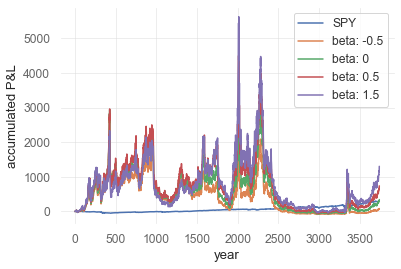

In [7]:
x = pnl_df.index
plt.plot(x,pnl_df['SPY'].cumsum(),label = 'SPY')
plt.plot(x,pnl_df['P&L Betas: -0.5'].cumsum(), label = 'beta: -0.5')
plt.plot(x,pnl_df['P&L Betas: 0'].cumsum(),label = 'beta: 0')
plt.plot(x,pnl_df['P&L Betas: 0.5'].cumsum(),label = 'beta: 0.5')
plt.plot(x,pnl_df['P&L Betas: 1.5'].cumsum(),label = 'beta: 1.5')
plt.xlabel('year')
plt.ylabel('accumulated P&L')
plt.legend()

C:\Users\Nhat Pham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nhat Pham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nhat Pham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

<AxesSubplot:xlabel='Beta: 1.5', ylabel='Density'>

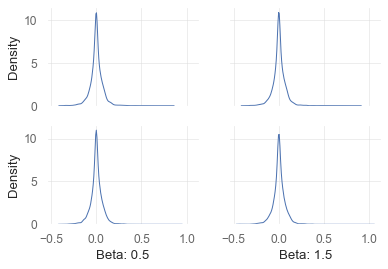

In [58]:
fig, axes = plt.subplots(2, 2,sharex= True, sharey = True)
sns.distplot(return_df['Beta: -0.5'],ax= axes[0][0], hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = 'beta: -0.5')  
sns.distplot(return_df['Beta: 0'],ax= axes[0][1], hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = 'beta: 0')  
sns.distplot(return_df['Beta: 0.5'],ax= axes[1][0], hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = 'beta: 0.5')
sns.distplot(return_df['Beta: 1.5'],ax= axes[1][1], hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = 'beta: 1.5')  